In [1]:
from xtquant import xtdata
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
from datetime import datetime
import time
import tushare as ts
import pandas as pd

***<font color=steel
    size=5
       face=雅黑>
<mark>沪深成交量</mark>
</font>***

In [3]:
for sector in xtdata.get_stock_list_in_sector('沪深指数'):
    detail = xtdata.get_instrument_detail(sector)
    name = detail['InstrumentName']
    if name in ['上证指数', '深证成指']:
        print(sector)
    if '沪深300' in name:
        print(sector, name)


***** xtdata连接成功 *****
服务信息: {'tag': 'sp3', 'version': '1.0'}
服务地址: 127.0.0.1:58610
数据路径: D:\国金QMT交易端模拟\bin.x64/../userdata_mini/datadir
设置xtdata.enable_hello = False可隐藏此消息

000300.SH 沪深300
000001.SH
399001.SZ
399300.SZ 沪深300


In [4]:
def get_index_data(xt_sector_index, st, et, cnt, ped):
    # 订阅合约数据
    xtdata.subscribe_quote(xt_sector_index, period=ped, start_time= st, end_time=et, count=cnt, callback=None)
    # 下载指定合约历史行情
    xtdata.download_history_data(xt_sector_index, ped, st, et)
    # 获取指定合约历史行情
    day_data = xtdata.get_market_data_ex(field_list=[], stock_list=[xt_sector_index], period=ped, 
                                         start_time=st,end_time=et,  count=cnt, dividend_type='none', fill_data=True)
    return day_data[xt_sector_index]

In [5]:
st = '20100101'
#et = '20241217'
et = datetime.now().strftime('%Y%m%d')
#et = '20241217'
print(st, et)
cnt = 100
ped = '1d'

sh_mkt_data = get_index_data('000001.SH', st, et, cnt, ped)
sz_mkt_data = get_index_data('399001.SZ', st, et, cnt, ped)

20100101 20250514


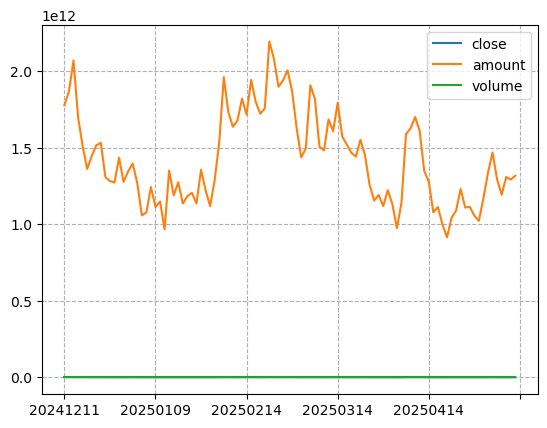

In [6]:
total_mkt_data = sz_mkt_data[['close', 'amount', 'volume']] + sh_mkt_data[['close', 'amount', 'volume']]
total_mkt_data.plot()
plt.grid(ls='--')

In [7]:
sz_mkt_data.tail(10)

,time,open,high,low,close,volume,amount,settelementPrice,openInterest,preClose,suspendFlag
20250428,1745769600000,9925.714,9926.904,9848.667,9855.196,556737815,6.144904e+11,0.0,15,9917.055,0
20250429,1745856000000,9828.458,9882.541,9799.646,9849.801,508317399,5.912391e+11,0.0,15,9855.196,0
20250430,1745942400000,9863.497,9925.870,9845.355,9899.821,559157909,6.637699e+11,0.0,15,9849.802,0
20250506,1746460800000,9974.526,10082.336,9960.523,10082.336,634060070,7.843662e+11,0.0,15,9899.822,0
20250507,1746547200000,10218.326,10248.985,10048.002,10104.129,709978551,8.731034e+11,0.0,15,10082.335,0
20250508,1746633600000,10081.272,10222.814,10067.303,10197.659,639008261,7.917910e+11,0.0,15,10104.128,0
20250509,1746720000000,10190.127,10190.127,10087.551,10126.825,600535347,7.271601e+11,0.0,15,10197.659,0
20250512,1746979200000,10220.330,10302.046,10200.206,10301.158,595059405,7.863403e+11,0.0,15,10126.825,0
20250513,1747065600000,10401.945,10401.945,10274.340,10288.083,613388689,7.849412e+11,0.0,15,10301.158,0
20250514,1747152000000,10278.907,10418.440,10240.133,10354.222,622584786,7.818732e+11,0.0,15,10288.083,0


In [8]:
total_mkt_data['year'] = total_mkt_data.index.to_series().apply(lambda x: x[:4])
total_mkt_data['month'] = total_mkt_data.index.to_series().apply(lambda x: x[4:6])
total_mkt_data[total_mkt_data.index >= '20230901'].groupby(['year', 'month'])['amount'].mean()
total_mkt_data[total_mkt_data.index >= '20240901']
sh_mkt_data[sh_mkt_data.index >= '20240901']
#sz_mkt_data[sz_mkt_data.index >= '20240901']

,time,open,high,low,close,volume,amount,settelementPrice,openInterest,preClose,suspendFlag
20241211,1733846400000,3416.087,3437.810,3416.087,3432.490,681544610,6.929296e+11,0.0,0,3422.660,0
20241212,1733932800000,3432.279,3464.117,3425.976,3461.500,700096689,7.341690e+11,0.0,0,3432.491,0
20241213,1734019200000,3442.926,3442.926,3390.754,3391.878,777464144,8.507149e+11,0.0,0,3461.500,0
20241216,1734278400000,3390.083,3401.926,3376.536,3386.331,625578996,6.752375e+11,0.0,0,3391.878,0
20241217,1734364800000,3381.814,3396.207,3357.769,3361.485,568941505,5.847893e+11,0.0,0,3386.331,0
...,...,...,...,...,...,...,...,...,...,...,...
20250508,1746633600000,3331.205,3359.731,3327.902,3351.995,428377766,5.016114e+11,0.0,0,3342.665,0
20250509,1746720000000,3350.405,3351.220,3335.127,3341.999,398909191,4.648624e+11,0.0,0,3351.996,0
20250512,1746979200000,3352.970,3372.473,3344.269,3369.245,418239910,5.220807e+11,0.0,0,3341.999,0
20250513,1747065600000,3386.235,3386.235,3370.252,3374.871,426240700,5.066089e+11,0.0,0,3369.245,0


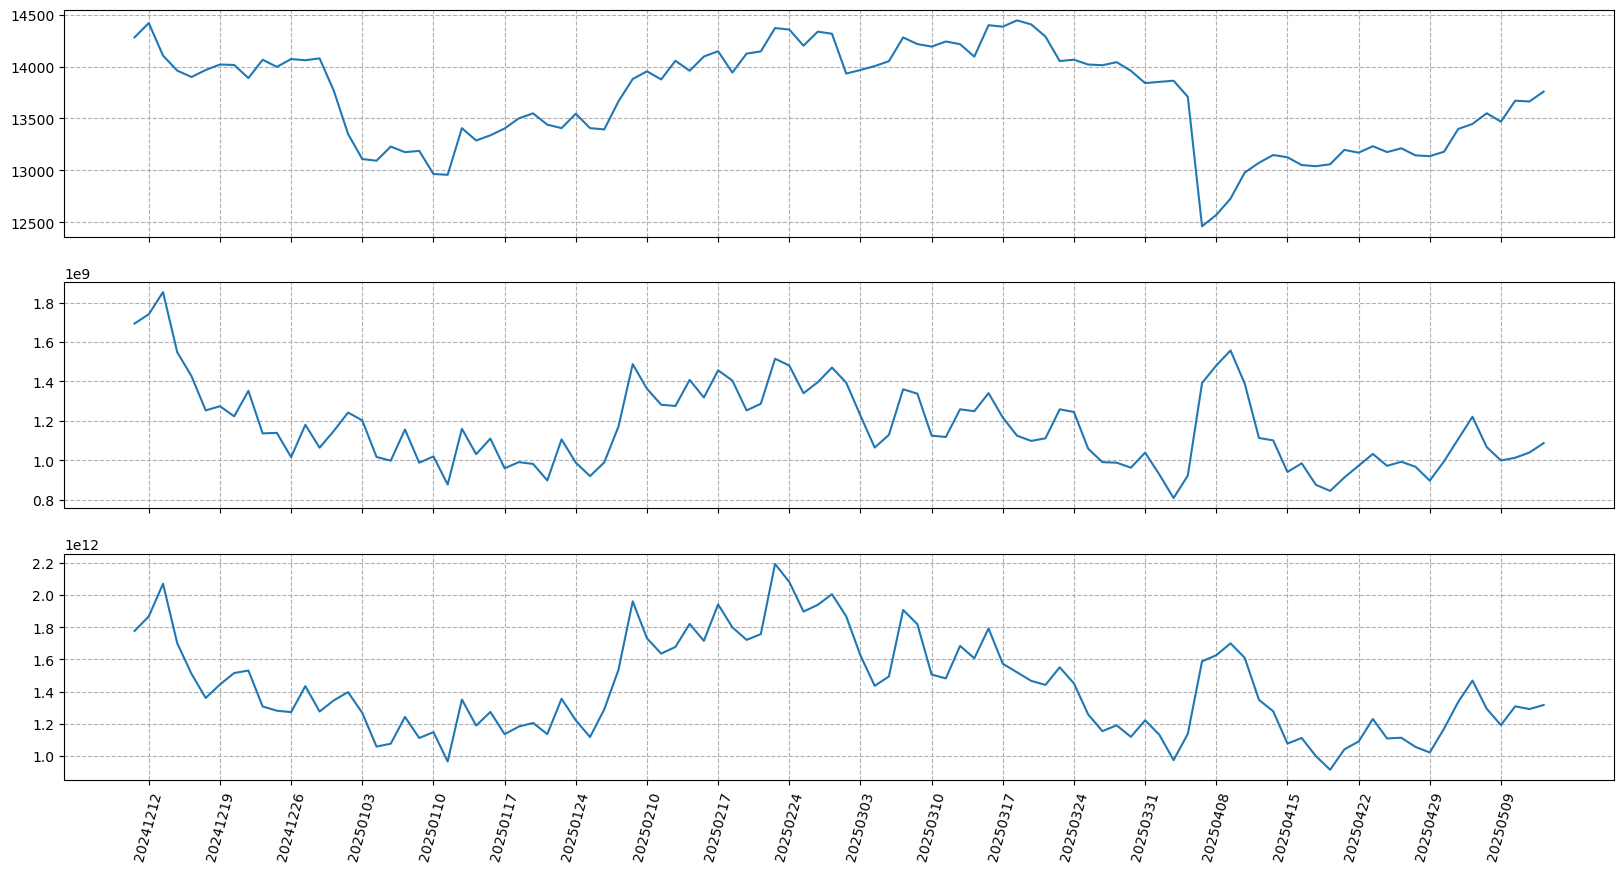

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt_data = total_mkt_data[total_mkt_data.index >= "20230901"]
t = np.arange(0.01, 5.0, 0.01)
t = plt_data.index
s1 = plt_data['close']
s2 = plt_data['volume']
s3 = plt_data['amount']
#s1 = np.sin(2 * np.pi * t)
#s2 = np.exp(-t)
#s3 = np.sin(4 * np.pi * t)
plt.figure(figsize=(20,10))
ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.grid(ls='--')
plt.tick_params('x', labelbottom=False)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
plt.grid(ls='--')
# make these tick labels invisible
plt.tick_params('x', labelbottom=False)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(t, s3)
plt.grid(ls='--')
# make these tick labels invisible
plt.tick_params('x', labelsize=10)

# share x and y
#ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
#plt.plot(t, s3)
#plt.xlim(0.01, 150.0)
plt.xticks(range(1, len(t), 5), rotation=75)
plt.show()

In [10]:
#total_mkt_data[(total_mkt_data.index >= "20240901") & (total_mkt_data.index <= "202400910") ]
#plt_data.tail(60)
#[5 for _ in range(10)]
#table = ''.maketrans('abcw', 'xyzc')
#print('Hellow world'.translate(table))
min_ret = float('inf')
for i in range(404):
    tmp = 2021-5*i
    if tmp % 7 == 0:
        ret = i + tmp/7
        if ret < min_ret:
            min_ret = ret
            print('result')
            print(i)
            print(tmp/7)
            print(min_ret)

result
1
288.0
289.0


***<font color=steel
    size=5
       face=雅黑>
<mark>国债</mark>
</font>***

In [12]:
bond_zh_us_rate_df = ak.bond_zh_us_rate(start_date="20000101")
print(bond_zh_us_rate_df)

              日期  中国国债收益率2年  中国国债收益率5年  中国国债收益率10年  中国国债收益率30年  中国国债收益率10年-2年  \
0     2000-01-03        NaN        NaN         NaN         NaN            NaN   
1     2000-01-04        NaN        NaN         NaN         NaN            NaN   
2     2000-01-05        NaN        NaN         NaN         NaN            NaN   
3     2000-01-06        NaN        NaN         NaN         NaN            NaN   
4     2000-01-07        NaN        NaN         NaN         NaN            NaN   
...          ...        ...        ...         ...         ...            ...   
6715  2025-05-01        NaN        NaN         NaN         NaN            NaN   
6716  2025-05-02        NaN        NaN         NaN         NaN            NaN   
6717  2025-05-05        NaN        NaN         NaN         NaN            NaN   
6718  2025-05-06     1.4540     1.5255      1.6298      1.8270         0.1758   
6719  2025-05-07     1.4415     1.5156      1.6418      1.8475         0.2003   

      中国GDP年增率  美国国债收益率2年  

In [13]:
bond_zh_us_rate_df.to_csv('bond_zh_us_rate_df_1990.csv')


In [14]:
bond_zh_us_rate_df.columns
bond_rate_overall_df = bond_zh_us_rate_df[['日期', '中国国债收益率10年','中国国债收益率30年','中国GDP年增率','美国国债收益率10年','美国国债收益率30年','美国GDP年增率']]
bond_rate_overall_df.columns = ['date', 'cn_bond_10', 'cn_bond_30', 'cn_gdp', 'us_bond_10', 'us_bond_30', 'us_gdp']
bond_rate_overall_df = bond_rate_overall_df.set_index(keys='date')

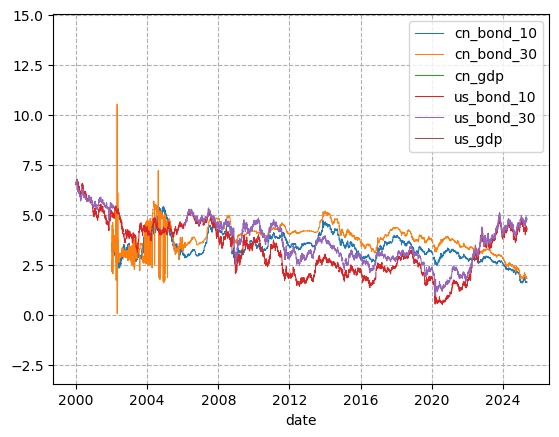

In [15]:
bond_rate_overall_df.plot(linewidth=0.75)
plt.grid(ls='--')
#y_ticks = np.arange(-5, 15, 1)
#plt.yticks(y_ticks)
plt.show()

In [16]:
bond_zh_us_rate_df.columns
bond_rate_cn_df = bond_zh_us_rate_df[['日期', '中国国债收益率10年','中国国债收益率30年']]
bond_rate_cn_df.columns = ['date', 'cn_bond_10', 'cn_bond_30']
bond_rate_cn_df = bond_rate_cn_df.set_index(keys='date')

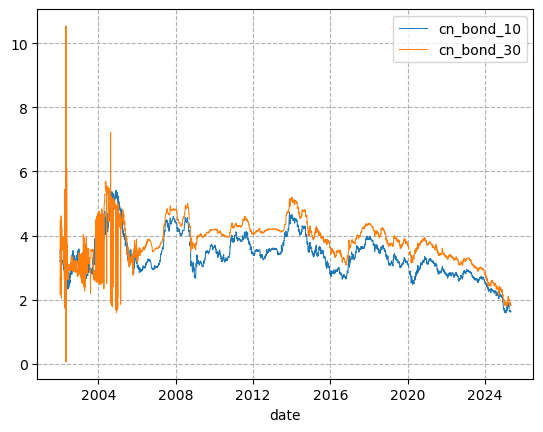

In [17]:
bond_rate_cn_df.plot(linewidth=0.75)
plt.grid(ls='--')
plt.show()

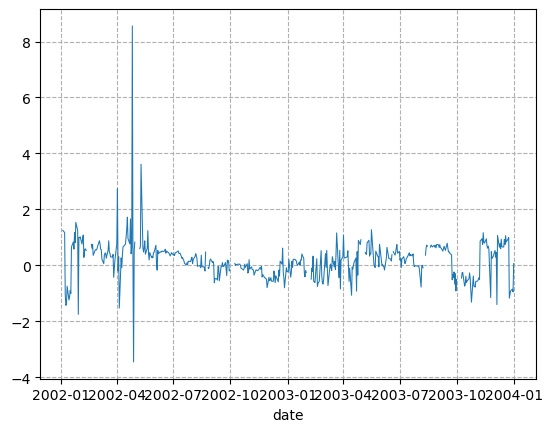

In [18]:
from datetime import datetime
bond_rate_cn_df['rate_gap'] = bond_rate_cn_df['cn_bond_30'] - bond_rate_cn_df['cn_bond_10']
bond_rate_cn_df[bond_rate_cn_df.index <= datetime.date(datetime.strptime("20040101", "%Y%m%d"))]['rate_gap'].plot(linewidth=0.75)
#plt.plot()
plt.grid(ls='--')
plt.show()

In [19]:
print(bond_rate_cn_df[(bond_rate_cn_df.index <= datetime.date(datetime.strptime("20020510", "%Y%m%d"))) 
      & (bond_rate_cn_df.index >= datetime.date(datetime.strptime("20020401", "%Y%m%d")))]['cn_bond_30'].dropna())

date
2002-04-01     3.5140
2002-04-02     5.4377
2002-04-03     2.7164
2002-04-04     3.0381
2002-04-05     1.7409
2002-04-08     2.9983
2002-04-09     2.7108
2002-04-10     3.0818
2002-04-11     3.3297
2002-04-12     3.3509
2002-04-15     3.3989
2002-04-16     3.5825
2002-04-17     3.8966
2002-04-18     4.2481
2002-04-19     3.5369
2002-04-22     3.3542
2002-04-23     4.2216
2002-04-24     3.0176
2002-04-25     3.1625
2002-04-26    10.5366
2002-04-27     2.7586
2002-04-28     0.0637
2002-04-29     3.0567
2002-04-30     3.3321
2002-05-08     3.1324
2002-05-09     3.1961
2002-05-10     6.1136
Name: cn_bond_30, dtype: float64


In [20]:
while True:
    hour = datetime.now().hour
    if (hour >= 9 and hour < 12) or (hour >= 13 and hour < 18):
        fx_quote_baidu_df = ak.fx_quote_baidu(symbol="美元")
        #print(fx_quote_baidu_df)
        #fx_quote_baidu_df[fx_quote_baidu_df.apply(lambda x: x["代码"] in ('USDCNY', 'USDCNH', 'USDJPY', 'USDEUR', 'USDGBP', 'USDAUD', 'USDRUB', 'USDKRW' ), axis=1)]
        fx_key_quote = fx_quote_baidu_df[fx_quote_baidu_df.apply(lambda x: x["代码"] in ('USDCNY', 'USDCNH', 'USDJPY' ), axis=1)]
        if fx_key_quote[fx_key_quote["代码"] == 'USDCNH']['最新价'].values[0] >= 7.30:
            alert_email('MarsFinance', 'Allen', 'USD/CNH FX rate', '离岸人民币兑美元汇率突破7.3')
        time.sleep(600)
    else:
        time.sleep(6000)
        


KeyboardInterrupt: 

***<font color=steel
    size=5
       face=雅黑>
<mark>外汇</mark>
</font>***

In [ ]:
#fx_quote_baidu_df = fx_quote_baidu_df.set_index("代码")
import akshare as ak

fx_spot_quote_df = ak.fx_spot_quote()
print(fx_spot_quote_df)

In [ ]:
print(fx_quote_baidu_df.sort_values('涨跌幅', ascending=False).head(50))

In [ ]:
currency_boc_safe_df = ak.currency_boc_safe()
print(currency_boc_safe_df[['日期', '美元', '欧元', '日元', '英镑']])

In [ ]:
currency_boc_safe_df

In [ ]:
fx_cny_df = currency_boc_safe_df[['日期', '美元', '欧元', '日元', '英镑', '韩元', '卢布']]
fx_cny_df.columns = ['date', 'USD', 'EUR', 'JPY', 'GBP', 'KRW', 'RUB']
fx_cny_df = fx_cny_df.set_index(keys='date')
fx_cny_df[fx_cny_df.index >= datetime.date(datetime.strptime("20240101", "%Y%m%d"))][['USD', 'EUR']].plot()
plt.grid(ls='--')
plt.show()

In [ ]:
fx_cny_df[fx_cny_df.index >= datetime.date(datetime.strptime("20100101", "%Y%m%d"))]['RUB'].plot()
plt.grid()
plt.show()

***<font color=steel
    size=5
       face=雅黑>
<mark>中美实际利差</mark>
</font>***

In [ ]:
#美联储利率
usa_interest_rate = ak.macro_bank_usa_interest_rate()
usa_interest_rate.columns = ['commodity', 'date', 'us_int_current', 'us_int_predict', 'us_int_previous']
usa_interest_rate['month'] = usa_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
usa_int_conc = usa_interest_rate[['month', 'us_int_current']]
#print(usa_int_conc)
#美国CPI
usa_cpi = ak.macro_usa_cpi_yoy()
usa_cpi.columns = ['date', 'public_date', 'us_cpi_current', 'us_cpi_previous']
usa_cpi['month'] = usa_cpi['date'].apply(lambda x: x.strftime('%Y%m'))
usa_cpi_conc = usa_cpi[['month', 'us_cpi_current']]
#print(usa_cpi_conc)
#中国LPR
ts.set_token('d346f88cfb20095f252d7e1178197129c6cc300f67bf7e37a942d834')
pro = ts.pro_api()
china_interest_rate = pro.shibor_lpr(start_date='20000101', end_date='20240731', fields='date,1y')

china_interest_rate.columns = ['date', 'cn_int_current']
china_interest_rate['month'] = china_interest_rate['date'].apply(lambda x: x[:6])
china_int_conc = china_interest_rate[['month', 'cn_int_current']]
china_int_conc = china_int_conc.groupby(['month'])['cn_int_current'].mean().reset_index()
print(china_int_conc)
#中国CPI
china_cpi = ak.macro_china_cpi_yearly()
china_cpi.columns = ['commodity', 'date', 'cn_cpi_current', 'cn_cpi_predict', 'cn_cpi_previous']
china_cpi['month'] = china_cpi['date'].apply(lambda x: x.strftime('%Y%m'))
china_cpi_conc = china_cpi[['month', 'cn_cpi_current']]
#print(china_cpi)

#日本央行利率
jpn_interest_rate = ak.macro_bank_japan_interest_rate()
jpn_interest_rate.columns = ['commodity', 'date', 'jpn_int_current', 'jpn_int_predict', 'jpn_int_previous']
jpn_interest_rate['month'] = jpn_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
jpn_int_conc = jpn_interest_rate[['month', 'jpn_int_current']]
#print(jpn_int_conc)
#欧洲央行利率
eur_interest_rate = ak.macro_bank_euro_interest_rate()
eur_interest_rate.columns = ['commodity', 'date', 'eur_int_current', 'eur_int_predict', 'eur_int_previous']
eur_interest_rate['month'] = eur_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
eur_int_conc = eur_interest_rate[['month', 'eur_int_current']]
#print(eur_int_conc)

In [ ]:
month_df = pd.DataFrame(pd.date_range('19820101', datetime.now().strftime('%Y%m%d'), periods=None, freq='MS'))
month_df.columns = ['month']
month_df['month'] = month_df['month'].apply(lambda x: x.strftime('%Y%m'))
init_conc = pd.merge(month_df, usa_int_conc, how='left', on='month')
conc_1 = pd.merge(init_conc, usa_cpi_conc, how='left', on='month')
conc_2 = pd.merge(conc_1, china_int_conc, how='left', on='month')
conc_3 = pd.merge(conc_2, jpn_int_conc, how='left', on='month')
conc_4 = pd.merge(conc_3, eur_int_conc, how='left', on='month')
final_conc = pd.merge(conc_4, china_cpi_conc, how='left', on='month')
final_conc = final_conc.fillna(method='ffill')          
final_conc['us_real_int'] = final_conc['us_int_current'] - final_conc['us_cpi_current']
final_conc['cn_real_int'] = final_conc['cn_int_current'] - final_conc['cn_cpi_current']
final_conc['real_int_gap'] = final_conc['us_real_int'] - final_conc['cn_real_int']
final_conc['nomi_int_gap_usa_chn'] = final_conc['us_int_current'] - final_conc['cn_int_current']
final_conc['nomi_int_gap_usa_jpn'] = final_conc['us_int_current'] - final_conc['jpn_int_current']
final_conc['nomi_int_gap_usa_eur'] = final_conc['us_int_current'] - final_conc['eur_int_current']

final_conc['cpi_gap_usa_chn'] = final_conc['us_cpi_current'] - final_conc['cn_cpi_current']
final_conc = final_conc.set_index(keys='month')

In [ ]:
#final_conc[final_conc.index >= '201901'][['us_cpi_current', 'cn_cpi_current', 'cpi_gap_usa_chn']].plot()
final_conc[final_conc.index >= '202101'][['us_real_int', 'cn_real_int', 'real_int_gap', 'nomi_int_gap_usa_chn']].plot()
#final_conc[final_conc.index >= '201901'][['us_int_current', 'cn_int_current', 'jpn_int_current', 'eur_int_current']].plot()
plt.grid(ls='--')

In [ ]:
#final_conc.tail(100)
#eur_interest_rate[(eur_interest_rate['month'] >= '201401') & (eur_interest_rate['month'] <= '201901')]
#china_int_conc[china_int_conc['month'] >= '201901'].tail(30)
#china_int_conc
china_int_conc.drop_duplicates()

***<font color=steel
    size=5
       face=雅黑>
<mark>中国房价指数</mark>
</font>***

In [ ]:
house_price_df = ak.macro_china_new_house_price()
print(house_price_df.columns)
house_price_df.columns = ['date', 'city', 
                                          'new_house_price_year_based', 'new_house_price_month_based', 'new_house_price_fixed_based',
                                          'second_house_price_year_based', 'second_house_price_month_based', 'second_house_price_fixed_based']
house_price_df = house_price_df.set_index(keys='date')

house_price_df[(house_price_df['city'] == '上海') &
(house_price_df.index >= datetime.date(datetime.strptime("20210101", "%Y%m%d")))][['new_house_price_year_based', 
'new_house_price_month_based',
'second_house_price_year_based',
'second_house_price_month_based']].plot()
plt.grid(ls='--')

In [ ]:
house_price_df[(house_price_df['city'] == '上海') &
(house_price_df.index >= datetime.date(datetime.strptime("20240101", "%Y%m%d")))][['new_house_price_year_based', 
'new_house_price_month_based',
'second_house_price_year_based',
'second_house_price_month_based']]#.sort_values(house_price_df.index, ascending=False).head(50)

In [ ]:
# 订阅合约数据
st = '20240201'
et = '20240331'
cnt = 30
ped = '1d'
xtdata.subscribe_quote(code, period=ped, start_time='', end_time=et, count=cnt, callback=None)
# 下载指定合约历史行情
xtdata.download_history_data(code, ped, st, et)
# 获取指定合约历史行情
day_data = xtdata.get_market_data_ex(field_list=[], stock_list=[code], period=ped, 
                                     start_time=st, end_time=et, count=cnt, 
                                     dividend_type='none', fill_data=True)
inst_detail = xtdata.get_instrument_detail(code)

In [ ]:
print(day_data[code].iloc[-30:]['close'].values.mean())

In [ ]:
print(day_data[code].iloc[-5:]['close'].values.mean())

In [ ]:
res1 = xtdata.get_stock_list_in_sector('上证指数')
res2 = xtdata.get_stock_list_in_sector('深证成指')
res3 = xtdata.get_stock_list_in_sector('创业板')
res=res1+res2+res3
res = xtdata.get_stock_list_in_sector()
print(len(res))


In [ ]:
import random
from xtquant.xttrader import XtQuantTrader

# miniQMT安装路径
mini_qmt_path = r'D:\国金QMT交易端模拟\userdata_mini'
# 创建session_id
session_id = int(random.randint(100000, 999999))
# 创建交易对象
xt_trader = XtQuantTrader(mini_qmt_path, session_id)
# 启动交易对象
xt_trader.start()
# 连接客户端
connect_result = xt_trader.connect()
print(connect_result)
if connect_result == 0:
    print('连接成功')


In [ ]:
from xtquant.xttype import StockAccount
# QMT账号
account_id = '55004948'
# 创建账号对象
account = StockAccount(account_id)
# 订阅账号
res = xt_trader.subscribe(account)
print(res)
'''
结果
0
'''

In [ ]:
asset = xt_trader.query_stock_asset(account)
print('账号类型：', asset.account_type)
print('资金账号：', asset.account_id)
print('可用金额：', asset.cash)
print('冻结金额：', asset.frozen_cash)
print('持仓市值：', asset.market_value)
print('总资产：', asset.total_asset)

In [ ]:
# coding=utf-8
from xtquant import xtdata
def get_hist_trd_data(code, st, et, cnt, ped):
    xtdata.subscribe_quote(code, period=ped, start_time= st, end_time=et, count=cnt, callback=None)
    # 下载指定合约历史行情
    xtdata.download_history_data(code, ped, st, et)
    # 获取指定合约历史行情
    day_data = xtdata.get_market_data_ex(field_list=[], 
                                         stock_list=[code], 
                                         period=ped, 
                                         start_time=st,
                                         end_time=et,  
                                         count=cnt, 
                                         dividend_type='none', 
                                         fill_data=True)
    return day_data
    
    


In [ ]:
#get index data
# 获取迅投板块指数合约信息
index_list=['000001.SH', '399006.SZ', '399001.SZ']
# 订阅合约数据
st = '20231003'
et = '20240328'
cnt = 100
ped = '1d'
index_ret = {}
for ind in index_list:
    index_info = xtdata.get_instrument_detail(ind)
    print(ind)
    temp = get_hist_trd_data(ind, st, et, cnt, ped)
    index_ret[ind] = temp[ind]

In [ ]:
#get stock data
# 获取迅投板块指数合约信息
stock_list=res
# 订阅合约数据
st = '20231004'
et = '20240329'
cnt = 100
ped = '1d'
stock_ret = {}
for ind in stock_list:
    stock_info = xtdata.get_instrument_detail(ind)
    print(ind)
    temp = get_hist_trd_data(ind, st, et, cnt, ped)
    stock_ret[ind] = temp[ind]

In [ ]:
stock_ret

In [ ]:
def get_return_rate(input_data):
    input_data['rrate'] = input_data['close']/input_data['preClose']
    return input_data

In [ ]:
data0 = get_return_rate(index_ret['000001.SH'])
data1 = get_return_rate(index_ret['399006.SZ'])
data2 = get_return_rate(index_ret['399001.SZ'])


In [ ]:
temp0=data0[['open', 'high', 'low', 'volume','close','preClose', 'rrate']]
temp0.columns = ['open', 'high', 'low', 'volume', 'close','preClose','sh_rrate']
temp0

In [ ]:
temp1=data1[['open', 'high', 'low', 'volume','close','preClose',  'rrate']]
temp1.columns = ['open', 'high', 'low', 'volume','close','preClose',  'cy_rrate']
temp1

In [ ]:
temp2=data2[['open', 'high', 'low', 'volume', 'close','preClose', 'rrate']]
temp2.columns = ['open', 'high', 'low', 'volume', 'close','preClose', 'sz_rrate']
temp2

In [ ]:
temp=temp0.join(temp1['cy_rrate']).join(temp2['sz_rrate']).join(temp3['stock_rrate'])
temp

In [ ]:
stat_ret = {}
for ind in stock_ret.keys():
    data3 = get_return_rate(stock_ret[ind])
    temp3=data3[['open', 'high', 'low', 'volume','close','preClose',  'rrate']]
    temp3.columns = ['open', 'high', 'low', 'volume','close','preClose',  'stock_rrate']
    temp3.index = temp0.index
    temp=temp0.join(temp1['cy_rrate']).join(temp2['sz_rrate']).join(temp3['stock_rrate'])
    temp['senario']=temp['sh_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['cy_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['sz_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    temp['outcome']=temp['stock_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    stat_temp = temp.groupby(['senario', 'outcome']).sum('stock_rrate').reset_index() 
    stat_temp = stat_temp[['senario', 'outcome', 'stock_rrate']]
    stat_temp1 = temp.groupby(['senario', 'outcome']).count().reset_index() 
    stat_temp['cnt']=stat_temp1['open']
    stat_temp['rate']=stat_temp['stock_rrate']/stat_temp['cnt']-1
    stat_temp['rate_avg']=abs(stat_temp['rate']/stat_temp['cnt'])
    print(stat_temp)
    stat_ret[ind]=stat_temp
    

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.807446   22 -0.008752  0.000398
1      DDD       U    21.351955   21  0.016760  0.000798
2      DUD       D     1.992120    2 -0.003940  0.001970
3      DUU       D     1.985505    2 -0.007248  0.003624
4      DUU       U     1.005241    1  0.005241  0.005241
5      UDD       D     5.951272    6 -0.008121  0.001354
6      UDD       U     1.002379    1  0.002379  0.002379
7      UDU       D     0.999233    1 -0.000767  0.000767
8      UDU       U     1.004883    1  0.004883  0.004883
9      UUD       D     0.997829    1 -0.002171  0.002171
10     UUD       U     1.013416    1  0.013416  0.013416
11     UUU       D    17.760819   18 -0.013288  0.000738
12     UUU       U    23.502022   23  0.021827  0.000949
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.315984   24 -0.028501  0.001188
1      DDD       U    19.433743   19  0.022829  0.001202
2      DUD       D     1.983965

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.569294   22 -0.019578  0.000890
1      DDD       U    21.293108   21  0.013958  0.000665
2      DUD       D     1.982381    2 -0.008809  0.004405
3      DUU       D     1.943628    2 -0.028186  0.014093
4      DUU       U     1.010929    1  0.010929  0.010929
5      UDD       D     5.928960    6 -0.011840  0.001973
6      UDD       U     1.013514    1  0.013514  0.013514
7      UDU       D     0.994681    1 -0.005319  0.005319
8      UDU       U     1.026846    1  0.026846  0.026846
9      UUD       D     0.989189    1 -0.010811  0.010811
10     UUD       U     1.016484    1  0.016484  0.016484
11     UUU       D    23.692053   24 -0.012831  0.000535
12     UUU       U    17.376279   17  0.022134  0.001302
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.673483   27 -0.012093  0.000448
1      DDD       U    16.129549   16  0.008097  0.000506
2      DUD       D     0.995624

9     UUU       U    20.323846   20  0.016192  0.000810
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.814392   24 -0.007734  0.000322
1      DDD       U    19.150974   19  0.007946  0.000418
2      DUD       U     2.045730    2  0.022865  0.011432
3      DUU       D     0.994382    1 -0.005618  0.005618
4      DUU       U     2.018000    2  0.009000  0.004500
5      UDD       D     2.981215    3 -0.006262  0.002087
6      UDD       U     4.016354    4  0.004088  0.001022
7      UDU       D     0.990411    1 -0.009589  0.009589
8      UDU       U     1.011940    1  0.011940  0.011940
9      UUD       D     0.986804    1 -0.013196  0.013196
10     UUD       U     1.005900    1  0.005900  0.005900
11     UUU       D    22.831213   23 -0.007339  0.000319
12     UUU       U    18.208573   18  0.011587  0.000644
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.959168   23 -0.045254  0.001968
1      DDD       U    21.110604 

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.446701   25 -0.022132  0.000885
1      DDD       U    18.337062   18  0.018726  0.001040
2      DUD       D     1.893661    2 -0.053169  0.026585
3      DUU       D     2.951777    3 -0.016074  0.005358
4      UDD       D     4.926932    5 -0.014614  0.002923
5      UDD       U     2.006623    2  0.003312  0.001656
6      UDU       D     0.994253    1 -0.005747  0.005747
7      UDU       U     1.038095    1  0.038095  0.038095
8      UUD       U     2.011443    2  0.005722  0.002861
9      UUU       D    19.616281   20 -0.019186  0.000959
10     UUU       U    21.631984   21  0.030094  0.001433
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.550593   21 -0.021400  0.001019
1      DDD       U    22.264952   22  0.012043  0.000547
2      DUD       D     0.988193    1 -0.011807  0.011807
3      DUD       U     1.067669    1  0.067669  0.067669
4      DUU       D     1.953608

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.698428   28 -0.010770  0.000385
1      DDD       U    15.185640   15  0.012376  0.000825
2      DUD       D     0.995833    1 -0.004167  0.004167
3      DUD       U     1.045918    1  0.045918  0.045918
4      DUU       D     2.957855    3 -0.014048  0.004683
5      UDD       D     6.929840    7 -0.010023  0.001432
6      UDU       D     1.000000    1  0.000000  0.000000
7      UDU       U     1.009009    1  0.009009  0.009009
8      UUD       D     0.991453    1 -0.008547  0.008547
9      UUD       U     1.004292    1  0.004292  0.004292
10     UUU       D    23.752097   24 -0.010329  0.000430
11     UUU       U    17.304556   17  0.017915  0.001054
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.751137   23 -0.010820  0.000470
1      DDD       U    20.236991   20  0.011850  0.000592
2      DUD       D     0.995935    1 -0.004065  0.004065
3      DUD       U     1.075000

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.368221   26 -0.024299  0.000935
1      DDD       U    17.338107   17  0.019889  0.001170
2      DUD       D     1.878392    2 -0.060804  0.030402
3      DUU       D     2.927117    3 -0.024294  0.008098
4      UDD       D     2.883873    3 -0.038709  0.012903
5      UDD       U     4.036727    4  0.009182  0.002295
6      UDU       D     0.995671    1 -0.004329  0.004329
7      UDU       U     1.023585    1  0.023585  0.023585
8      UUD       D     0.988095    1 -0.011905  0.011905
9      UUD       U     1.003012    1  0.003012  0.003012
10     UUU       D    12.703469   13 -0.022810  0.001755
11     UUU       U    28.735936   28  0.026283  0.000939
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.437204   24 -0.023450  0.000977
1      DDD       U    19.254333   19  0.013386  0.000705
2      DUD       D     0.990138    1 -0.009862  0.009862
3      DUD       U     1.100299

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.476129   23 -0.022777  0.000990
1      DDD       U    20.242622   20  0.012131  0.000607
2      DUD       D     1.946830    2 -0.026585  0.013293
3      DUU       D     2.918991    3 -0.027003  0.009001
4      UDD       D     2.974414    3 -0.008529  0.002843
5      UDD       U     4.050655    4  0.012664  0.003166
6      UDU       D     0.996639    1 -0.003361  0.003361
7      UDU       U     1.025641    1  0.025641  0.025641
8      UUD       U     2.028002    2  0.014001  0.007001
9      UUU       D    15.699690   16 -0.018769  0.001173
10     UUU       U    25.533835   25  0.021353  0.000854
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.858533   21 -0.006737  0.000321
1      DDD       U    22.168345   22  0.007652  0.000348
2      DUD       D     0.994718    1 -0.005282  0.005282
3      DUD       U     1.003571    1  0.003571  0.003571
4      DUU       D     1.989576

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.581848   24 -0.017423  0.000726
1      DDD       U    19.246957   19  0.012998  0.000684
2      DUD       D     0.991561    1 -0.008439  0.008439
3      DUD       U     1.099874    1  0.099874  0.099874
4      DUU       D     0.948640    1 -0.051360  0.051360
5      DUU       U     2.009729    2  0.004865  0.002432
6      UDD       D     5.919233    6 -0.013461  0.002244
7      UDD       U     1.001986    1  0.001986  0.001986
8      UDU       D     0.998607    1 -0.001393  0.001393
9      UDU       U     1.001957    1  0.001957  0.001957
10     UUD       D     0.991488    1 -0.008512  0.008512
11     UUD       U     1.010657    1  0.010657  0.010657
12     UUU       D    22.704237   23 -0.012859  0.000559
13     UUU       U    18.322457   18  0.017914  0.000995
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.600847   24 -0.016631  0.000693
1      DDD       U    19.181618

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.540690   26 -0.017666  0.000679
1      DDD       U    17.172090   17  0.010123  0.000595
2      DUD       D     0.997006    1 -0.002994  0.002994
3      DUD       U     1.043121    1  0.043121  0.043121
4      DUU       D     1.941547    2 -0.029227  0.014613
5      DUU       U     1.003433    1  0.003433  0.003433
6      UDD       D     4.944583    5 -0.011083  0.002217
7      UDD       U     2.007675    2  0.003838  0.001919
8      UDU       U     2.013386    2  0.006693  0.003347
9      UUD       U     2.019069    2  0.009534  0.004767
10     UUU       D    15.840772   16 -0.009952  0.000622
11     UUU       U    25.393566   25  0.015743  0.000630
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.600611   23 -0.017365  0.000755
1      DDD       U    20.305156   20  0.015258  0.000763
2      DUD       U     2.014249    2  0.007124  0.003562
3      DUU       D     1.904593

10     UUU       U    19.319046   19  0.016792  0.000884
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.426289   23 -0.024944  0.001085
1      DDD       U    20.502887   20  0.025144  0.001257
2      DUD       D     0.995519    1 -0.004481  0.004481
3      DUD       U     1.054507    1  0.054507  0.054507
4      DUU       D     2.897202    3 -0.034266  0.011422
5      UDD       D     5.898803    6 -0.016866  0.002811
6      UDD       U     1.000855    1  0.000855  0.000855
7      UDU       U     2.039639    2  0.019819  0.009910
8      UUD       U     2.008785    2  0.004392  0.002196
9      UUU       D    20.757622   21 -0.011542  0.000550
10     UUU       U    20.507975   20  0.025399  0.001270
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.243117   24 -0.031537  0.001314
1      DDD       U    19.535917   19  0.028206  0.001485
2      DUD       D     1.903067    2 -0.048466  0.024233
3      DUU       D     1.935394

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.717281   28 -0.010097  0.000361
1      DDD       U    15.178805   15  0.011920  0.000795
2      DUD       U     2.060373    2  0.030187  0.015093
3      DUU       D     2.971227    3 -0.009591  0.003197
4      UDD       D     3.994339    4 -0.001415  0.000354
5      UDD       U     3.018245    3  0.006082  0.002027
6      UDU       D     0.995137    1 -0.004863  0.004863
7      UDU       U     1.002277    1  0.002277  0.002277
8      UUD       D     1.992411    2 -0.003795  0.001897
9      UUU       D    24.834123   25 -0.006635  0.000265
10     UUU       U    16.168531   16  0.010533  0.000658
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.530993   26 -0.018039  0.000694
1      DDD       U    17.300071   17  0.017651  0.001038
2      DUD       D     0.991617    1 -0.008383  0.008383
3      DUD       U     1.055988    1  0.055988  0.055988
4      DUU       D     0.975921

12     UUU       U    23.502415   23  0.021844  0.000950
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.547629   23 -0.019668  0.000855
1      DDD       U    20.505344   20  0.025267  0.001263
2      DUD       D     0.994132    1 -0.005868  0.005868
3      DUD       U     1.100116    1  0.100116  0.100116
4      DUU       D     0.936234    1 -0.063766  0.063766
5      DUU       U     2.063539    2  0.031770  0.015885
6      UDD       D     4.949564    5 -0.010087  0.002017
7      UDD       U     2.038769    2  0.019385  0.009692
8      UDU       D     0.989598    1 -0.010402  0.010402
9      UDU       U     1.018370    1  0.018370  0.018370
10     UUD       U     2.024368    2  0.012184  0.006092
11     UUU       D    23.443129   24 -0.023203  0.000967
12     UUU       U    17.557446   17  0.032791  0.001929
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.752767   25 -0.009889  0.000396
1      DDD       U    18.151805

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.430601   27 -0.021089  0.000781
1      DDD       U    16.325111   16  0.020319  0.001270
2      DUD       U     2.087943    2  0.043971  0.021986
3      DUU       D     0.930187    1 -0.069813  0.069813
4      DUU       U     2.055930    2  0.027965  0.013983
5      UDD       D     5.907975    6 -0.015338  0.002556
6      UDD       U     1.010963    1  0.010963  0.010963
7      UDU       D     0.982103    1 -0.017897  0.017897
8      UDU       U     1.009850    1  0.009850  0.009850
9      UUD       D     1.979371    2 -0.010315  0.005157
10     UUU       D    19.657098   20 -0.017145  0.000857
11     UUU       U    21.481179   21  0.022913  0.001091
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.491334   23 -0.022116  0.000962
1      DDD       U    20.369535   20  0.018477  0.000924
2      DUD       D     0.995873    1 -0.004127  0.004127
3      DUD       U     1.058947

11     UUU       U    18.620019   18  0.034446  0.001914
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.436615   22 -0.025608  0.001164
1      DDD       U    21.273315   21  0.013015  0.000620
2      DUD       D     0.994903    1 -0.005097  0.005097
3      DUD       U     1.100299    1  0.100299  0.100299
4      DUU       D     2.955387    3 -0.014871  0.004957
5      UDD       D     1.953196    2 -0.023402  0.011701
6      UDD       U     5.036093    5  0.007219  0.001444
7      UDU       U     2.029732    2  0.014866  0.007433
8      UUD       D     1.994897    2 -0.002552  0.001276
9      UUU       D    19.678256   20 -0.016087  0.000804
10     UUU       U    21.473101   21  0.022529  0.001073
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.637436   23 -0.015764  0.000685
1      DDD       U    20.225502   20  0.011275  0.000564
2      DUD       D     0.985173    1 -0.014827  0.014827
3      DUD       U     1.083095

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.389013   28 -0.021821  0.000779
1      DDD       U    15.376564   15  0.025104  0.001674
2      DUD       D     0.998902    1 -0.001098  0.001098
3      DUD       U     1.068182    1  0.068182  0.068182
4      DUU       D     2.920052    3 -0.026649  0.008883
5      UDD       D     5.808650    6 -0.031892  0.005315
6      UDD       U     1.021138    1  0.021138  0.021138
7      UDU       D     0.988741    1 -0.011259  0.011259
8      UDU       U     1.015126    1  0.015126  0.015126
9      UUD       U     2.021947    2  0.010973  0.005487
10     UUU       D    17.620377   18 -0.021090  0.001172
11     UUU       U    23.399415   23  0.017366  0.000755
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.490054   25 -0.020398  0.000816
1      DDD       U    18.300601   18  0.016700  0.000928
2      DUD       D     0.993266    1 -0.006734  0.006734
3      DUD       U     1.030435

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.656161   23 -0.014950  0.000650
1      DDD       U    20.175666   20  0.008783  0.000439
2      DUD       D     0.990196    1 -0.009804  0.009804
3      DUD       U     1.050251    1  0.050251  0.050251
4      DUU       D     2.940183    3 -0.019939  0.006646
5      UDD       D     4.966241    5 -0.006752  0.001350
6      UDD       U     2.011794    2  0.005897  0.002948
7      UDU       U     2.004340    2  0.002170  0.001085
8      UUD       U     2.011506    2  0.005753  0.002877
9      UUU       D    20.808567   21 -0.009116  0.000434
10     UUU       U    20.258325   20  0.012916  0.000646
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.250072   23 -0.032606  0.001418
1     DDD       U    20.624162   20  0.031208  0.001560
2     DUD       D     1.890741    2 -0.054630  0.027315
3     DUU       D     2.927285    3 -0.024238  0.008079
4     UDD       D     3.926783    4 

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.341320   24 -0.027445  0.001144
1      DDD       U    19.523231   19  0.027538  0.001449
2      DUD       D     1.933237    2 -0.033381  0.016691
3      DUU       D     1.902062    2 -0.048969  0.024484
4      DUU       U     1.008751    1  0.008751  0.008751
5      UDD       D     3.907731    4 -0.023067  0.005767
6      UDD       U     3.032375    3  0.010792  0.003597
7      UDU       D     0.999288    1 -0.000712  0.000712
8      UDU       U     1.100187    1  0.100187  0.100187
9      UUD       U     2.106727    2  0.053363  0.026682
10     UUU       D    21.548836   22 -0.020507  0.000932
11     UUU       U    19.597200   19  0.031432  0.001654
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.585293   23 -0.018031  0.000784
1     DDD       U    20.403329   20  0.020166  0.001008
2     DUD       U     2.008439    2  0.004220  0.002110
3     DUU       U     3.124835    3

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.634681   26 -0.014051  0.000540
1      DDD       U    17.240980   17  0.014175  0.000834
2      DUD       D     0.995816    1 -0.004184  0.004184
3      DUD       U     1.010582    1  0.010582  0.010582
4      DUU       D     2.940519    3 -0.019827  0.006609
5      UDD       D     5.957519    6 -0.007080  0.001180
6      UDD       U     1.005025    1  0.005025  0.005025
7      UDU       U     2.029419    2  0.014710  0.007355
8      UUD       D     0.984127    1 -0.015873  0.015873
9      UUD       U     1.003984    1  0.003984  0.003984
10     UUU       D    18.759509   19 -0.012657  0.000666
11     UUU       U    22.345626   22  0.015710  0.000714
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.451497   22 -0.024932  0.001133
1      DDD       U    21.475554   21  0.022645  0.001078
2      DUD       U     2.065894    2  0.032947  0.016474
3      DUU       D     1.940005

11     UUU       U    19.266300   19  0.014016  0.000738
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.519980   28 -0.017144  0.000612
1      DDD       U    15.177889   15  0.011859  0.000791
2      DUD       D     0.990329    1 -0.009671  0.009671
3      DUD       U     1.015060    1  0.015060  0.015060
4      DUU       D     2.929696    3 -0.023435  0.007812
5      UDD       D     3.973947    4 -0.006513  0.001628
6      UDD       U     3.021405    3  0.007135  0.002378
7      UDU       D     0.992218    1 -0.007782  0.007782
8      UDU       U     1.005263    1  0.005263  0.005263
9      UUD       D     0.986940    1 -0.013060  0.013060
10     UUD       U     1.009416    1  0.009416  0.009416
11     UUU       D    18.736532   19 -0.013867  0.000730
12     UUU       U    22.393671   22  0.017894  0.000813
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.723191   27 -0.010252  0.000380
1      DDD       U    16.223312

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.522087   28 -0.017068  0.000610
1      DDD       U    15.200114   15  0.013341  0.000889
2      DUD       D     0.981884    1 -0.018116  0.018116
3      DUD       U     1.015625    1  0.015625  0.015625
4      DUU       D     2.950325    3 -0.016558  0.005519
5      UDD       D     2.942327    3 -0.019224  0.006408
6      UDD       U     4.023812    4  0.005953  0.001488
7      UDU       D     0.989170    1 -0.010830  0.010830
8      UDU       U     1.014354    1  0.014354  0.014354
9      UUD       D     0.992565    1 -0.007435  0.007435
10     UUD       U     1.022814    1  0.022814  0.022814
11     UUU       D    17.690643   18 -0.017186  0.000955
12     UUU       U    23.504258   23  0.021924  0.000953
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.451642   22 -0.024925  0.001133
1      DDD       U    21.395301   21  0.018824  0.000896
2      DUD       D     0.963211

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.664384   26 -0.012908  0.000496
1      DDD       U    17.150006   17  0.008824  0.000519
2      DUD       D     0.994872    1 -0.005128  0.005128
3      DUD       U     1.085784    1  0.085784  0.085784
4      DUU       D     2.956879    3 -0.014374  0.004791
5      UDD       D     5.946008    6 -0.008999  0.001500
6      UDD       U     1.002079    1  0.002079  0.002079
7      UDU       U     2.018236    2  0.009118  0.004559
8      UUD       D     1.994804    2 -0.002598  0.001299
9      UUU       D    29.755586   30 -0.008147  0.000272
10     UUU       U    11.256396   11  0.023309  0.002119
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.649306   27 -0.012989  0.000481
1      DDD       U    16.141839   16  0.008865  0.000554
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.095477    1  0.095477  0.095477
4      DUU       D     1.952744

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.710500   20 -0.014475  0.000724
1      DDD       U    23.296218   23  0.012879  0.000560
2      DUD       D     0.980629    1 -0.019371  0.019371
3      DUD       U     1.099783    1  0.099783  0.099783
4      DUU       D     2.944080    3 -0.018640  0.006213
5      UDD       D     4.966930    5 -0.006614  0.001323
6      UDD       U     2.013094    2  0.006547  0.003273
7      UDU       D     0.995422    1 -0.004578  0.004578
8      UDU       U     1.001523    1  0.001523  0.001523
9      UUD       D     1.974530    2 -0.012735  0.006368
10     UUU       D    20.716288   21 -0.013510  0.000643
11     UUU       U    20.362496   20  0.018125  0.000906
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.565544   20 -0.021723  0.001086
1      DDD       U    23.336523   23  0.014631  0.000636
2      DUD       D     0.995090    1 -0.004910  0.004910
3      DUD       U     1.067391

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.381275   24 -0.025780  0.001074
1      DDD       U    19.400769   19  0.021093  0.001110
2      DUD       D     0.980392    1 -0.019608  0.019608
3      DUD       U     1.094406    1  0.094406  0.094406
4      DUU       D     0.968815    1 -0.031185  0.031185
5      DUU       U     2.017668    2  0.008834  0.004417
6      UDD       D     4.901370    5 -0.019726  0.003945
7      UDD       U     2.007577    2  0.003789  0.001894
8      UDU       D     0.996265    1 -0.003735  0.003735
9      UDU       U     1.014383    1  0.014383  0.014383
10     UUD       D     0.997687    1 -0.002313  0.002313
11     UUD       U     1.002318    1  0.002318  0.002318
12     UUU       D    16.744180   17 -0.015048  0.000885
13     UUU       U    24.655468   24  0.027311  0.001138
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.347836   24 -0.027174  0.001132
1      DDD       U    19.364877

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.116517   21 -0.042071  0.002003
1      DDD       U    22.725072   22  0.032958  0.001498
2      DUD       D     1.931996    2 -0.034002  0.017001
3      DUU       D     0.941011    1 -0.058989  0.058989
4      DUU       U     2.134305    2  0.067153  0.033576
5      UDD       D     4.911367    5 -0.017727  0.003545
6      UDD       U     2.026707    2  0.013354  0.006677
7      UDU       D     0.996150    1 -0.003850  0.003850
8      UDU       U     1.100191    1  0.100191  0.100191
9      UUD       U     2.199308    2  0.099654  0.049827
10     UUU       D    20.354538   21 -0.030736  0.001464
11     UUU       U    20.906577   20  0.045329  0.002266
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.717753   23 -0.012272  0.000534
1      DDD       U    20.188522   20  0.009426  0.000471
2      DUD       D     0.990440    1 -0.009560  0.009560
3      DUD       U     1.052874

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    21.798827   22 -0.009144  0.000416
1     DDD       U    21.140703   21  0.006700  0.000319
2     DUD       U     2.024408    2  0.012204  0.006102
3     DUU       D     2.967718    3 -0.010761  0.003587
4     UDD       D     3.953450    4 -0.011637  0.002909
5     UDD       U     3.028104    3  0.009368  0.003123
6     UDU       U     2.029745    2  0.014873  0.007436
7     UUD       D     1.981665    2 -0.009168  0.004584
8     UUU       D    20.843637   21 -0.007446  0.000355
9     UUU       U    20.171278   20  0.008564  0.000428
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.572570   25 -0.017097  0.000684
1      DDD       U    18.253781   18  0.014099  0.000783
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.090361    1  0.090361  0.090361
4      DUU       D     2.945938    3 -0.018021  0.006007
5      UDD       D     4.924117    5 -0.01

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.363535   27 -0.023573  0.000873
1      DDD       U    16.501547   16  0.031347  0.001959
2      DUD       U     2.068230    2  0.034115  0.017058
3      DUU       D     1.936145    2 -0.031928  0.015964
4      DUU       U     1.028962    1  0.028962  0.028962
5      UDD       D     4.864354    5 -0.027129  0.005426
6      UDD       U     2.012668    2  0.006334  0.003167
7      UDU       D     1.973514    2 -0.013243  0.006622
8      UUD       U     2.041966    2  0.020983  0.010492
9      UUU       D    19.463908   20 -0.026805  0.001340
10     UUU       U    21.858317   21  0.040872  0.001946
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    25.511381   26 -0.018793  0.000723
1     DDD       U    17.190578   17  0.011210  0.000659
2     DUD       U     2.045197    2  0.022598  0.011299
3     DUU       D     2.950435    3 -0.016522  0.005507
4     UDD       D     2.923826    3 

11     UUU       U    21.335219   21  0.015963  0.000760
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.414305   24 -0.024404  0.001017
1      DDD       U    19.490170   19  0.025798  0.001358
2      DUD       D     0.989650    1 -0.010350  0.010350
3      DUD       U     1.040164    1  0.040164  0.040164
4      DUU       D     0.945569    1 -0.054431  0.054431
5      DUU       U     2.037436    2  0.018718  0.009359
6      UDD       D     3.858387    4 -0.035403  0.008851
7      UDD       U     3.103380    3  0.034460  0.011487
8      UDU       D     1.988167    2 -0.005917  0.002958
9      UUD       D     1.996737    2 -0.001631  0.000816
10     UUU       D    20.578962   21 -0.020049  0.000955
11     UUU       U    20.738284   20  0.036914  0.001846
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.578419   24 -0.017566  0.000732
1      DDD       U    19.302925   19  0.015943  0.000839
2      DUD       D     1.901099

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.230053   25 -0.030798  0.001232
1      DDD       U    18.398041   18  0.022113  0.001229
2      DUD       D     1.889293    2 -0.055353  0.027677
3      DUU       D     0.984541    1 -0.015459  0.015459
4      DUU       U     2.149398    2  0.074699  0.037350
5      UDD       D     5.879861    6 -0.020023  0.003337
6      UDD       U     1.022483    1  0.022483  0.022483
7      UDU       D     0.991751    1 -0.008249  0.008249
8      UDU       U     1.099905    1  0.099905  0.099905
9      UUD       U     2.084861    2  0.042431  0.021215
10     UUU       D    20.501668   21 -0.023730  0.001130
11     UUU       U    21.151708   20  0.057585  0.002879
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.379967   21 -0.029525  0.001406
1      DDD       U    22.409956   22  0.018634  0.000847
2      DUD       D     0.981511    1 -0.018489  0.018489
3      DUD       U     1.076375

11     UUU       U    20.928879   20  0.046444  0.002322
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.510449   24 -0.020398  0.000850
1      DDD       U    19.190634   19  0.010033  0.000528
2      DUD       D     0.982558    1 -0.017442  0.017442
3      DUD       U     1.060209    1  0.060209  0.060209
4      DUU       D     0.967667    1 -0.032333  0.032333
5      DUU       U     2.023370    2  0.011685  0.005843
6      UDD       D     5.946475    6 -0.008921  0.001487
7      UDD       U     1.004098    1  0.004098  0.004098
8      UDU       U     2.025286    2  0.012643  0.006322
9      UUD       D     0.994242    1 -0.005758  0.005758
10     UUD       U     1.011650    1  0.011650  0.011650
11     UUU       D    18.769696   19 -0.012121  0.000638
12     UUU       U    22.425965   22  0.019362  0.000880
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.698366   19 -0.015875  0.000836
1      DDD       U    24.159320

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.258042   25 -0.029678  0.001187
1      DDD       U    18.567794   18  0.031544  0.001752
2      DUD       D     1.932758    2 -0.033621  0.016810
3      DUU       D     0.973430    1 -0.026570  0.026570
4      DUU       U     2.092769    2  0.046384  0.023192
5      UDD       D     5.902146    6 -0.016309  0.002718
6      UDD       U     1.012821    1  0.012821  0.012821
7      UDU       D     0.975986    1 -0.024014  0.024014
8      UDU       U     1.031250    1  0.031250  0.031250
9      UUD       D     0.990584    1 -0.009416  0.009416
10     UUD       U     1.017241    1  0.017241  0.017241
11     UUU       D    16.513507   17 -0.028617  0.001683
12     UUU       U    24.770789   24  0.032116  0.001338
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.339901   22 -0.030004  0.001364
1      DDD       U    21.382219   21  0.018201  0.000867
2      DUD       D     0.963636

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.410205   22 -0.026809  0.001219
1      DDD       U    21.593404   21  0.028257  0.001346
2      DUD       D     1.977825    2 -0.011088  0.005544
3      DUU       D     1.973829    2 -0.013085  0.006543
4      DUU       U     1.014842    1  0.014842  0.014842
5      UDD       D     3.923306    4 -0.019173  0.004793
6      UDD       U     3.062263    3  0.020754  0.006918
7      UDU       U     2.031408    2  0.015704  0.007852
8      UUD       U     2.016816    2  0.008408  0.004204
9      UUU       D    13.496662   14 -0.035953  0.002568
10     UUU       U    27.450830   27  0.016697  0.000618
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.369853   25 -0.025206  0.001008
1      DDD       U    18.632567   18  0.035143  0.001952
2      DUD       D     1.940008    2 -0.029996  0.014998
3      DUU       D     1.846322    2 -0.076839  0.038419
4      DUU       U     1.018223

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.221400   20 -0.038930  0.001947
1      DDD       U    23.567932   23  0.024693  0.001074
2      DUD       D     1.924940    2 -0.037530  0.018765
3      DUU       D     2.930289    3 -0.023237  0.007746
4      UDD       D     2.932533    3 -0.022489  0.007496
5      UDD       U     4.136614    4  0.034153  0.008538
6      UDU       D     0.995360    1 -0.004640  0.004640
7      UDU       U     1.020173    1  0.020173  0.020173
8      UUD       D     1.000000    1  0.000000  0.000000
9      UUD       U     1.040089    1  0.040089  0.040089
10     UUU       D    14.459544   15 -0.036030  0.002402
11     UUU       U    26.792215   26  0.030470  0.001172
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.617598   23 -0.016626  0.000723
1      DDD       U    20.153336   20  0.007667  0.000383
2      DUD       D     0.996055    1 -0.003945  0.003945
3      DUD       U     1.058524

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.632117   25 -0.014715  0.000589
1      DDD       U    18.273969   18  0.015221  0.000846
2      DUD       U     2.015528    2  0.007764  0.003882
3      DUU       D     1.990121    2 -0.004940  0.002470
4      DUU       U     1.003078    1  0.003078  0.003078
5      UDD       D     3.969377    4 -0.007656  0.001914
6      UDD       U     3.064090    3  0.021363  0.007121
7      UDU       D     1.991208    2 -0.004396  0.002198
8      UUD       D     0.998182    1 -0.001818  0.001818
9      UUD       U     1.004736    1  0.004736  0.004736
10     UUU       D    22.677189   23 -0.014035  0.000610
11     UUU       U    18.382175   18  0.021232  0.001180
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.377655   23 -0.027058  0.001176
1      DDD       U    20.306128   20  0.015306  0.000765
2      DUD       D     1.925744    2 -0.037128  0.018564
3      DUU       D     0.957490

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.517044   27 -0.017887  0.000662
1      DDD       U    16.193442   16  0.012090  0.000756
2      DUD       D     0.974000    1 -0.026000  0.026000
3      DUD       U     1.005495    1  0.005495  0.005495
4      DUU       D     2.919889    3 -0.026704  0.008901
5      UDD       D     4.946827    5 -0.010635  0.002127
6      UDD       U     2.005493    2  0.002747  0.001373
7      UDU       D     0.978618    1 -0.021382  0.021382
8      UDU       U     1.012278    1  0.012278  0.012278
9      UUD       D     0.998632    1 -0.001368  0.001368
10     UUD       U     1.009669    1  0.009669  0.009669
11     UUU       D    19.795645   20 -0.010218  0.000511
12     UUU       U    21.505814   21  0.024086  0.001147
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.422218   21 -0.027513  0.001310
1      DDD       U    22.490361   22  0.022289  0.001013
2      DUD       D     0.997312

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    21.492650   22 -0.023061  0.001048
1     DDD       U    21.290834   21  0.013849  0.000659
2     DUD       U     2.099692    2  0.049846  0.024923
3     DUU       D     2.898789    3 -0.033737  0.011246
4     UDD       D     5.881243    6 -0.019793  0.003299
5     UDD       U     1.003845    1  0.003845  0.003845
6     UDU       U     2.037057    2  0.018528  0.009264
7     UUD       D     1.949990    2 -0.025005  0.012502
8     UUU       D    22.555814   23 -0.019312  0.000840
9     UUU       U    18.420381   18  0.023355  0.001297
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.346775   25 -0.026129  0.001045
1      DDD       U    18.313710   18  0.017428  0.000968
2      DUD       U     2.097727    2  0.048864  0.024432
3      DUU       D     1.955569    2 -0.022216  0.011108
4      DUU       U     1.017016    1  0.017016  0.017016
5      UDD       D     6.897664    7 -0.01

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.503051   22 -0.022589  0.001027
1      DDD       U    21.209302   21  0.009967  0.000475
2      DUD       D     0.977383    1 -0.022617  0.022617
3      DUD       U     1.020501    1  0.020501  0.020501
4      DUU       D     1.930944    2 -0.034528  0.017264
5      DUU       U     1.012966    1  0.012966  0.012966
6      UDD       D     2.950026    3 -0.016658  0.005553
7      UDD       U     4.031469    4  0.007867  0.001967
8      UDU       U     2.018359    2  0.009179  0.004590
9      UUD       U     2.019737    2  0.009869  0.004934
10     UUU       D    15.774592   16 -0.014088  0.000880
11     UUU       U    25.453840   25  0.018154  0.000726
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.702063   20 -0.014897  0.000745
1      DDD       U    23.334754   23  0.014555  0.000633
2      DUD       D     0.993387    1 -0.006613  0.006613
3      DUD       U     1.087681

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.529951   23 -0.020437  0.000889
1      DDD       U    20.321187   20  0.016059  0.000803
2      DUD       U     2.006251    2  0.003126  0.001563
3      DUU       D     2.960166    3 -0.013278  0.004426
4      UDD       D     3.946545    4 -0.013364  0.003341
5      UDD       U     3.033754    3  0.011251  0.003750
6      UDU       D     0.974227    1 -0.025773  0.025773
7      UDU       U     1.006452    1  0.006452  0.006452
8      UUD       D     0.992228    1 -0.007772  0.007772
9      UUD       U     1.007833    1  0.007833  0.007833
10     UUU       D    19.719749   20 -0.014013  0.000701
11     UUU       U    21.408473   21  0.019451  0.000926
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.509455   25 -0.019622  0.000785
1      DDD       U    18.274128   18  0.015229  0.000846
2      DUD       D     1.909379    2 -0.045310  0.022655
3      DUU       D     2.881766

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    29.508705   30 -0.016377  0.000546
1      DDD       U    13.143878   13  0.011068  0.000851
2      DUD       D     0.988235    1 -0.011765  0.011765
3      DUD       U     1.055276    1  0.055276  0.055276
4      DUU       D     2.947529    3 -0.017490  0.005830
5      UDD       D     4.966932    5 -0.006614  0.001323
6      UDD       U     2.012940    2  0.006470  0.003235
7      UDU       D     1.992903    2 -0.003548  0.001774
8      UUD       D     0.981424    1 -0.018576  0.018576
9      UUD       U     1.001577    1  0.001577  0.001577
10     UUU       D    22.775748   23 -0.009750  0.000424
11     UUU       U    18.407545   18  0.022641  0.001258
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.493312   23 -0.022030  0.000958
1      DDD       U    20.295281   20  0.014764  0.000738
2      DUD       D     0.995833    1 -0.004167  0.004167
3      DUD       U     1.053435

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.342857   23 -0.028571  0.001242
1      DDD       U    20.517326   20  0.025866  0.001293
2      DUD       D     1.945808    2 -0.027096  0.013548
3      DUU       D     1.962214    2 -0.018893  0.009447
4      DUU       U     1.017981    1  0.017981  0.017981
5      UDD       D     4.878458    5 -0.024308  0.004862
6      UDD       U     2.043749    2  0.021875  0.010937
7      UDU       D     0.996918    1 -0.003082  0.003082
8      UDU       U     1.003130    1  0.003130  0.003130
9      UUD       U     2.034863    2  0.017431  0.008716
10     UUU       D    15.576571   16 -0.026464  0.001654
11     UUU       U    25.808182   25  0.032327  0.001293
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.440546   21 -0.026641  0.001269
1      DDD       U    22.324566   22  0.014753  0.000671
2      DUD       D     1.910364    2 -0.044818  0.022409
3      DUU       D     0.978520

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    19.689512   20 -0.015524  0.000776
1     DDD       U    23.270958   23  0.011781  0.000512
2     DUD       U     2.090777    2  0.045388  0.022694
3     DUU       D     0.969512    1 -0.030488  0.030488
4     DUU       U     2.015005    2  0.007503  0.003751
5     UDD       D     6.910086    7 -0.012845  0.001835
6     UDU       D     1.980000    2 -0.010000  0.005000
7     UUD       U     2.066790    2  0.033395  0.016698
8     UUU       D    22.705731   23 -0.012794  0.000556
9     UUU       U    18.218346   18  0.012130  0.000674
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.581304   24 -0.017446  0.000727
1      DDD       U    19.294753   19  0.015513  0.000816
2      DUD       U     2.051282    2  0.025641  0.012821
3      DUU       D     2.954839    3 -0.015054  0.005018
4      UDD       D     5.906953    6 -0.015508  0.002585
5      UDD       U     1.032009    1  0.03

11     UUU       U    21.321223   21  0.015296  0.000728
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.429809   19 -0.030010  0.001579
1      DDD       U    24.263860   24  0.010994  0.000458
2      DUD       D     1.996390    2 -0.001805  0.000903
3      DUU       D     1.946653    2 -0.026674  0.013337
4      DUU       U     1.002928    1  0.002928  0.002928
5      UDD       D     2.947094    3 -0.017635  0.005878
6      UDD       U     4.012606    4  0.003151  0.000788
7      UDU       U     2.040506    2  0.020253  0.010126
8      UUD       D     0.991954    1 -0.008046  0.008046
9      UUD       U     1.011628    1  0.011628  0.011628
10     UUU       D    13.704023   14 -0.021141  0.001510
11     UUU       U    27.512569   27  0.018984  0.000703
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.626860   27 -0.013820  0.000512
1      DDD       U    16.121553   16  0.007597  0.000475
2      DUD       D     1.000000

12     UUU       U    21.536715   21  0.025558  0.001217
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.598280   23 -0.017466  0.000759
1     DDD       U    20.417750   20  0.020887  0.001044
2     DUD       U     2.078004    2  0.039002  0.019501
3     DUU       D     2.907235    3 -0.030922  0.010307
4     UDD       D     5.899904    6 -0.016683  0.002780
5     UDD       U     1.002681    1  0.002681  0.002681
6     UDU       U     2.013104    2  0.006552  0.003276
7     UUD       U     2.022385    2  0.011193  0.005596
8     UUU       D    25.617978   26 -0.014693  0.000565
9     UUU       U    15.311226   15  0.020748  0.001383
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    24.616300   25 -0.015348  0.000614
1     DDD       U    18.243206   18  0.013511  0.000751
2     DUD       U     2.106722    2  0.053361  0.026681
3     DUU       D     2.956816    3 -0.014395  0.004798
4     UDD       D     3.916705    4 -0.020824  

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.700640   24 -0.012473  0.000520
1      DDD       U    19.222513   19  0.011711  0.000616
2      DUD       D     0.993789    1 -0.006211  0.006211
3      DUD       U     1.075643    1  0.075643  0.075643
4      DUU       D     1.954887    2 -0.022557  0.011278
5      DUU       U     1.006562    1  0.006562  0.006562
6      UDD       D     4.920528    5 -0.015894  0.003179
7      UDD       U     2.023145    2  0.011572  0.005786
8      UDU       D     0.998780    1 -0.001220  0.001220
9      UDU       U     1.008242    1  0.008242  0.008242
10     UUD       D     0.994865    1 -0.005135  0.005135
11     UUD       U     1.005161    1  0.005161  0.005161
12     UUU       D    22.735881   23 -0.011483  0.000499
13     UUU       U    18.276738   18  0.015374  0.000854
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.801974   27 -0.007334  0.000272
1      DDD       U    16.123403

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.547651   26 -0.017398  0.000669
1      DDD       U    17.240014   17  0.014118  0.000830
2      DUD       U     2.026954    2  0.013477  0.006738
3      DUU       D     2.942029    3 -0.019324  0.006441
4      UDD       D     4.937309    5 -0.012538  0.002508
5      UDD       U     2.019417    2  0.009708  0.004854
6      UDU       U     2.025154    2  0.012577  0.006288
7      UUD       D     0.997191    1 -0.002809  0.002809
8      UUD       U     1.011364    1  0.011364  0.011364
9      UUU       D    25.746783   26 -0.009739  0.000375
10     UUU       U    15.315889   15  0.021059  0.001404
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.473341   25 -0.021066  0.000843
1      DDD       U    18.309734   18  0.017207  0.000956
2      DUD       D     1.904823    2 -0.047589  0.023794
3      DUU       D     0.959184    1 -0.040816  0.040816
4      DUU       U     2.030163

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.485058   21 -0.024521  0.001168
1      DDD       U    22.260046   22  0.011820  0.000537
2      DUD       D     1.992178    2 -0.003911  0.001956
3      DUU       D     2.961548    3 -0.012817  0.004272
4      UDD       D     2.961216    3 -0.012928  0.004309
5      UDD       U     4.052049    4  0.013012  0.003253
6      UDU       U     2.026358    2  0.013179  0.006589
7      UUD       D     1.000000    1  0.000000  0.000000
8      UUD       U     1.004525    1  0.004525  0.004525
9      UUU       D    16.672828   17 -0.019245  0.001132
10     UUU       U    24.439842   24  0.018327  0.000764
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.768915   20 -0.011554  0.000578
1      DDD       U    23.235244   23  0.010228  0.000445
2      DUD       D     0.992958    1 -0.007042  0.007042
3      DUD       U     1.044231    1  0.044231  0.044231
4      DUU       D     2.959086

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.620459   24 -0.015814  0.000659
1      DDD       U    19.219724   19  0.011564  0.000609
2      DUD       D     0.989399    1 -0.010601  0.010601
3      DUD       U     1.052721    1  0.052721  0.052721
4      DUU       D     2.992913    3 -0.002362  0.000787
5      UDD       D     2.967057    3 -0.010981  0.003660
6      UDD       U     4.049123    4  0.012281  0.003070
7      UDU       D     0.993161    1 -0.006839  0.006839
8      UDU       U     1.006388    1  0.006388  0.006388
9      UUD       U     2.068499    2  0.034249  0.017125
10     UUU       D    18.764707   19 -0.012384  0.000652
11     UUU       U    22.416592   22  0.018936  0.000861
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.770574   23 -0.009975  0.000434
1      DDD       U    20.208061   20  0.010403  0.000520
2      DUD       U     2.072594    2  0.036297  0.018149
3      DUU       D     2.980505

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.645149   20 -0.017743  0.000887
1      DDD       U    23.190757   23  0.008294  0.000361
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.048338    1  0.048338  0.048338
4      DUU       D     2.952770    3 -0.015743  0.005248
5      UDD       D     4.962915    5 -0.007417  0.001483
6      UDD       U     2.005166    2  0.002583  0.001292
7      UDU       U     2.013015    2  0.006508  0.003254
8      UUD       U     2.025911    2  0.012955  0.006478
9      UUU       D    22.830234   23 -0.007381  0.000321
10     UUU       U    18.240357   18  0.013353  0.000742
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.873756   22 -0.005738  0.000261
1      DDD       U    21.142153   21  0.006769  0.000322
2      DUD       D     0.994069    1 -0.005931  0.005931
3      DUD       U     1.001295    1  0.001295  0.001295
4      DUU       D     0.994413

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.473381   24 -0.021942  0.000914
1      DDD       U    19.298623   19  0.015717  0.000827
2      DUD       D     0.954090    1 -0.045910  0.045910
3      DUD       U     1.059072    1  0.059072  0.059072
4      DUU       D     1.947399    2 -0.026300  0.013150
5      DUU       U     1.002708    1  0.002708  0.002708
6      UDD       D     4.886958    5 -0.022608  0.004522
7      UDD       U     2.033049    2  0.016525  0.008262
8      UDU       D     0.987269    1 -0.012731  0.012731
9      UDU       U     1.020628    1  0.020628  0.020628
10     UUD       U     2.071918    2  0.035959  0.017979
11     UUU       D    20.669899   21 -0.015719  0.000749
12     UUU       U    20.615450   20  0.030773  0.001539
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.696064   23 -0.013215  0.000575
1      DDD       U    20.445585   20  0.022279  0.001114
2      DUD       D     1.991633

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.624777   22 -0.017056  0.000775
1      DDD       U    21.251662   21  0.011984  0.000571
2      DUD       D     0.995025    1 -0.004975  0.004975
3      DUD       U     1.067568    1  0.067568  0.067568
4      DUU       D     1.957248    2 -0.021376  0.010688
5      DUU       U     1.005376    1  0.005376  0.005376
6      UDD       D     3.906388    4 -0.023403  0.005851
7      UDD       U     3.018714    3  0.006238  0.002079
8      UDU       D     1.989626    2 -0.005187  0.002594
9      UUD       D     0.986945    1 -0.013055  0.013055
10     UUD       U     1.007895    1  0.007895  0.007895
11     UUU       D    22.595399   23 -0.017591  0.000765
12     UUU       U    18.442560   18  0.024587  0.001366
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    24.705023   25 -0.011799  0.000472
1     DDD       U    18.290558   18  0.016142  0.000897
2     DUD       U     2.063843    

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.507138   21 -0.023470  0.001118
1      DDD       U    22.524062   22  0.023821  0.001083
2      DUD       U     2.084343    2  0.042171  0.021086
3      DUU       D     1.957842    2 -0.021079  0.010539
4      DUU       U     1.006494    1  0.006494  0.006494
5      UDD       D     4.936147    5 -0.012771  0.002554
6      UDD       U     2.021015    2  0.010507  0.005254
7      UDU       U     2.062654    2  0.031327  0.015663
8      UUD       D     1.969299    2 -0.015351  0.007675
9      UUU       D    17.653123   18 -0.019271  0.001071
10     UUU       U    23.512697   23  0.022291  0.000969
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.653360   18 -0.019258  0.001070
1      DDD       U    25.846131   25  0.033845  0.001354
2      DUD       U     2.070410    2  0.035205  0.017602
3      DUU       D     1.937899    2 -0.031051  0.015525
4      DUU       U     1.005614

11     UUU       U    26.228415   26  0.008785  0.000338
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.420558   21 -0.027592  0.001314
1      DDD       U    22.343115   22  0.015596  0.000709
2      DUD       D     0.996788    1 -0.003212  0.003212
3      DUD       U     1.049624    1  0.049624  0.049624
4      DUU       D     2.951956    3 -0.016015  0.005338
5      UDD       D     4.928655    5 -0.014269  0.002854
6      UDD       U     2.117916    2  0.058958  0.029479
7      UDU       D     1.000000    1  0.000000  0.000000
8      UDU       U     1.011568    1  0.011568  0.011568
9      UUD       D     1.997841    2 -0.001079  0.000540
10     UUU       D    17.644721   18 -0.019738  0.001097
11     UUU       U    23.477169   23  0.020746  0.000902
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.709659   24 -0.012098  0.000504
1      DDD       U    19.220116   19  0.011585  0.000610
2      DUD       D     0.995652

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.743498   22 -0.011659  0.000530
1      DDD       U    21.203335   21  0.009683  0.000461
2      DUD       U     2.037472    2  0.018736  0.009368
3      DUU       D     2.983830    3 -0.005390  0.001797
4      UDD       D     4.977705    5 -0.004459  0.000892
5      UDD       U     2.009570    2  0.004785  0.002393
6      UDU       D     0.996805    1 -0.003195  0.003195
7      UDU       U     1.003195    1  0.003195  0.003195
8      UUD       U     2.031993    2  0.015997  0.007998
9      UUU       D    23.864766   24 -0.005635  0.000235
10     UUU       U    17.291208   17  0.017130  0.001008
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.896992   23 -0.004479  0.000195
1      DDD       U    20.128511   20  0.006426  0.000321
2      DUD       U     2.018991    2  0.009495  0.004748
3      DUU       D     1.992267    2 -0.003867  0.001933
4      DUU       U     1.003431

10     UUU       U    17.461022   17  0.027119  0.001595
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.711068   28 -0.010319  0.000369
1      DDD       U    15.123413   15  0.008228  0.000549
2      DUD       D     0.996641    1 -0.003359  0.003359
3      DUD       U     1.036207    1  0.036207  0.036207
4      DUU       D     1.943385    2 -0.028307  0.014154
5      DUU       U     1.003623    1  0.003623  0.003623
6      UDD       D     5.914686    6 -0.014219  0.002370
7      UDD       U     1.028050    1  0.028050  0.028050
8      UDU       U     2.082440    2  0.041220  0.020610
9      UUD       D     0.985392    1 -0.014608  0.014608
10     UUD       U     1.007680    1  0.007680  0.007680
11     UUU       D    18.714661   19 -0.015018  0.000790
12     UUU       U    22.371037   22  0.016865  0.000767
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.564328   22 -0.019803  0.000900
1      DDD       U    21.321558

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.575186   21 -0.020229  0.000963
1      DDD       U    22.412799   22  0.018764  0.000853
2      DUD       U     2.084439    2  0.042220  0.021110
3      DUU       D     0.971680    1 -0.028320  0.028320
4      DUU       U     2.015445    2  0.007723  0.003861
5      UDD       D     2.942598    3 -0.019134  0.006378
6      UDD       U     4.049827    4  0.012457  0.003114
7      UDU       D     0.986422    1 -0.013578  0.013578
8      UDU       U     1.013619    1  0.013619  0.013619
9      UUD       D     0.994012    1 -0.005988  0.005988
10     UUD       U     1.003433    1  0.003433  0.003433
11     UUU       D    22.577315   23 -0.018378  0.000799
12     UUU       U    18.475370   18  0.026409  0.001467
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.697718   23 -0.013143  0.000571
1      DDD       U    20.388243   20  0.019412  0.000971
2      DUD       D     0.970297

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.578791   25 -0.016848  0.000674
1      DDD       U    18.182754   18  0.010153  0.000564
2      DUD       D     0.998219    1 -0.001781  0.001781
3      DUD       U     1.051378    1  0.051378  0.051378
4      DUU       D     2.968429    3 -0.010524  0.003508
5      UDD       D     5.941873    6 -0.009688  0.001615
6      UDD       U     1.001784    1  0.001784  0.001784
7      UDU       U     2.018273    2  0.009137  0.004568
8      UUD       D     1.983304    2 -0.008348  0.004174
9      UUU       D    16.792899   17 -0.012182  0.000717
10     UUU       U    24.345563   24  0.014398  0.000600
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.551279   23 -0.019510  0.000848
1      DDD       U    20.287933   20  0.014397  0.000720
2      DUD       D     0.985437    1 -0.014563  0.014563
3      DUD       U     1.037267    1  0.037267  0.037267
4      DUU       D     1.944873

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.673892   23 -0.014179  0.000616
1      DDD       U    20.191150   20  0.009558  0.000478
2      DUD       U     2.083060    2  0.041530  0.020765
3      DUU       D     1.965237    2 -0.017381  0.008691
4      DUU       U     1.002907    1  0.002907  0.002907
5      UDD       D     5.951577    6 -0.008071  0.001345
6      UDD       U     1.018182    1  0.018182  0.018182
7      UDU       U     2.014089    2  0.007045  0.003522
8      UUD       D     0.994302    1 -0.005698  0.005698
9      UUD       U     1.005731    1  0.005731  0.005731
10     UUU       D    22.774500   23 -0.009804  0.000426
11     UUU       U    18.263840   18  0.014658  0.000814
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.758865   25 -0.009645  0.000386
1      DDD       U    18.150164   18  0.008342  0.000463
2      DUD       D     0.996263    1 -0.003737  0.003737
3      DUD       U     1.038236

12     UUU       U    22.488821   22  0.022219  0.001010
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.529460   21 -0.022407  0.001067
1      DDD       U    22.211859   22  0.009630  0.000438
2      DUD       D     1.997963    2 -0.001018  0.000509
3      DUU       D     0.992840    1 -0.007160  0.007160
4      DUU       U     2.010179    2  0.005090  0.002545
5      UDD       D     2.949779    3 -0.016740  0.005580
6      UDD       U     4.048234    4  0.012058  0.003015
7      UDU       D     1.000000    1  0.000000  0.000000
8      UDU       U     1.032558    1  0.032558  0.032558
9      UUD       D     1.000000    1  0.000000  0.000000
10     UUD       U     1.007968    1  0.007968  0.007968
11     UUU       D    21.703751   22 -0.013466  0.000612
12     UUU       U    19.463510   19  0.024395  0.001284
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.619568   25 -0.015217  0.000609
1      DDD       U    18.373494

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.618465   25 -0.015261  0.000610
1      DDD       U    18.362323   18  0.020129  0.001118
2      DUD       D     0.991014    1 -0.008986  0.008986
3      DUD       U     1.006600    1  0.006600  0.006600
4      DUU       D     0.972455    1 -0.027545  0.027545
5      DUU       U     2.022299    2  0.011150  0.005575
6      UDD       D     3.942977    4 -0.014256  0.003564
7      UDD       U     3.040139    3  0.013380  0.004460
8      UDU       U     2.023233    2  0.011616  0.005808
9      UUD       D     0.992452    1 -0.007548  0.007548
10     UUD       U     1.001526    1  0.001526  0.001526
11     UUU       D    24.608980   25 -0.015641  0.000626
12     UUU       U    16.401715   16  0.025107  0.001569
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.642518   26 -0.013749  0.000529
1      DDD       U    17.155712   17  0.009160  0.000539
2      DUD       U     2.026244

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    31.854763   32 -0.004539  0.000142
1      DDD       U    11.061757   11  0.005614  0.000510
2      DUD       U     2.033316    2  0.016658  0.008329
3      DUU       D     1.995370    2 -0.002315  0.001157
4      DUU       U     1.009569    1  0.009569  0.009569
5      UDD       D     4.981261    5 -0.003748  0.000750
6      UDD       U     2.013932    2  0.006966  0.003483
7      UDU       D     0.995434    1 -0.004566  0.004566
8      UDU       U     1.009302    1  0.009302  0.009302
9      UUD       U     2.014041    2  0.007020  0.003510
10     UUU       D    28.873624   29 -0.004358  0.000150
11     UUU       U    12.133256   12  0.011105  0.000925
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.566961   22 -0.019684  0.000895
1      DDD       U    21.465153   21  0.022150  0.001055
2      DUD       D     0.997339    1 -0.002661  0.002661
3      DUD       U     1.045737

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    16.805287   17 -0.011454  0.000674
1      DDD       U    26.319986   26  0.012307  0.000473
2      DUD       U     2.007543    2  0.003772  0.001886
3      DUU       D     1.975089    2 -0.012455  0.006228
4      DUU       U     1.022981    1  0.022981  0.022981
5      UDD       D     2.974496    3 -0.008501  0.002834
6      UDD       U     4.033503    4  0.008376  0.002094
7      UDU       D     0.996183    1 -0.003817  0.003817
8      UDU       U     1.011804    1  0.011804  0.011804
9      UUD       D     0.988506    1 -0.011494  0.011494
10     UUD       U     1.029900    1  0.029900  0.029900
11     UUU       D    16.789590   17 -0.012377  0.000728
12     UUU       U    24.384028   24  0.016001  0.000667
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.225788   23 -0.033661  0.001464
1      DDD       U    20.510945   20  0.025547  0.001277
2      DUD       U     2.081769

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.530169   22 -0.021356  0.000971
1      DDD       U    21.224024   21  0.010668  0.000508
2      DUD       D     0.972292    1 -0.027708  0.027708
3      DUD       U     1.001709    1  0.001709  0.001709
4      DUU       D     1.950431    2 -0.024784  0.012392
5      DUU       U     1.003333    1  0.003333  0.003333
6      UDD       D     4.958370    5 -0.008326  0.001665
7      UDD       U     2.033531    2  0.016766  0.008383
8      UDU       U     2.043660    2  0.021830  0.010915
9      UUD       D     0.998353    1 -0.001647  0.001647
10     UUD       U     1.004967    1  0.004967  0.004967
11     UUU       D    18.628576   19 -0.019549  0.001029
12     UUU       U    22.513204   22  0.023327  0.001060
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.702966   21 -0.014144  0.000674
1      DDD       U    22.259041   22  0.011775  0.000535
2      DUD       U     2.078264

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.684222   24 -0.013157  0.000548
1      DDD       U    19.257162   19  0.013535  0.000712
2      DUD       U     2.047812    2  0.023906  0.011953
3      DUU       D     0.983264    1 -0.016736  0.016736
4      DUU       U     2.019349    2  0.009675  0.004837
5      UDD       D     3.972558    4 -0.006860  0.001715
6      UDD       U     3.030742    3  0.010247  0.003416
7      UDU       D     1.992126    2 -0.003937  0.001969
8      UUD       D     1.996000    2 -0.002000  0.001000
9      UUU       D    24.777099   25 -0.008916  0.000357
10     UUU       U    16.367407   16  0.022963  0.001435
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.766408   29 -0.008055  0.000278
1      DDD       U    14.129757   14  0.009268  0.000662
2      DUD       D     0.995098    1 -0.004902  0.004902
3      DUD       U     1.039548    1  0.039548  0.039548
4      DUU       D     2.957136

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.562384   24 -0.018234  0.000760
1      DDD       U    19.220612   19  0.011611  0.000611
2      DUD       D     0.990191    1 -0.009809  0.009809
3      DUD       U     1.042328    1  0.042328  0.042328
4      DUU       D     1.928674    2 -0.035663  0.017832
5      DUU       U     1.003993    1  0.003993  0.003993
6      UDD       D     3.922788    4 -0.019303  0.004826
7      UDD       U     3.048415    3  0.016138  0.005379
8      UDU       U     2.021816    2  0.010908  0.005454
9      UUD       D     1.999461    2 -0.000269  0.000135
10     UUU       D    18.746433   19 -0.013346  0.000702
11     UUU       U    22.407964   22  0.018544  0.000843
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.339509   18 -0.036694  0.002039
1      DDD       U    25.757706   25  0.030308  0.001212
2      DUD       D     0.954002    1 -0.045998  0.045998
3      DUD       U     1.018141

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.536499   26 -0.017827  0.000686
1      DDD       U    17.155691   17  0.009158  0.000539
2      DUD       D     0.998907    1 -0.001093  0.001093
3      DUD       U     1.041237    1  0.041237  0.041237
4      DUU       D     2.935024    3 -0.021659  0.007220
5      UDD       D     4.943663    5 -0.011267  0.002253
6      UDD       U     2.020972    2  0.010486  0.005243
7      UDU       U     2.024162    2  0.012081  0.006041
8      UUD       D     1.993171    2 -0.003414  0.001707
9      UUU       D    19.800103   20 -0.009995  0.000500
10     UUU       U    21.373634   21  0.017792  0.000847
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.223842   25 -0.031046  0.001242
1      DDD       U    18.374001   18  0.020778  0.001154
2      DUD       D     1.895672    2 -0.052164  0.026082
3      DUU       D     2.932863    3 -0.022379  0.007460
4      UDD       D     4.898977

12     UUU       U    20.387806   20  0.019390  0.000970
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.456903   29 -0.018727  0.000646
1      DDD       U    14.261581   14  0.018684  0.001335
2      DUD       D     0.974943    1 -0.025057  0.025057
3      DUD       U     1.070018    1  0.070018  0.070018
4      DUU       D     1.923440    2 -0.038280  0.019140
5      DUU       U     1.001794    1  0.001794  0.001794
6      UDD       D     2.949109    3 -0.016964  0.005655
7      UDD       U     4.051114    4  0.012778  0.003195
8      UDU       U     2.113139    2  0.056569  0.028285
9      UUD       D     1.987072    2 -0.006464  0.003232
10     UUU       D    17.619213   18 -0.021155  0.001175
11     UUU       U    23.617705   23  0.026857  0.001168
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.557443   22 -0.020116  0.000914
1      DDD       U    21.182862   21  0.008708  0.000415
2      DUD       D     0.965478

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.460366   23 -0.023462  0.001020
1      DDD       U    20.555392   20  0.027770  0.001388
2      DUD       D     0.986965    1 -0.013035  0.013035
3      DUD       U     1.056000    1  0.056000  0.056000
4      DUU       D     1.980472    2 -0.009764  0.004882
5      DUU       U     1.042224    1  0.042224  0.042224
6      UDD       D     5.876292    6 -0.020618  0.003436
7      UDD       U     1.000825    1  0.000825  0.000825
8      UDU       D     0.991508    1 -0.008492  0.008492
9      UDU       U     1.005249    1  0.005249  0.005249
10     UUD       D     0.989399    1 -0.010601  0.010601
11     UUD       U     1.001992    1  0.001992  0.001992
12     UUU       D    19.515562   20 -0.024222  0.001211
13     UUU       U    21.451736   21  0.021511  0.001024
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.556834   23 -0.019268  0.000838
1     DDD       U    20.330060   

10     UUU       U    19.574654   19  0.030245  0.001592
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.535214   24 -0.019366  0.000807
1      DDD       U    19.211193   19  0.011115  0.000585
2      DUD       D     1.975007    2 -0.012496  0.006248
3      DUU       D     1.935439    2 -0.032280  0.016140
4      DUU       U     1.002180    1  0.002180  0.002180
5      UDD       D     2.907334    3 -0.030889  0.010296
6      UDD       U     4.089135    4  0.022284  0.005571
7      UDU       U     2.018684    2  0.009342  0.004671
8      UUD       D     1.969733    2 -0.015133  0.007567
9      UUU       D    16.690625   17 -0.018199  0.001071
10     UUU       U    24.509947   24  0.021248  0.000885
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.320651   25 -0.027174  0.001087
1      DDD       U    18.511615   18  0.028423  0.001579
2      DUD       D     0.988586    1 -0.011414  0.011414
3      DUD       U     1.016568

9     UUU       U    17.422577   17  0.024857  0.001462
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.244885   19 -0.039743  0.002092
1      DDD       U    24.990662   24  0.041278  0.001720
2      DUD       D     1.948745    2 -0.025628  0.012814
3      DUU       D     1.960642    2 -0.019679  0.009839
4      DUU       U     1.005118    1  0.005118  0.005118
5      UDD       D     2.878398    3 -0.040534  0.013511
6      UDD       U     4.138428    4  0.034607  0.008652
7      UDU       U     2.034576    2  0.017288  0.008644
8      UUD       D     0.985266    1 -0.014734  0.014734
9      UUD       U     1.005852    1  0.005852  0.005852
10     UUU       D    18.527769   19 -0.024854  0.001308
11     UUU       U    22.870239   22  0.039556  0.001798
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.695005   25 -0.012200  0.000488
1      DDD       U    18.307806   18  0.017100  0.000950
2      DUD       U     2.101774 

12     UUU       U    20.573892   20  0.028695  0.001435
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.511446   28 -0.017448  0.000623
1      DDD       U    15.213663   15  0.014244  0.000950
2      DUD       U     2.015016    2  0.007508  0.003754
3      DUU       D     1.937095    2 -0.031453  0.015726
4      DUU       U     1.032286    1  0.032286  0.032286
5      UDD       D     3.936359    4 -0.015910  0.003978
6      UDD       U     3.019212    3  0.006404  0.002135
7      UDU       U     2.042167    2  0.021084  0.010542
8      UUD       D     1.977200    2 -0.011400  0.005700
9      UUU       D    17.707721   18 -0.016238  0.000902
10     UUU       U    23.611434   23  0.026584  0.001156
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    29.536146   30 -0.015462  0.000515
1      DDD       U    13.182458   13  0.014035  0.001080
2      DUD       U     2.039745    2  0.019873  0.009936
3      DUU       D     1.947291

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.488071   24 -0.021330  0.000889
1      DDD       U    19.320276   19  0.016857  0.000887
2      DUD       D     1.953799    2 -0.023100  0.011550
3      DUU       D     1.991044    2 -0.004478  0.002239
4      DUU       U     1.055136    1  0.055136  0.055136
5      UDD       D     4.922424    5 -0.015515  0.003103
6      UDD       U     2.021777    2  0.010888  0.005444
7      UDU       U     2.042812    2  0.021406  0.010703
8      UUD       U     2.017801    2  0.008901  0.004450
9      UUU       D    18.691521   19 -0.016236  0.000855
10     UUU       U    22.418603   22  0.019027  0.000865
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.232142   25 -0.030714  0.001229
1      DDD       U    18.623357   18  0.034631  0.001924
2      DUD       D     1.991705    2 -0.004148  0.002074
3      DUU       D     1.949149    2 -0.025426  0.012713
4      DUU       U     1.009726

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.341545   22 -0.029930  0.001360
1      DDD       U    21.629792   21  0.029990  0.001428
2      DUD       D     0.899849    1 -0.100151  0.100151
3      DUD       U     1.031250    1  0.031250  0.031250
4      DUU       D     1.925806    2 -0.037097  0.018548
5      DUU       U     1.008642    1  0.008642  0.008642
6      UDD       D     4.849095    5 -0.030181  0.006036
7      UDD       U     2.051688    2  0.025844  0.012922
8      UDU       U     2.034002    2  0.017001  0.008500
9      UUD       U     2.014312    2  0.007156  0.003578
10     UUU       D    19.552819   20 -0.022359  0.001118
11     UUU       U    21.558439   21  0.026592  0.001266
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.389110   26 -0.023496  0.000904
1      DDD       U    17.279390   17  0.016435  0.000967
2      DUD       D     0.899651    1 -0.100349  0.100349
3      DUD       U     1.008005

11     UUU       U    18.472413   18  0.026245  0.001458
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.340944   24 -0.027461  0.001144
1      DDD       U    19.339542   19  0.017871  0.000941
2      DUD       D     0.994636    1 -0.005364  0.005364
3      DUD       U     1.013248    1  0.013248  0.013248
4      DUU       D     0.974817    1 -0.025183  0.025183
5      DUU       U     2.029082    2  0.014541  0.007270
6      UDD       D     6.919604    7 -0.011485  0.001641
7      UDU       U     2.038253    2  0.019127  0.009563
8      UUD       U     2.053672    2  0.026836  0.013418
9      UUU       D    20.497083   21 -0.023948  0.001140
10     UUU       U    20.663603   20  0.033180  0.001659
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.416343   26 -0.022448  0.000863
1      DDD       U    17.344525   17  0.020266  0.001192
2      DUD       U     2.065042    2  0.032521  0.016261
3      DUU       D     2.863898

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.364249   21 -0.030274  0.001442
1      DDD       U    22.460499   22  0.020932  0.000951
2      DUD       D     0.979448    1 -0.020552  0.020552
3      DUD       U     1.025141    1  0.025141  0.025141
4      DUU       D     1.947334    2 -0.026333  0.013166
5      DUU       U     1.046761    1  0.046761  0.046761
6      UDD       D     5.923907    6 -0.012682  0.002114
7      UDD       U     1.009319    1  0.009319  0.009319
8      UDU       U     2.027883    2  0.013942  0.006971
9      UUD       D     0.984257    1 -0.015743  0.015743
10     UUD       U     1.017804    1  0.017804  0.017804
11     UUU       D    21.521577   22 -0.021746  0.000988
12     UUU       U    19.510703   19  0.026879  0.001415
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.557712   21 -0.021061  0.001003
1      DDD       U    22.386780   22  0.017581  0.000799
2      DUD       U     2.082680

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    23.331322   24 -0.027862  0.001161
1     DDD       U    19.371513   19  0.019553  0.001029
2     DUD       U     2.053466    2  0.026733  0.013367
3     DUU       D     2.927170    3 -0.024277  0.008092
4     UDD       D     2.871969    3 -0.042677  0.014226
5     UDD       U     4.092657    4  0.023164  0.005791
6     UDU       U     2.024491    2  0.012246  0.006123
7     UUD       D     1.988428    2 -0.005786  0.002893
8     UUU       D    21.582334   22 -0.018985  0.000863
9     UUU       U    19.597284   19  0.031436  0.001655
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.276384   21 -0.034458  0.001641
1      DDD       U    22.607942   22  0.027634  0.001256
2      DUD       D     1.958424    2 -0.020788  0.010394
3      DUU       D     1.915376    2 -0.042312  0.021156
4      DUU       U     1.002191    1  0.002191  0.002191
5      UDD       D     1.933754    2 -0.03

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.421817   20 -0.028909  0.001445
1      DDD       U    23.934390   23  0.040626  0.001766
2      DUD       D     1.889363    2 -0.055319  0.027659
3      DUU       U     3.156339    3  0.052113  0.017371
4      UDD       D     3.897496    4 -0.025626  0.006406
5      UDD       U     3.052260    3  0.017420  0.005807
6      UDU       D     0.992169    1 -0.007831  0.007831
7      UDU       U     1.010269    1  0.010269  0.010269
8      UUD       D     0.995455    1 -0.004545  0.004545
9      UUD       U     1.034483    1  0.034483  0.034483
10     UUU       D    15.459384   16 -0.033788  0.002112
11     UUU       U    25.486574   25  0.019463  0.000779
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.490939   24 -0.021211  0.000884
1      DDD       U    19.384211   19  0.020222  0.001064
2      DUD       D     1.968600    2 -0.015700  0.007850
3      DUU       D     0.948196

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    20.415477   21 -0.027834  0.001325
1     DDD       U    22.536739   22  0.024397  0.001109
2     DUD       D     1.949041    2 -0.025480  0.012740
3     DUU       D     1.919500    2 -0.040250  0.020125
4     DUU       U     1.018033    1  0.018033  0.018033
5     UDD       D     6.858360    7 -0.020234  0.002891
6     UDU       U     2.113211    2  0.056605  0.028303
7     UUD       D     1.971441    2 -0.014280  0.007140
8     UUU       D    21.486327   22 -0.023349  0.001061
9     UUU       U    19.680808   19  0.035832  0.001886
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.398661   23 -0.026145  0.001137
1      DDD       U    20.423454   20  0.021173  0.001059
2      DUD       D     1.895286    2 -0.052357  0.026179
3      DUU       D     2.891233    3 -0.036256  0.012085
4      UDD       D     3.930848    4 -0.017288  0.004322
5      UDD       U     3.032638    3  0.01

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    15.763728   16 -0.014767  0.000923
1      DDD       U    27.491761   27  0.018213  0.000675
2      DUD       U     2.060183    2  0.030092  0.015046
3      DUU       D     0.991367    1 -0.008633  0.008633
4      DUU       U     2.022549    2  0.011275  0.005637
5      UDD       D     3.955645    4 -0.011089  0.002772
6      UDD       U     3.013299    3  0.004433  0.001478
7      UDU       U     2.050412    2  0.025206  0.012603
8      UUD       D     1.986956    2 -0.006522  0.003261
9      UUU       D    22.641159   23 -0.015602  0.000678
10     UUU       U    18.291560   18  0.016198  0.000900
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.666348   22 -0.015166  0.000689
1      DDD       U    21.195471   21  0.009308  0.000443
2      DUD       U     2.064701    2  0.032350  0.016175
3      DUU       D     1.950461    2 -0.024770  0.012385
4      DUU       U     1.006826

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.542434   26 -0.017599  0.000677
1      DDD       U    17.368716   17  0.021689  0.001276
2      DUD       D     0.996176    1 -0.003824  0.003824
3      DUD       U     1.026284    1  0.026284  0.026284
4      DUU       D     0.982665    1 -0.017335  0.017335
5      DUU       U     2.017223    2  0.008611  0.004306
6      UDD       D     3.952743    4 -0.011814  0.002954
7      UDD       U     3.081625    3  0.027208  0.009069
8      UDU       U     2.028877    2  0.014439  0.007219
9      UUD       D     1.987106    2 -0.006447  0.003224
10     UUU       D    20.573599   21 -0.020305  0.000967
11     UUU       U    20.367344   20  0.018367  0.000918
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.420702   21 -0.027586  0.001314
1      DDD       U    22.576067   22  0.026185  0.001190
2      DUD       D     1.938685    2 -0.030658  0.015329
3      DUU       D     0.901447

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.288045   27 -0.026369  0.000977
1      DDD       U    16.290878   16  0.018180  0.001136
2      DUD       D     0.991947    1 -0.008053  0.008053
3      DUD       U     1.025641    1  0.025641  0.025641
4      DUU       D     1.926652    2 -0.036674  0.018337
5      DUU       U     1.100000    1  0.100000  0.100000
6      UDD       D     4.939443    5 -0.012111  0.002422
7      UDD       U     2.030384    2  0.015192  0.007596
8      UDU       U     2.017069    2  0.008535  0.004267
9      UUD       D     1.991007    2 -0.004497  0.002248
10     UUU       D    19.631089   20 -0.018446  0.000922
11     UUU       U    21.674880   21  0.032137  0.001530
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.325234   23 -0.029338  0.001276
1      DDD       U    20.716401   20  0.035820  0.001791
2      DUD       D     1.878397    2 -0.060802  0.030401
3      DUU       D     2.917881

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.627706   24 -0.015512  0.000646
1      DDD       U    19.268585   19  0.014136  0.000744
2      DUD       U     2.101556    2  0.050778  0.025389
3      DUU       D     1.934423    2 -0.032788  0.016394
4      DUU       U     1.025381    1  0.025381  0.025381
5      UDD       D     6.934673    7 -0.009332  0.001333
6      UDU       D     0.996654    1 -0.003346  0.003346
7      UDU       U     1.015769    1  0.015769  0.015769
8      UUD       D     0.998256    1 -0.001744  0.001744
9      UUD       U     1.020524    1  0.020524  0.020524
10     UUU       D    19.699952   20 -0.015002  0.000750
11     UUU       U    21.425321   21  0.020253  0.000964
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.157416   22 -0.038299  0.001741
1      DDD       U    21.468928   21  0.022330  0.001063
2      DUD       D     1.968804    2 -0.015598  0.007799
3      DUU       D     0.994968

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.214014   27 -0.029111  0.001078
1      DDD       U    16.443208   16  0.027700  0.001731
2      DUD       D     1.893370    2 -0.053315  0.026658
3      DUU       D     2.908040    3 -0.030653  0.010218
4      UDD       D     4.913503    5 -0.017299  0.003460
5      UDD       U     2.110487    2  0.055244  0.027622
6      UDU       U     2.084366    2  0.042183  0.021091
7      UUD       D     0.996429    1 -0.003571  0.003571
8      UUD       U     1.033210    1  0.033210  0.033210
9      UUU       D    21.314591   22 -0.031155  0.001416
10     UUU       U    19.864152   19  0.045482  0.002394
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.362244   26 -0.024529  0.000943
1      DDD       U    17.331696   17  0.019512  0.001148
2      DUD       D     0.947461    1 -0.052539  0.052539
3      DUD       U     1.001130    1  0.001130  0.001130
4      DUU       D     2.933141

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.530699   20 -0.023465  0.001173
1      DDD       U    23.910746   23  0.039598  0.001722
2      DUD       U     2.107725    2  0.053863  0.026931
3      DUU       D     1.944530    2 -0.027735  0.013867
4      DUU       U     1.012672    1  0.012672  0.012672
5      UDD       D     4.835454    5 -0.032909  0.006582
6      UDD       U     2.011653    2  0.005827  0.002913
7      UDU       D     0.998980    1 -0.001020  0.001020
8      UDU       U     1.005749    1  0.005749  0.005749
9      UUD       D     0.971631    1 -0.028369  0.028369
10     UUD       U     1.010856    1  0.010856  0.010856
11     UUU       D    20.449096   21 -0.026234  0.001249
12     UUU       U    20.700779   20  0.035039  0.001752
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.646637   25 -0.014135  0.000565
1      DDD       U    18.206397   18  0.011466  0.000637
2      DUD       D     0.985101

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.494101   26 -0.019458  0.000748
1      DDD       U    17.204348   17  0.012020  0.000707
2      DUD       D     0.978078    1 -0.021922  0.021922
3      DUD       U     1.004410    1  0.004410  0.004410
4      DUU       D     1.932314    2 -0.033843  0.016921
5      DUU       U     1.019231    1  0.019231  0.019231
6      UDD       D     4.951156    5 -0.009769  0.001954
7      UDD       U     2.013851    2  0.006926  0.003463
8      UDU       U     2.013034    2  0.006517  0.003258
9      UUD       U     2.008870    2  0.004435  0.002218
10     UUU       D    17.744400   18 -0.014200  0.000789
11     UUU       U    23.438835   23  0.019080  0.000830
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.411430   19 -0.030977  0.001630
1      DDD       U    24.489801   24  0.020408  0.000850
2      DUD       D     0.980698    1 -0.019302  0.019302
3      DUD       U     1.066536

10     UUU       U    18.973342   18  0.054075  0.003004
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.481488   28 -0.018518  0.000661
1      DDD       U    15.107573   15  0.007172  0.000478
2      DUD       D     0.987900    1 -0.012100  0.012100
3      DUD       U     1.074394    1  0.074394  0.074394
4      DUU       D     2.942934    3 -0.019022  0.006341
5      UDD       D     5.860567    6 -0.023239  0.003873
6      UDD       U     1.007311    1  0.007311  0.007311
7      UDU       D     0.999701    1 -0.000299  0.000299
8      UDU       U     1.037159    1  0.037159  0.037159
9      UUD       D     1.943318    2 -0.028341  0.014170
10     UUU       D    23.678674   24 -0.013389  0.000558
11     UUU       U    17.316915   17  0.018642  0.001097
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.323392   25 -0.027064  0.001083
1      DDD       U    18.422465   18  0.023470  0.001304
2      DUD       U     2.070424

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.603114   24 -0.016537  0.000689
1      DDD       U    19.174075   19  0.009162  0.000482
2      DUD       U     2.080333    2  0.040167  0.020083
3      DUU       D     1.963300    2 -0.018350  0.009175
4      DUU       U     1.016414    1  0.016414  0.016414
5      UDD       D     5.897149    6 -0.017142  0.002857
6      UDD       U     1.007568    1  0.007568  0.007568
7      UDU       D     0.992341    1 -0.007659  0.007659
8      UDU       U     1.031621    1  0.031621  0.031621
9      UUD       D     0.997833    1 -0.002167  0.002167
10     UUD       U     1.004343    1  0.004343  0.004343
11     UUU       D    13.795904   14 -0.014578  0.001041
12     UUU       U    27.413785   27  0.015325  0.000568
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.542056   24 -0.019081  0.000795
1      DDD       U    19.330717   19  0.017406  0.000916
2      DUD       D     0.993021

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.446611   26 -0.021284  0.000819
1      DDD       U    17.397254   17  0.023368  0.001375
2      DUD       D     0.963945    1 -0.036055  0.036055
3      DUD       U     1.090355    1  0.090355  0.090355
4      DUU       D     0.971298    1 -0.028702  0.028702
5      DUU       U     2.030889    2  0.015445  0.007722
6      UDD       D     5.888487    6 -0.018586  0.003098
7      UDD       U     1.000798    1  0.000798  0.000798
8      UDU       U     2.039882    2  0.019941  0.009971
9      UUD       D     0.946548    1 -0.053452  0.053452
10     UUD       U     1.011920    1  0.011920  0.011920
11     UUU       D    20.473485   21 -0.025072  0.001194
12     UUU       U    20.485774   20  0.024289  0.001214
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.960712   19 -0.054699  0.002879
1      DDD       U    25.117550   24  0.046565  0.001940
2      DUD       D     1.914335

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.388046   23 -0.026607  0.001157
1      DDD       U    20.357991   20  0.017900  0.000895
2      DUD       D     0.899821    1 -0.100179  0.100179
3      DUD       U     1.011848    1  0.011848  0.011848
4      DUU       D     2.896911    3 -0.034363  0.011454
5      UDD       D     2.948995    3 -0.017002  0.005667
6      UDD       U     4.051867    4  0.012967  0.003242
7      UDU       U     2.056058    2  0.028029  0.014015
8      UUD       D     0.992731    1 -0.007269  0.007269
9      UUD       U     1.019048    1  0.019048  0.019048
10     UUU       D    20.597683   21 -0.019158  0.000912
11     UUU       U    20.559415   20  0.027971  0.001399
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.444941   22 -0.025230  0.001147
1      DDD       U    21.280653   21  0.013364  0.000636
2      DUD       D     1.980273    2 -0.009864  0.004932
3      DUU       D     0.933333

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.369623   23 -0.027408  0.001192
1      DDD       U    20.267377   20  0.013369  0.000668
2      DUD       D     0.926548    1 -0.073452  0.073452
3      DUD       U     1.016480    1  0.016480  0.016480
4      DUU       D     2.928433    3 -0.023856  0.007952
5      UDD       D     4.961531    5 -0.007694  0.001539
6      UDD       U     2.022608    2  0.011304  0.005652
7      UDU       U     2.054116    2  0.027058  0.013529
8      UUD       D     0.986883    1 -0.013117  0.013117
9      UUD       U     1.003797    1  0.003797  0.003797
10     UUU       D    17.692695   18 -0.017073  0.000948
11     UUU       U    23.590466   23  0.025672  0.001116
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.654303   23 -0.015030  0.000653
1      DDD       U    20.470972   20  0.023549  0.001177
2      DUD       D     0.981582    1 -0.018418  0.018418
3      DUD       U     1.099839

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.581930   24 -0.017420  0.000726
1      DDD       U    19.199758   19  0.010514  0.000553
2      DUD       U     2.050713    2  0.025356  0.012678
3      DUU       D     0.929233    1 -0.070767  0.070767
4      DUU       U     2.013201    2  0.006601  0.003300
5      UDD       D     3.919327    4 -0.020168  0.005042
6      UDD       U     3.037742    3  0.012581  0.004194
7      UDU       U     2.034535    2  0.017267  0.008634
8      UUD       D     0.988659    1 -0.011341  0.011341
9      UUD       U     1.004692    1  0.004692  0.004692
10     UUU       D    19.686040   20 -0.015698  0.000785
11     UUU       U    21.481393   21  0.022923  0.001092
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.456036   23 -0.023651  0.001028
1      DDD       U    20.288074   20  0.014404  0.000720
2      DUD       D     1.899121    2 -0.050440  0.025220
3      DUU       D     1.983142

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.427657   24 -0.023848  0.000994
1      DDD       U    19.282805   19  0.014884  0.000783
2      DUD       D     0.949861    1 -0.050139  0.050139
3      DUD       U     1.001748    1  0.001748  0.001748
4      DUU       D     2.926394    3 -0.024535  0.008178
5      UDD       D     2.926373    3 -0.024542  0.008181
6      UDD       U     4.133757    4  0.033439  0.008360
7      UDU       U     2.019964    2  0.009982  0.004991
8      UUD       U     2.010364    2  0.005182  0.002591
9      UUU       D    18.625550   19 -0.019708  0.001037
10     UUU       U    22.529090   22  0.024050  0.001093
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.583771   21 -0.019820  0.000944
1      DDD       U    22.310667   22  0.014121  0.000642
2      DUD       D     0.982526    1 -0.017474  0.017474
3      DUD       U     1.085761    1  0.085761  0.085761
4      DUU       D     2.956604

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.385016   24 -0.025624  0.001068
1      DDD       U    19.498562   19  0.026240  0.001381
2      DUD       D     1.922659    2 -0.038670  0.019335
3      DUU       D     1.836873    2 -0.081564  0.040782
4      DUU       U     1.022026    1  0.022026  0.022026
5      UDD       D     5.865136    6 -0.022477  0.003746
6      UDD       U     1.008353    1  0.008353  0.008353
7      UDU       D     1.000000    1  0.000000  0.000000
8      UDU       U     1.035714    1  0.035714  0.035714
9      UUD       U     2.009478    2  0.004739  0.002369
10     UUU       D    15.615657   16 -0.024021  0.001501
11     UUU       U    25.853579   25  0.034143  0.001366
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.351114   23 -0.028212  0.001227
1      DDD       U    20.321819   20  0.016091  0.000805
2      DUD       D     1.876123    2 -0.061939  0.030969
3      DUU       D     2.925968

11     UUU       U    21.384023   21  0.018287  0.000871
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    15.458861   16 -0.033821  0.002114
1      DDD       U    27.812549   27  0.030094  0.001115
2      DUD       D     0.900251    1 -0.099749  0.099749
3      DUD       U     1.068841    1  0.068841  0.068841
4      DUU       D     0.963672    1 -0.036328  0.036328
5      DUU       U     2.101248    2  0.050624  0.025312
6      UDD       D     4.867480    5 -0.026504  0.005301
7      UDD       U     2.067447    2  0.033724  0.016862
8      UDU       D     1.982562    2 -0.008719  0.004360
9      UUD       D     1.945711    2 -0.027144  0.013572
10     UUU       D    20.285036   21 -0.034046  0.001621
11     UUU       U    20.632741   20  0.031637  0.001582
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.353794   28 -0.023079  0.000824
1      DDD       U    15.448961   15  0.029931  0.001995
2      DUD       D     1.865530

10     UUU       U    29.128569   28  0.040306  0.001440
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.519663   24 -0.020014  0.000834
1      DDD       U    19.267102   19  0.014058  0.000740
2      DUD       U     2.076299    2  0.038150  0.019075
3      DUU       D     1.943872    2 -0.028064  0.014032
4      DUU       U     1.001043    1  0.001043  0.001043
5      UDD       D     5.849713    6 -0.025048  0.004175
6      UDD       U     1.004374    1  0.004374  0.004374
7      UDU       U     2.038655    2  0.019327  0.009664
8      UUD       D     1.986563    2 -0.006718  0.003359
9      UUU       D    22.665496   23 -0.014544  0.000632
10     UUU       U    18.376906   18  0.020939  0.001163
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    23.403635   24 -0.024849  0.001035
1     DDD       U    19.381407   19  0.020074  0.001057
2     DUD       D     1.971221    2 -0.014390  0.007195
3     DUU       D     2.874720    3

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.493573   23 -0.022019  0.000957
1      DDD       U    20.242845   20  0.012142  0.000607
2      DUD       D     1.980874    2 -0.009563  0.004782
3      DUU       D     1.940063    2 -0.029968  0.014984
4      DUU       U     1.001560    1  0.001560  0.001560
5      UDD       D     2.968289    3 -0.010570  0.003523
6      UDD       U     4.044530    4  0.011133  0.002783
7      UDU       U     2.032643    2  0.016321  0.008161
8      UUD       U     2.006223    2  0.003112  0.001556
9      UUU       D    16.710345   17 -0.017039  0.001002
10     UUU       U    24.484861   24  0.020203  0.000842
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    18.465671   19 -0.028123  0.001480
1     DDD       U    24.298473   24  0.012436  0.000518
2     DUD       D     1.963142    2 -0.018429  0.009215
3     DUU       D     1.916012    2 -0.041994  0.020997
4     DUU       U     1.005329    1 

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.531344   22 -0.021303  0.000968
1      DDD       U    21.335089   21  0.015957  0.000760
2      DUD       D     0.998095    1 -0.001905  0.001905
3      DUD       U     1.002530    1  0.002530  0.002530
4      DUU       D     1.943215    2 -0.028392  0.014196
5      DUU       U     1.000631    1  0.000631  0.000631
6      UDD       D     4.923464    5 -0.015307  0.003061
7      UDD       U     2.053828    2  0.026914  0.013457
8      UDU       U     2.031230    2  0.015615  0.007808
9      UUD       D     1.980879    2 -0.009561  0.004780
10     UUU       D    20.745514   21 -0.012118  0.000577
11     UUU       U    20.476103   20  0.023805  0.001190
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.661347   25 -0.013546  0.000542
1      DDD       U    18.312231   18  0.017346  0.000964
2      DUD       D     0.994565    1 -0.005435  0.005435
3      DUD       U     1.035583

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.499099   21 -0.023852  0.001136
1      DDD       U    22.418226   22  0.019010  0.000864
2      DUD       D     0.993804    1 -0.006196  0.006196
3      DUD       U     1.054660    1  0.054660  0.054660
4      DUU       D     1.959985    2 -0.020008  0.010004
5      DUU       U     1.023868    1  0.023868  0.023868
6      UDD       D     5.871938    6 -0.021344  0.003557
7      UDD       U     1.008626    1  0.008626  0.008626
8      UDU       D     0.998154    1 -0.001846  0.001846
9      UDU       U     1.001297    1  0.001297  0.001297
10     UUD       D     0.969144    1 -0.030856  0.030856
11     UUD       U     1.011465    1  0.011465  0.011465
12     UUU       D    20.724815   21 -0.013104  0.000624
13     UUU       U    20.549074   20  0.027454  0.001373
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    20.626294   21 -0.017796  0.000847
1     DDD       U    22.424417   

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.432807   22 -0.025782  0.001172
1      DDD       U    21.280613   21  0.013363  0.000636
2      DUD       D     0.963061    1 -0.036939  0.036939
3      DUD       U     1.004587    1  0.004587  0.004587
4      DUU       D     1.952489    2 -0.023756  0.011878
5      DUU       U     1.013636    1  0.013636  0.013636
6      UDD       D     2.934302    3 -0.021899  0.007300
7      UDD       U     4.019652    4  0.004913  0.001228
8      UDU       D     0.992883    1 -0.007117  0.007117
9      UDU       U     1.039286    1  0.039286  0.039286
10     UUD       U     2.006327    2  0.003163  0.001582
11     UUU       D    16.713683   17 -0.016842  0.000991
12     UUU       U    24.500518   24  0.020855  0.000869
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.681397   24 -0.013275  0.000553
1      DDD       U    19.202155   19  0.010640  0.000560
2      DUD       D     0.994872

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.304245   21 -0.033131  0.001578
1      DDD       U    22.610215   22  0.027737  0.001261
2      DUD       D     0.975530    1 -0.024470  0.024470
3      DUD       U     1.040438    1  0.040438  0.040438
4      DUU       D     0.951117    1 -0.048883  0.048883
5      DUU       U     2.061215    2  0.030608  0.015304
6      UDD       D     6.746379    7 -0.036232  0.005176
7      UDU       D     0.971867    1 -0.028133  0.028133
8      UDU       U     1.003475    1  0.003475  0.003475
9      UUD       D     0.975534    1 -0.024466  0.024466
10     UUD       U     1.099804    1  0.099804  0.099804
11     UUU       D    22.240189   23 -0.033035  0.001436
12     UUU       U    18.881853   18  0.048992  0.002722
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    28.604193   29 -0.013649  0.000471
1     DDD       U    14.165776   14  0.011841  0.000846
2     DUD       D     0.999249    

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.487728   21 -0.024394  0.001162
1      DDD       U    22.488795   22  0.022218  0.001010
2      DUD       U     2.039100    2  0.019550  0.009775
3      DUU       D     1.887790    2 -0.056105  0.028052
4      DUU       U     1.004825    1  0.004825  0.004825
5      UDD       D     2.956946    3 -0.014351  0.004784
6      UDD       U     4.166462    4  0.041615  0.010404
7      UDU       U     2.029497    2  0.014748  0.007374
8      UUD       D     0.989965    1 -0.010035  0.010035
9      UUD       U     1.020482    1  0.020482  0.020482
10     UUU       D    18.469688   19 -0.027911  0.001469
11     UUU       U    22.715211   22  0.032510  0.001478
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.449075   25 -0.022037  0.000881
1      DDD       U    18.407928   18  0.022663  0.001259
2      DUD       U     2.042572    2  0.021286  0.010643
3      DUU       D     1.906715

12     UUU       U    25.592477   25  0.023699  0.000948
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.582572   25 -0.016697  0.000668
1      DDD       U    18.299372   18  0.016632  0.000924
2      DUD       D     0.990789    1 -0.009211  0.009211
3      DUD       U     1.010437    1  0.010437  0.010437
4      DUU       D     1.948246    2 -0.025877  0.012938
5      DUU       U     1.011370    1  0.011370  0.011370
6      UDD       D     2.988829    3 -0.003724  0.001241
7      UDD       U     4.066803    4  0.016701  0.004175
8      UDU       U     2.012376    2  0.006188  0.003094
9      UUD       D     0.997523    1 -0.002477  0.002477
10     UUD       U     1.000621    1  0.000621  0.000621
11     UUU       D    18.698516   19 -0.015868  0.000835
12     UUU       U    22.556992   22  0.025318  0.001151
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.448318   24 -0.022987  0.000958
1      DDD       U    19.216313

10     UUU       U    20.666849   20  0.033342  0.001667
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.507525   23 -0.021412  0.000931
1      DDD       U    20.331324   20  0.016566  0.000828
2      DUD       D     0.972202    1 -0.027798  0.027798
3      DUD       U     1.018692    1  0.018692  0.018692
4      DUU       D     1.945808    2 -0.027096  0.013548
5      DUU       U     1.018028    1  0.018028  0.018028
6      UDD       D     3.934287    4 -0.016428  0.004107
7      UDD       U     3.023531    3  0.007844  0.002615
8      UDU       D     0.999416    1 -0.000584  0.000584
9      UDU       U     1.003617    1  0.003617  0.003617
10     UUD       D     1.997205    2 -0.001397  0.000699
11     UUU       D    17.707365   18 -0.016258  0.000903
12     UUU       U    23.793529   23  0.034501  0.001500
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.762926   19 -0.012478  0.000657
1      DDD       U    24.499020

9     UUU       U    25.548873   25  0.021955  0.000878
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.647119   22 -0.016040  0.000729
1      DDD       U    21.462586   21  0.022028  0.001049
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.037008    1  0.037008  0.037008
4      DUU       D     0.997224    1 -0.002776  0.002776
5      DUU       U     2.011258    2  0.005629  0.002814
6      UDD       D     3.959202    4 -0.010199  0.002550
7      UDD       U     3.065641    3  0.021880  0.007293
8      UDU       D     0.991108    1 -0.008892  0.008892
9      UDU       U     1.031130    1  0.031130  0.031130
10     UUD       D     0.987582    1 -0.012418  0.012418
11     UUD       U     1.026326    1  0.026326  0.026326
12     UUU       D    21.586110   22 -0.018813  0.000855
13     UUU       U    19.472111   19  0.024848  0.001308
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.479051 

11     UUU       U    16.420152   16  0.026259  0.001641
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.382620   23 -0.026843  0.001167
1      DDD       U    20.459537   20  0.022977  0.001149
2      DUD       D     0.909862    1 -0.090138  0.090138
3      DUD       U     1.000718    1  0.000718  0.000718
4      DUU       D     2.930982    3 -0.023006  0.007669
5      UDD       D     4.911527    5 -0.017695  0.003539
6      UDD       U     2.022412    2  0.011206  0.005603
7      UDU       U     2.031963    2  0.015981  0.007991
8      UUD       U     2.019571    2  0.009785  0.004893
9      UUU       D    17.601078   18 -0.022162  0.001231
10     UUU       U    23.612378   23  0.026625  0.001158
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.975838   21 -0.048770  0.002322
1      DDD       U    22.623564   22  0.028344  0.001288
2      DUD       D     1.904757    2 -0.047622  0.023811
3      DUU       D     1.957214

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.138698   21 -0.041014  0.001953
1      DDD       U    22.835161   22  0.037962  0.001726
2      DUD       D     1.947021    2 -0.026489  0.013245
3      DUU       D     0.949109    1 -0.050891  0.050891
4      DUU       U     2.024641    2  0.012321  0.006160
5      UDD       D     3.826445    4 -0.043389  0.010847
6      UDD       U     3.025798    3  0.008599  0.002866
7      UDU       U     2.026942    2  0.013471  0.006736
8      UUD       D     0.992063    1 -0.007937  0.007937
9      UUD       U     1.005714    1  0.005714  0.005714
10     UUU       D    14.503291   15 -0.033114  0.002208
11     UUU       U    27.085230   26  0.041740  0.001605
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.494115   23 -0.021995  0.000956
1      DDD       U    20.268619   20  0.013431  0.000672
2      DUD       D     0.901487    1 -0.098513  0.098513
3      DUD       U     1.003886

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.191643   24 -0.033682  0.001403
1      DDD       U    19.540286   19  0.028436  0.001497
2      DUD       D     1.881522    2 -0.059239  0.029619
3      DUU       D     1.886773    2 -0.056614  0.028307
4      DUU       U     1.024376    1  0.024376  0.024376
5      UDD       D     6.774481    7 -0.032217  0.004602
6      UDU       D     0.993062    1 -0.006938  0.006938
7      UDU       U     1.058122    1  0.058122  0.058122
8      UUD       U     2.016851    2  0.008426  0.004213
9      UUU       D    14.487999   15 -0.034133  0.002276
10     UUU       U    27.199645   26  0.046140  0.001775
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.222684   23 -0.033796  0.001469
1      DDD       U    20.666290   20  0.033314  0.001666
2      DUD       D     1.988709    2 -0.005645  0.002823
3      DUU       D     1.958480    2 -0.020760  0.010380
4      DUU       U     1.100312

12     UUU       U    23.632495   23  0.027500  0.001196
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.982777   23 -0.044227  0.001923
1      DDD       U    20.868453   20  0.043423  0.002171
2      DUD       D     0.901257    1 -0.098743  0.098743
3      DUD       U     1.100051    1  0.100051  0.100051
4      DUU       D     0.900064    1 -0.099936  0.099936
5      DUU       U     2.167860    2  0.083930  0.041965
6      UDD       D     5.807519    6 -0.032080  0.005347
7      UDD       U     1.026199    1  0.026199  0.026199
8      UDU       U     2.063987    2  0.031994  0.015997
9      UUD       U     2.200149    2  0.100075  0.050037
10     UUU       D    19.202418   20 -0.039879  0.001994
11     UUU       U    22.221257   21  0.058155  0.002769
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.592487   22 -0.018523  0.000842
1      DDD       U    21.300131   21  0.014292  0.000681
2      DUD       D     0.988603

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.389843   23 -0.026529  0.001153
1      DDD       U    20.553625   20  0.027681  0.001384
2      DUD       D     1.872929    2 -0.063535  0.031768
3      DUU       D     2.823912    3 -0.058696  0.019565
4      UDD       D     4.924028    5 -0.015194  0.003039
5      UDD       U     2.014362    2  0.007181  0.003591
6      UDU       D     0.991479    1 -0.008521  0.008521
7      UDU       U     1.044397    1  0.044397  0.044397
8      UUD       U     2.014280    2  0.007140  0.003570
9      UUU       D    18.514627   19 -0.025546  0.001345
10     UUU       U    22.798345   22  0.036288  0.001649
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.475811   21 -0.024961  0.001189
1      DDD       U    22.442999   22  0.020136  0.000915
2      DUD       D     1.987243    2 -0.006378  0.003189
3      DUU       D     0.949020    1 -0.050980  0.050980
4      DUU       U     2.035904

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.796034   20 -0.010198  0.000510
1      DDD       U    23.268271   23  0.011664  0.000507
2      DUD       U     2.029577    2  0.014788  0.007394
3      DUU       U     3.027230    3  0.009077  0.003026
4      UDD       D     3.985114    4 -0.003721  0.000930
5      UDD       U     3.089008    3  0.029669  0.009890
6      UDU       D     0.990566    1 -0.009434  0.009434
7      UDU       U     1.005865    1  0.005865  0.005865
8      UUD       D     0.990983    1 -0.009017  0.009017
9      UUD       U     1.030669    1  0.030669  0.030669
10     UUU       D    15.758021   16 -0.015124  0.000945
11     UUU       U    25.382657   25  0.015306  0.000612
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.457502   21 -0.025833  0.001230
1      DDD       U    22.300643   22  0.013666  0.000621
2      DUD       D     0.973005    1 -0.026995  0.026995
3      DUD       U     1.050251

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    16.874940   18 -0.062503  0.003472
1      DDD       U    26.086420   25  0.043457  0.001738
2      DUD       D     0.900056    1 -0.099944  0.099944
3      DUD       U     1.010280    1  0.010280  0.010280
4      DUU       D     0.931100    1 -0.068900  0.068900
5      DUU       U     2.199946    2  0.099973  0.049986
6      UDD       D     3.723292    4 -0.069177  0.017294
7      UDD       U     3.193831    3  0.064610  0.021537
8      UDU       D     1.980300    2 -0.009850  0.004925
9      UUD       U     2.199744    2  0.099872  0.049936
10     UUU       D    11.277078   12 -0.060243  0.005020
11     UUU       U    30.240296   29  0.042769  0.001475
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.539134   24 -0.019203  0.000800
1      DDD       U    19.365667   19  0.019246  0.001013
2      DUD       D     1.909229    2 -0.045386  0.022693
3      DUU       D     1.928594

12     UUU       U    19.463515   19  0.024396  0.001284
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.317896   27 -0.025263  0.000936
1      DDD       U    16.348587   16  0.021787  0.001362
2      DUD       D     0.970715    1 -0.029285  0.029285
3      DUD       U     1.075213    1  0.075213  0.075213
4      DUU       D     1.942313    2 -0.028844  0.014422
5      DUU       U     1.015367    1  0.015367  0.015367
6      UDD       D     5.863635    6 -0.022728  0.003788
7      UDD       U     1.007614    1  0.007614  0.007614
8      UDU       U     2.013756    2  0.006878  0.003439
9      UUD       D     0.957865    1 -0.042135  0.042135
10     UUD       U     1.012442    1  0.012442  0.012442
11     UUU       D    22.499362   23 -0.021767  0.000946
12     UUU       U    18.556526   18  0.030918  0.001718
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.605862   22 -0.017915  0.000814
1      DDD       U    21.428506

10     UUU       U    17.266293   17  0.015664  0.000921
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    32.248272   33 -0.022780  0.000690
1      DDD       U    10.304282   10  0.030428  0.003043
2      DUD       D     1.942166    2 -0.028917  0.014459
3      DUU       D     0.937016    1 -0.062984  0.062984
4      DUU       U     2.007405    2  0.003703  0.001851
5      UDD       D     6.848876    7 -0.021589  0.003084
6      UDU       D     0.986077    1 -0.013923  0.013923
7      UDU       U     1.022760    1  0.022760  0.022760
8      UUD       D     0.977409    1 -0.022591  0.022591
9      UUD       U     1.008185    1  0.008185  0.008185
10     UUU       D    18.442606   19 -0.029337  0.001544
11     UUU       U    22.690792   22  0.031400  0.001427
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.290447   29 -0.024467  0.000844
1      DDD       U    14.251505   14  0.017965  0.001283
2      DUD       D     1.944308

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.765732   23 -0.010186  0.000443
1      DDD       U    20.359741   20  0.017987  0.000899
2      DUD       U     2.060509    2  0.030255  0.015127
3      DUU       D     0.989652    1 -0.010348  0.010348
4      DUU       U     2.079546    2  0.039773  0.019886
5      UDD       D     2.955634    3 -0.014789  0.004930
6      UDD       U     4.047307    4  0.011827  0.002957
7      UDU       D     0.974843    1 -0.025157  0.025157
8      UDU       U     1.004701    1  0.004701  0.004701
9      UUD       U     2.057940    2  0.028970  0.014485
10     UUU       D    27.618184   28 -0.013636  0.000487
11     UUU       U    13.370584   13  0.028506  0.002193
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.495604   25 -0.020176  0.000807
1      DDD       U    18.518248   18  0.028792  0.001600
2      DUD       D     0.994530    1 -0.005470  0.005470
3      DUD       U     1.111495

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.410975   26 -0.022655  0.000871
1      DDD       U    17.295210   17  0.017365  0.001021
2      DUD       D     0.962887    1 -0.037113  0.037113
3      DUD       U     1.048860    1  0.048860  0.048860
4      DUU       D     2.932919    3 -0.022360  0.007453
5      UDD       D     5.936571    6 -0.010572  0.001762
6      UDD       U     1.014989    1  0.014989  0.014989
7      UDU       D     0.997921    1 -0.002079  0.002079
8      UDU       U     1.022857    1  0.022857  0.022857
9      UUD       D     0.995859    1 -0.004141  0.004141
10     UUD       U     1.008351    1  0.008351  0.008351
11     UUU       D    21.632727   22 -0.016694  0.000759
12     UUU       U    19.503748   19  0.026513  0.001395
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.424701   24 -0.023971  0.000999
1      DDD       U    19.345728   19  0.018196  0.000958
2      DUD       U     2.018367

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.118496   27 -0.032648  0.001209
1      DDD       U    16.635017   16  0.039689  0.002481
2      DUD       D     1.944959    2 -0.027520  0.013760
3      DUU       D     2.876451    3 -0.041183  0.013728
4      UDD       D     2.890256    3 -0.036581  0.012194
5      UDD       U     4.124648    4  0.031162  0.007790
6      UDU       U     2.071234    2  0.035617  0.017809
7      UUD       D     0.975000    1 -0.025000  0.025000
8      UUD       U     1.013295    1  0.013295  0.013295
9      UUU       D    18.195532   19 -0.042340  0.002228
10     UUU       U    23.072210   22  0.048737  0.002215
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.508599   24 -0.020475  0.000853
1      DDD       U    19.648147   19  0.034113  0.001795
2      DUD       D     0.978803    1 -0.021197  0.021197
3      DUD       U     1.130000    1  0.130000  0.130000
4      DUU       D     2.896708

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.509365   27 -0.018172  0.000673
1      DDD       U    16.279112   16  0.017444  0.001090
2      DUD       D     0.981693    1 -0.018307  0.018307
3      DUD       U     1.037634    1  0.037634  0.037634
4      DUU       D     2.898993    3 -0.033669  0.011223
5      UDD       D     5.919834    6 -0.013361  0.002227
6      UDD       U     1.022844    1  0.022844  0.022844
7      UDU       D     0.988447    1 -0.011553  0.011553
8      UDU       U     1.033551    1  0.033551  0.033551
9      UUD       D     1.947734    2 -0.026133  0.013067
10     UUU       D    24.535694   25 -0.018572  0.000743
11     UUU       U    16.533603   16  0.033350  0.002084
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.608589   20 -0.019571  0.000979
1      DDD       U    23.351435   23  0.015280  0.000664
2      DUD       D     1.980739    2 -0.009631  0.004815
3      DUU       D     0.988930

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    24.630328   25 -0.014787  0.000591
1     DDD       U    18.450911   18  0.025051  0.001392
2     DUD       U     2.098832    2  0.049416  0.024708
3     DUU       D     2.882981    3 -0.039006  0.013002
4     UDD       D     3.932737    4 -0.016816  0.004204
5     UDD       U     3.103078    3  0.034359  0.011453
6     UDU       D     1.984828    2 -0.007586  0.003793
7     UUD       U     2.018233    2  0.009117  0.004558
8     UUU       D    19.583262   20 -0.020837  0.001042
9     UUU       U    21.585086   21  0.027861  0.001327
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.519428   24 -0.020024  0.000834
1      DDD       U    19.327765   19  0.017251  0.000908
2      DUD       D     0.987482    1 -0.012518  0.012518
3      DUD       U     1.073626    1  0.073626  0.073626
4      DUU       D     1.916619    2 -0.041690  0.020845
5      DUU       U     1.003445    1  0.00

12     UUU       U    19.800627   19  0.042138  0.002218
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.504726   28 -0.017688  0.000632
1      DDD       U    15.263208   15  0.017547  0.001170
2      DUD       D     0.998688    1 -0.001312  0.001312
3      DUD       U     1.070698    1  0.070698  0.070698
4      DUU       D     2.937562    3 -0.020813  0.006938
5      UDD       D     4.818124    5 -0.036375  0.007275
6      UDD       U     2.033681    2  0.016840  0.008420
7      UDU       D     0.991245    1 -0.008755  0.008755
8      UDU       U     1.039278    1  0.039278  0.039278
9      UUD       D     0.996924    1 -0.003076  0.003076
10     UUD       U     1.040213    1  0.040213  0.040213
11     UUU       D    21.487916   22 -0.023277  0.001058
12     UUU       U    19.570949   19  0.030050  0.001582
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    30.172520   31 -0.026693  0.000861
1      DDD       U    12.320003

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.447150   25 -0.022114  0.000885
1      DDD       U    18.233152   18  0.012953  0.000720
2      DUD       D     0.995221    1 -0.004779  0.004779
3      DUD       U     1.033835    1  0.033835  0.033835
4      DUU       D     2.931370    3 -0.022877  0.007626
5      UDD       D     3.911982    4 -0.022004  0.005501
6      UDD       U     3.034631    3  0.011544  0.003848
7      UDU       D     1.000000    1  0.000000  0.000000
8      UDU       U     1.010095    1  0.010095  0.010095
9      UUD       D     0.994630    1 -0.005370  0.005370
10     UUD       U     1.008998    1  0.008998  0.008998
11     UUU       D    19.640111   20 -0.017994  0.000900
12     UUU       U    21.600322   21  0.028587  0.001361
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.505413   24 -0.020608  0.000859
1      DDD       U    19.222662   19  0.011719  0.000617
2      DUD       D     0.987458

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.438728   26 -0.021587  0.000830
1      DDD       U    17.179667   17  0.010569  0.000622
2      DUD       D     0.994289    1 -0.005711  0.005711
3      DUD       U     1.030046    1  0.030046  0.030046
4      DUU       D     2.912181    3 -0.029273  0.009758
5      UDD       D     3.974242    4 -0.006440  0.001610
6      UDD       U     3.035279    3  0.011760  0.003920
7      UDU       D     0.998464    1 -0.001536  0.001536
8      UDU       U     1.018018    1  0.018018  0.018018
9      UUD       U     2.044831    2  0.022415  0.011208
10     UUU       D    17.789162   18 -0.011713  0.000651
11     UUU       U    23.396112   23  0.017222  0.000749
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.010417   26 -0.038061  0.001464
1      DDD       U    17.581554   17  0.034209  0.002012
2      DUD       D     0.991782    1 -0.008218  0.008218
3      DUD       U     1.004745

12     UUU       U    20.776002   20  0.038800  0.001940
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    15.695659   16 -0.019021  0.001189
1      DDD       U    27.436273   27  0.016158  0.000598
2      DUD       U     2.038419    2  0.019210  0.009605
3      DUU       D     0.966299    1 -0.033701  0.033701
4      DUU       U     2.013527    2  0.006763  0.003382
5      UDD       D     3.877709    4 -0.030573  0.007643
6      UDD       U     3.056780    3  0.018927  0.006309
7      UDU       D     0.978773    1 -0.021227  0.021227
8      UDU       U     1.016050    1  0.016050  0.016050
9      UUD       D     1.911188    2 -0.044406  0.022203
10     UUU       D    16.710301   17 -0.017041  0.001002
11     UUU       U    24.429520   24  0.017897  0.000746
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.301898   28 -0.024932  0.000890
1      DDD       U    15.288950   15  0.019263  0.001284
2      DUD       U     2.019185

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.381828   26 -0.023776  0.000914
1      DDD       U    17.222203   17  0.013071  0.000769
2      DUD       D     0.996036    1 -0.003964  0.003964
3      DUD       U     1.048676    1  0.048676  0.048676
4      DUU       D     1.948812    2 -0.025594  0.012797
5      DUU       U     1.009927    1  0.009927  0.009927
6      UDD       D     5.898032    6 -0.016995  0.002832
7      UDD       U     1.030561    1  0.030561  0.030561
8      UDU       U     2.035595    2  0.017798  0.008899
9      UUD       D     0.988265    1 -0.011735  0.011735
10     UUD       U     1.006677    1  0.006677  0.006677
11     UUU       D    21.639999   22 -0.016364  0.000744
12     UUU       U    19.463226   19  0.024380  0.001283
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.644535   22 -0.016158  0.000734
1      DDD       U    21.348141   21  0.016578  0.000789
2      DUD       D     0.992755

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.596386   23 -0.017548  0.000763
1      DDD       U    20.235309   20  0.011765  0.000588
2      DUD       U     2.152986    2  0.076493  0.038246
3      DUU       D     1.000000    1  0.000000  0.000000
4      DUU       U     2.015027    2  0.007513  0.003757
5      UDD       D     2.956559    3 -0.014480  0.004827
6      UDD       U     4.040162    4  0.010040  0.002510
7      UDU       D     1.996600    2 -0.001700  0.000850
8      UUD       D     1.959480    2 -0.020260  0.010130
9      UUU       D    24.594635   25 -0.016215  0.000649
10     UUU       U    16.283011   16  0.017688  0.001106
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.410406   23 -0.025635  0.001115
1      DDD       U    20.321777   20  0.016089  0.000804
2      DUD       U     2.026655    2  0.013328  0.006664
3      DUU       D     2.928893    3 -0.023702  0.007901
4      UDD       D     5.889861

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.305529   25 -0.027779  0.001111
1      DDD       U    18.340735   18  0.018930  0.001052
2      DUD       D     1.971305    2 -0.014347  0.007174
3      DUU       D     2.876389    3 -0.041204  0.013735
4      UDD       D     5.917240    6 -0.013793  0.002299
5      UDD       U     1.021225    1  0.021225  0.021225
6      UDU       D     0.996697    1 -0.003303  0.003303
7      UDU       U     1.008558    1  0.008558  0.008558
8      UUD       D     1.994786    2 -0.002607  0.001303
9      UUU       D    19.393737   20 -0.030313  0.001516
10     UUU       U    21.810489   21  0.038595  0.001838
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.339750   24 -0.027510  0.001146
1      DDD       U    19.243963   19  0.012840  0.000676
2      DUD       D     0.993805    1 -0.006195  0.006195
3      DUD       U     1.001345    1  0.001345  0.001345
4      DUU       D     0.988550

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.167094   20 -0.041645  0.002082
1      DDD       U    23.519015   23  0.022566  0.000981
2      DUD       U     2.065921    2  0.032961  0.016480
3      DUU       D     1.916910    2 -0.041545  0.020773
4      DUU       U     1.037552    1  0.037552  0.037552
5      UDD       D     6.841394    7 -0.022658  0.003237
6      UDU       D     0.982071    1 -0.017929  0.017929
7      UDU       U     1.002203    1  0.002203  0.002203
8      UUD       D     0.944156    1 -0.055844  0.055844
9      UUD       U     1.020949    1  0.020949  0.020949
10     UUU       D    17.418530   18 -0.032304  0.001795
11     UUU       U    23.729947   23  0.031737  0.001380
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.465873   26 -0.020543  0.000790
1      DDD       U    17.334169   17  0.019657  0.001156
2      DUD       U     2.144519    2  0.072260  0.036130
3      DUU       D     2.886835

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.339290   22 -0.030032  0.001365
1      DDD       U    21.412233   21  0.019630  0.000935
2      DUD       D     0.973206    1 -0.026794  0.026794
3      DUD       U     1.018269    1  0.018269  0.018269
4      DUU       D     1.917597    2 -0.041202  0.020601
5      DUU       U     1.006494    1  0.006494  0.006494
6      UDD       D     5.894088    6 -0.017652  0.002942
7      UDD       U     1.019132    1  0.019132  0.019132
8      UDU       D     0.986379    1 -0.013621  0.013621
9      UDU       U     1.016867    1  0.016867  0.016867
10     UUD       D     0.960117    1 -0.039883  0.039883
11     UUD       U     1.001949    1  0.001949  0.001949
12     UUU       D    20.506410   21 -0.023504  0.001119
13     UUU       U    20.665597   20  0.033280  0.001664
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.300624   22 -0.031790  0.001445
1      DDD       U    21.795729

10     UUU       U    18.386771   18  0.021487  0.001194
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.469131   25 -0.021235  0.000849
1      DDD       U    18.276144   18  0.015341  0.000852
2      DUD       D     0.985253    1 -0.014747  0.014747
3      DUD       U     1.028249    1  0.028249  0.028249
4      DUU       D     2.905641    3 -0.031453  0.010484
5      UDD       D     5.833443    6 -0.027759  0.004627
6      UDD       U     1.010135    1  0.010135  0.010135
7      UDU       U     2.037139    2  0.018569  0.009285
8      UUD       D     1.978103    2 -0.010948  0.005474
9      UUU       D    21.464899   22 -0.024323  0.001106
10     UUU       U    19.670351   19  0.035282  0.001857
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.108031   24 -0.037165  0.001549
1      DDD       U    19.551098   19  0.029005  0.001527
2      DUD       U     2.165019    2  0.082510  0.041255
3      DUU       D     0.932902

11     UUU       U    18.796494   18  0.044250  0.002458
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.351325   28 -0.023167  0.000827
1      DDD       U    15.323254   15  0.021550  0.001437
2      DUD       D     0.985038    1 -0.014962  0.014962
3      DUD       U     1.131420    1  0.131420  0.131420
4      DUU       D     1.933515    2 -0.033243  0.016621
5      DUU       U     1.004207    1  0.004207  0.004207
6      UDD       D     3.946839    4 -0.013290  0.003323
7      UDD       U     3.048803    3  0.016268  0.005423
8      UDU       U     2.044274    2  0.022137  0.011069
9      UUD       D     0.993859    1 -0.006141  0.006141
10     UUD       U     1.004553    1  0.004553  0.004553
11     UUU       D    17.395632   18 -0.033576  0.001865
12     UUU       U    23.559409   23  0.024322  0.001057
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.453486   20 -0.027326  0.001366
1      DDD       U    23.306344

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.369033   29 -0.021757  0.000750
1      DDD       U    14.247159   14  0.017654  0.001261
2      DUD       D     0.982045    1 -0.017955  0.017955
3      DUD       U     1.126005    1  0.126005  0.126005
4      DUU       D     2.962055    3 -0.012648  0.004216
5      UDD       D     4.946675    5 -0.010665  0.002133
6      UDD       U     2.073208    2  0.036604  0.018302
7      UDU       D     0.998855    1 -0.001145  0.001145
8      UDU       U     1.005936    1  0.005936  0.005936
9      UUD       D     0.978734    1 -0.021266  0.021266
10     UUD       U     1.008425    1  0.008425  0.008425
11     UUU       D    20.695062   21 -0.014521  0.000691
12     UUU       U    20.398036   20  0.019902  0.000995
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.391702   25 -0.024332  0.000973
1      DDD       U    18.347236   18  0.019291  0.001072
2      DUD       D     0.988644

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.381119   25 -0.024755  0.000990
1      DDD       U    18.279722   18  0.015540  0.000863
2      DUD       D     1.975232    2 -0.012384  0.006192
3      DUU       D     1.888012    2 -0.055994  0.027997
4      DUU       U     1.005744    1  0.005744  0.005744
5      UDD       D     4.872473    5 -0.025505  0.005101
6      UDD       U     2.029336    2  0.014668  0.007334
7      UDU       U     2.032895    2  0.016447  0.008224
8      UUD       D     0.965069    1 -0.034931  0.034931
9      UUD       U     1.004898    1  0.004898  0.004898
10     UUU       D    21.528197   22 -0.021446  0.000975
11     UUU       U    19.666434   19  0.035075  0.001846
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.907707   28 -0.039010  0.001393
1      DDD       U    15.506125   15  0.033742  0.002249
2      DUD       D     0.925188    1 -0.074812  0.074812
3      DUD       U     1.046459

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.242908   22 -0.034413  0.001564
1      DDD       U    21.669857   21  0.031898  0.001519
2      DUD       D     0.979792    1 -0.020208  0.020208
3      DUD       U     1.083082    1  0.083082  0.083082
4      DUU       D     0.919315    1 -0.080685  0.080685
5      DUU       U     2.055684    2  0.027842  0.013921
6      UDD       D     2.916161    3 -0.027946  0.009315
7      UDD       U     4.084271    4  0.021068  0.005267
8      UDU       D     0.997970    1 -0.002030  0.002030
9      UDU       U     1.003107    1  0.003107  0.003107
10     UUD       D     0.994083    1 -0.005917  0.005917
11     UUD       U     1.003869    1  0.003869  0.003869
12     UUU       D    17.317343   18 -0.037925  0.002107
13     UUU       U    23.831455   23  0.036150  0.001572
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.304205   24 -0.028991  0.001208
1      DDD       U    19.390029

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.456898   24 -0.022629  0.000943
1      DDD       U    19.336899   19  0.017732  0.000933
2      DUD       D     0.982079    1 -0.017921  0.017921
3      DUD       U     1.008124    1  0.008124  0.008124
4      DUU       D     2.922188    3 -0.025937  0.008646
5      UDD       D     4.943857    5 -0.011229  0.002246
6      UDD       U     2.008903    2  0.004452  0.002226
7      UDU       U     2.045162    2  0.022581  0.011291
8      UUD       D     0.983847    1 -0.016153  0.016153
9      UUD       U     1.017164    1  0.017164  0.017164
10     UUU       D    17.597673   18 -0.022351  0.001242
11     UUU       U    23.611357   23  0.026581  0.001156
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.588538   22 -0.018703  0.000850
1      DDD       U    21.381604   21  0.018172  0.000865
2      DUD       D     0.976657    1 -0.023343  0.023343
3      DUD       U     1.084607

11     UUU       U    21.724950   21  0.034521  0.001644
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.258026   26 -0.028537  0.001098
1      DDD       U    17.320620   17  0.018860  0.001109
2      DUD       D     0.974176    1 -0.025824  0.025824
3      DUD       U     1.076039    1  0.076039  0.076039
4      DUU       D     1.903139    2 -0.048431  0.024215
5      DUU       U     1.007335    1  0.007335  0.007335
6      UDD       D     2.934937    3 -0.021688  0.007229
7      UDD       U     4.086438    4  0.021610  0.005402
8      UDU       D     1.981700    2 -0.009150  0.004575
9      UUD       D     1.953900    2 -0.023050  0.011525
10     UUU       D    21.653777   22 -0.015737  0.000715
11     UUU       U    19.575272   19  0.030277  0.001594
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.434224   25 -0.022631  0.000905
1      DDD       U    18.316016   18  0.017556  0.000975
2      DUD       D     0.990663

11     UUU       U    20.468318   20  0.023416  0.001171
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.609556   23 -0.016976  0.000738
1      DDD       U    20.425750   20  0.021287  0.001064
2      DUD       D     0.998200    1 -0.001800  0.001800
3      DUD       U     1.087665    1  0.087665  0.087665
4      DUU       D     2.925490    3 -0.024837  0.008279
5      UDD       D     4.892839    5 -0.021432  0.004286
6      UDD       U     2.014712    2  0.007356  0.003678
7      UDU       D     0.971011    1 -0.028989  0.028989
8      UDU       U     1.003659    1  0.003659  0.003659
9      UUD       D     0.988803    1 -0.011197  0.011197
10     UUD       U     1.009690    1  0.009690  0.009690
11     UUU       D    18.660994   19 -0.017842  0.000939
12     UUU       U    22.434735   22  0.019761  0.000898
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.440161   26 -0.021532  0.000828
1      DDD       U    17.278203

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.536082   23 -0.020170  0.000877
1      DDD       U    20.356228   20  0.017811  0.000891
2      DUD       D     0.996559    1 -0.003441  0.003441
3      DUD       U     1.070720    1  0.070720  0.070720
4      DUU       D     1.940138    2 -0.029931  0.014966
5      DUU       U     1.002929    1  0.002929  0.002929
6      UDD       D     5.965780    6 -0.005703  0.000951
7      UDD       U     1.005478    1  0.005478  0.005478
8      UDU       D     1.990714    2 -0.004643  0.002322
9      UUD       D     0.999183    1 -0.000817  0.000817
10     UUD       U     1.002453    1  0.002453  0.002453
11     UUU       D    24.493873   25 -0.020245  0.000810
12     UUU       U    16.478355   16  0.029897  0.001869
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.492201   18 -0.028211  0.001567
1      DDD       U    25.593201   25  0.023728  0.000949
2      DUD       U     2.215630

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    21.197091   22 -0.036496  0.001659
1     DDD       U    21.572874   21  0.027280  0.001299
2     DUD       D     1.944420    2 -0.027790  0.013895
3     DUU       D     1.901052    2 -0.049474  0.024737
4     DUU       U     1.001406    1  0.001406  0.001406
5     UDD       D     6.895763    7 -0.014891  0.002127
6     UDU       U     2.041345    2  0.020672  0.010336
7     UUD       U     2.034557    2  0.017279  0.008639
8     UUU       D    19.329509   20 -0.033525  0.001676
9     UUU       U    21.813750   21  0.038750  0.001845
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.190748   26 -0.031125  0.001197
1      DDD       U    17.366108   17  0.021536  0.001267
2      DUD       U     2.023836    2  0.011918  0.005959
3      DUU       D     0.927259    1 -0.072741  0.072741
4      DUU       U     2.095041    2  0.047521  0.023760
5      UDD       D     4.860720    5 -0.02

11     UUU       U    23.429396   23  0.018669  0.000812
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.339432   23 -0.028720  0.001249
1      DDD       U    20.417790   20  0.020890  0.001044
2      DUD       D     0.989397    1 -0.010603  0.010603
3      DUD       U     1.038873    1  0.038873  0.038873
4      DUU       D     1.940856    2 -0.029572  0.014786
5      DUU       U     1.026778    1  0.026778  0.026778
6      UDD       D     6.928097    7 -0.010272  0.001467
7      UDU       D     1.000000    1  0.000000  0.000000
8      UDU       U     1.020327    1  0.020327  0.020327
9      UUD       U     2.023280    2  0.011640  0.005820
10     UUU       D    19.628196   20 -0.018590  0.000930
11     UUU       U    21.643190   21  0.030628  0.001458
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.624226   26 -0.014453  0.000556
1      DDD       U    17.189201   17  0.011129  0.000655
2      DUD       D     0.996805

11     UUU       U    19.803605   19  0.042295  0.002226
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.563721   20 -0.021814  0.001091
1      DDD       U    23.618925   23  0.026910  0.001170
2      DUD       U     2.224940    2  0.112470  0.056235
3      DUU       D     1.925150    2 -0.037425  0.018712
4      DUU       U     1.029954    1  0.029954  0.029954
5      UDD       D     4.755034    5 -0.048993  0.009799
6      UDD       U     2.036620    2  0.018310  0.009155
7      UDU       U     2.028881    2  0.014440  0.007220
8      UUD       D     1.969578    2 -0.015211  0.007605
9      UUU       D    26.345870   27 -0.024227  0.000897
10     UUU       U    14.466060   14  0.033290  0.002378
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.551576   26 -0.017247  0.000663
1      DDD       U    17.178252   17  0.010485  0.000617
2      DUD       D     0.998056    1 -0.001944  0.001944
3      DUD       U     1.085670

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.347723   24 -0.027178  0.001132
1      DDD       U    19.386471   19  0.020341  0.001071
2      DUD       U     2.152469    2  0.076235  0.038117
3      DUU       D     2.939455    3 -0.020182  0.006727
4      UDD       D     3.917901    4 -0.020525  0.005131
5      UDD       U     3.034493    3  0.011498  0.003833
6      UDU       U     2.005839    2  0.002919  0.001460
7      UUD       D     0.956917    1 -0.043083  0.043083
8      UUD       U     1.035407    1  0.035407  0.035407
9      UUU       D    20.622779   21 -0.017963  0.000855
10     UUU       U    20.454941   20  0.022747  0.001137
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.385240   23 -0.026729  0.001162
1      DDD       U    20.470989   20  0.023549  0.001177
2      DUD       D     0.986811    1 -0.013189  0.013189
3      DUD       U     1.024860    1  0.024860  0.024860
4      DUU       D     0.943546

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.470817   28 -0.018899  0.000675
1      DDD       U    15.296436   15  0.019762  0.001317
2      DUD       D     0.988175    1 -0.011825  0.011825
3      DUD       U     1.044681    1  0.044681  0.044681
4      DUU       D     2.953168    3 -0.015611  0.005204
5      UDD       D     4.914733    5 -0.017053  0.003411
6      UDD       U     2.023908    2  0.011954  0.005977
7      UDU       D     0.989488    1 -0.010512  0.010512
8      UDU       U     1.013293    1  0.013293  0.013293
9      UUD       D     0.983369    1 -0.016631  0.016631
10     UUD       U     1.005308    1  0.005308  0.005308
11     UUU       D    21.571671   22 -0.019470  0.000885
12     UUU       U    19.607785   19  0.031989  0.001684
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.413045   25 -0.023478  0.000939
1      DDD       U    18.405568   18  0.022532  0.001252
2      DUD       D     0.995411

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.416873   24 -0.024297  0.001012
1      DDD       U    19.823351   19  0.043334  0.002281
2      DUD       D     0.989593    1 -0.010407  0.010407
3      DUD       U     1.077662    1  0.077662  0.077662
4      DUU       D     2.906689    3 -0.031104  0.010368
5      UDD       D     3.951953    4 -0.012012  0.003003
6      UDD       U     3.123761    3  0.041254  0.013751
7      UDU       D     1.996540    2 -0.001730  0.000865
8      UUD       D     0.993654    1 -0.006346  0.006346
9      UUD       U     1.010834    1  0.010834  0.010834
10     UUU       D    22.161971   23 -0.036436  0.001584
11     UUU       U    19.156414   18  0.064245  0.003569
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.628179   18 -0.020657  0.001148
1      DDD       U    25.673015   25  0.026921  0.001077
2      DUD       U     2.103442    2  0.051721  0.025860
3      DUU       D     0.953469

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.628082   22 -0.016905  0.000768
1      DDD       U    21.294514   21  0.014024  0.000668
2      DUD       D     0.960868    1 -0.039132  0.039132
3      DUD       U     1.041921    1  0.041921  0.041921
4      DUU       D     0.944530    1 -0.055470  0.055470
5      DUU       U     2.019993    2  0.009996  0.004998
6      UDD       D     3.968873    4 -0.007782  0.001945
7      UDD       U     3.054789    3  0.018263  0.006088
8      UDU       D     1.967145    2 -0.016427  0.008214
9      UUD       D     0.989072    1 -0.010928  0.010928
10     UUD       U     1.008974    1  0.008974  0.008974
11     UUU       D    24.487768   25 -0.020489  0.000820
12     UUU       U    16.423942   16  0.026496  0.001656
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.318062   26 -0.026228  0.001009
1      DDD       U    17.240565   17  0.014151  0.000832
2      DUD       D     1.959122

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.337918   21 -0.031528  0.001501
1      DDD       U    22.303032   22  0.013774  0.000626
2      DUD       D     0.961010    1 -0.038990  0.038990
3      DUD       U     1.021959    1  0.021959  0.021959
4      DUU       D     2.925831    3 -0.024723  0.008241
5      UDD       D     2.905774    3 -0.031409  0.010470
6      UDD       U     4.019183    4  0.004796  0.001199
7      UDU       U     2.025391    2  0.012695  0.006348
8      UUD       D     1.980439    2 -0.009780  0.004890
9      UUU       D    18.358907   19 -0.033742  0.001776
10     UUU       U    22.780887   22  0.035495  0.001613
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.586733   26 -0.015895  0.000611
1      DDD       U    17.196988   17  0.011588  0.000682
2      DUD       D     0.981971    1 -0.018029  0.018029
3      DUD       U     1.015850    1  0.015850  0.015850
4      DUU       D     1.974338

10     UUU       U    22.738826   22  0.033583  0.001526
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.412565   24 -0.024476  0.001020
1      DDD       U    19.227378   19  0.011967  0.000630
2      DUD       D     0.988439    1 -0.011561  0.011561
3      DUD       U     1.050633    1  0.050633  0.050633
4      DUU       D     2.937859    3 -0.020714  0.006905
5      UDD       D     4.932933    5 -0.013413  0.002683
6      UDD       U     2.043712    2  0.021856  0.010928
7      UDU       U     2.037031    2  0.018516  0.009258
8      UUD       D     1.986228    2 -0.006886  0.003443
9      UUU       D    23.678815   24 -0.013383  0.000558
10     UUU       U    17.443610   17  0.026095  0.001535
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.243830   21 -0.036008  0.001715
1      DDD       U    22.492535   22  0.022388  0.001018
2      DUD       D     0.996248    1 -0.003752  0.003752
3      DUD       U     1.028411

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.269655   22 -0.033197  0.001509
1      DDD       U    21.353026   21  0.016811  0.000801
2      DUD       D     1.973941    2 -0.013030  0.006515
3      DUU       D     1.959108    2 -0.020446  0.010223
4      DUU       U     1.013133    1  0.013133  0.013133
5      UDD       D     3.931754    4 -0.017061  0.004265
6      UDD       U     3.045020    3  0.015007  0.005002
7      UDU       D     0.999356    1 -0.000644  0.000644
8      UDU       U     1.027442    1  0.027442  0.027442
9      UUD       D     0.987694    1 -0.012306  0.012306
10     UUD       U     1.006557    1  0.006557  0.006557
11     UUU       D    15.521362   16 -0.029915  0.001870
12     UUU       U    25.658921   25  0.026357  0.001054
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.234568   24 -0.031893  0.001329
1      DDD       U    19.349744   19  0.018408  0.000969
2      DUD       D     0.998069

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.284534   24 -0.029811  0.001242
1      DDD       U    19.513233   19  0.027012  0.001422
2      DUD       U     2.115090    2  0.057545  0.028772
3      DUU       D     2.901717    3 -0.032761  0.010920
4      UDD       D     4.843586    5 -0.031283  0.006257
5      UDD       U     2.013704    2  0.006852  0.003426
6      UDU       D     0.989848    1 -0.010152  0.010152
7      UDU       U     1.022709    1  0.022709  0.022709
8      UUD       D     0.903745    1 -0.096255  0.096255
9      UUD       U     1.030139    1  0.030139  0.030139
10     UUU       D    23.404033   24 -0.024832  0.001035
11     UUU       U    17.646317   17  0.038019  0.002236
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.289388   26 -0.027331  0.001051
1      DDD       U    17.257105   17  0.015124  0.000890
2      DUD       D     1.937275    2 -0.031362  0.015681
3      DUU       D     1.929653

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.588245   23 -0.017902  0.000778
1      DDD       U    20.266938   20  0.013347  0.000667
2      DUD       D     0.978792    1 -0.021208  0.021208
3      DUD       U     1.136618    1  0.136618  0.136618
4      DUU       D     2.909727    3 -0.030091  0.010030
5      UDD       D     3.905991    4 -0.023502  0.005876
6      UDD       U     3.033964    3  0.011321  0.003774
7      UDU       U     2.030395    2  0.015197  0.007599
8      UUD       D     0.994230    1 -0.005770  0.005770
9      UUD       U     1.006813    1  0.006813  0.006813
10     UUU       D    29.535208   30 -0.015493  0.000516
11     UUU       U    11.386993   11  0.035181  0.003198
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.471631   24 -0.022015  0.000917
1      DDD       U    19.278361   19  0.014651  0.000771
2      DUD       D     0.997677    1 -0.002323  0.002323
3      DUD       U     1.073770

10     UUU       U    20.298361   20  0.014918  0.000746
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.639635   24 -0.015015  0.000626
1      DDD       U    19.275622   19  0.014506  0.000763
2      DUD       D     0.977534    1 -0.022466  0.022466
3      DUD       U     1.046544    1  0.046544  0.046544
4      DUU       D     1.986487    2 -0.006757  0.003378
5      DUU       U     1.013469    1  0.013469  0.013469
6      UDD       D     5.887207    6 -0.018799  0.003133
7      UDD       U     1.007007    1  0.007007  0.007007
8      UDU       D     0.993962    1 -0.006038  0.006038
9      UDU       U     1.012148    1  0.012148  0.012148
10     UUD       D     0.982087    1 -0.017913  0.017913
11     UUD       U     1.008380    1  0.008380  0.008380
12     UUU       D    22.662907   23 -0.014656  0.000637
13     UUU       U    18.238964   18  0.013276  0.000738
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    18.611714  

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.555671   23 -0.019319  0.000840
1      DDD       U    20.596079   20  0.029804  0.001490
2      DUD       D     0.975207    1 -0.024793  0.024793
3      DUD       U     1.044289    1  0.044289  0.044289
4      DUU       D     2.969729    3 -0.010090  0.003363
5      UDD       D     5.869841    6 -0.021693  0.003616
6      UDD       U     1.007233    1  0.007233  0.007233
7      UDU       D     0.984979    1 -0.015021  0.015021
8      UDU       U     1.014493    1  0.014493  0.014493
9      UUD       D     0.993915    1 -0.006085  0.006085
10     UUD       U     1.024948    1  0.024948  0.024948
11     UUU       D    18.665998   19 -0.017579  0.000925
12     UUU       U    22.683034   22  0.031047  0.001411
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.584727   25 -0.016611  0.000664
1      DDD       U    18.420868   18  0.023382  0.001299
2      DUD       D     0.933962

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.750133   26 -0.009610  0.000370
1      DDD       U    17.175855   17  0.010344  0.000608
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.052189    1  0.052189  0.052189
4      DUU       D     1.963053    2 -0.018474  0.009237
5      DUU       U     1.010101    1  0.010101  0.010101
6      UDD       D     5.870155    6 -0.021641  0.003607
7      UDD       U     1.001764    1  0.001764  0.001764
8      UDU       U     2.025450    2  0.012725  0.006363
9      UUD       D     0.962602    1 -0.037398  0.037398
10     UUD       U     1.004902    1  0.004902  0.004902
11     UUU       D    21.793547   22 -0.009384  0.000427
12     UUU       U    19.414431   19  0.021812  0.001148
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.685076   29 -0.010859  0.000374
1      DDD       U    14.118479   14  0.008463  0.000604
2      DUD       D     0.987407

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    16.737454   17 -0.015444  0.000908
1      DDD       U    26.438094   26  0.016850  0.000648
2      DUD       U     2.045777    2  0.022888  0.011444
3      DUU       D     0.958027    1 -0.041973  0.041973
4      DUU       U     2.064498    2  0.032249  0.016125
5      UDD       D     3.965871    4 -0.008532  0.002133
6      UDD       U     3.062084    3  0.020695  0.006898
7      UDU       U     2.005727    2  0.002863  0.001432
8      UUD       D     1.993667    2 -0.003167  0.001583
9      UUU       D    12.788369   13 -0.016279  0.001252
10     UUU       U    28.495796   28  0.017707  0.000632
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.732292   27 -0.009915  0.000367
1      DDD       U    16.140954   16  0.008810  0.000551
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.035088    1  0.035088  0.035088
4      DUU       D     2.983240

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.618271   19 -0.020091  0.001057
1      DDD       U    24.593814   24  0.024742  0.001031
2      DUD       U     2.071211    2  0.035606  0.017803
3      DUU       D     2.970765    3 -0.009745  0.003248
4      UDD       D     4.909065    5 -0.018187  0.003637
5      UDD       U     2.034772    2  0.017386  0.008693
6      UDU       D     0.999640    1 -0.000360  0.000360
7      UDU       U     1.006175    1  0.006175  0.006175
8      UUD       D     0.986228    1 -0.013772  0.013772
9      UUD       U     1.019899    1  0.019899  0.019899
10     UUU       D    23.558089   24 -0.018413  0.000767
11     UUU       U    17.339531   17  0.019972  0.001175
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.433863   25 -0.022645  0.000906
1      DDD       U    18.362825   18  0.020157  0.001120
2      DUD       D     0.997314    1 -0.002686  0.002686
3      DUD       U     1.099734

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.744431   20 -0.012778  0.000639
1      DDD       U    23.333660   23  0.014507  0.000631
2      DUD       U     2.072622    2  0.036311  0.018156
3      DUU       D     1.975786    2 -0.012107  0.006053
4      DUU       U     1.002924    1  0.002924  0.002924
5      UDD       D     2.946945    3 -0.017685  0.005895
6      UDD       U     4.063953    4  0.015988  0.003997
7      UDU       D     0.997734    1 -0.002266  0.002266
8      UDU       U     1.014919    1  0.014919  0.014919
9      UUD       D     0.998746    1 -0.001254  0.001254
10     UUD       U     1.007116    1  0.007116  0.007116
11     UUU       D    14.854947   15 -0.009670  0.000645
12     UUU       U    26.351009   26  0.013500  0.000519
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.533439   23 -0.020285  0.000882
1      DDD       U    20.325887   20  0.016294  0.000815
2      DUD       U     2.064324

11     UUU       U    19.345342   19  0.018176  0.000957
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.334985   28 -0.023751  0.000848
1      DDD       U    15.263808   15  0.017587  0.001172
2      DUD       D     0.993015    1 -0.006985  0.006985
3      DUD       U     1.100719    1  0.100719  0.100719
4      DUU       D     0.957746    1 -0.042254  0.042254
5      DUU       U     2.037029    2  0.018514  0.009257
6      UDD       D     6.926798    7 -0.010457  0.001494
7      UDU       U     2.031390    2  0.015695  0.007848
8      UUD       D     1.000000    1  0.000000  0.000000
9      UUD       U     1.013468    1  0.013468  0.013468
10     UUU       D    15.706367   16 -0.018352  0.001147
11     UUU       U    25.562302   25  0.022492  0.000900
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.450467   22 -0.024979  0.001135
1      DDD       U    21.444350   21  0.021160  0.001008
2      DUD       D     0.988773

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    30.560706   31 -0.014171  0.000457
1      DDD       U    12.155275   12  0.012940  0.001078
2      DUD       D     0.987138    1 -0.012862  0.012862
3      DUD       U     1.071749    1  0.071749  0.071749
4      DUU       D     1.931312    2 -0.034344  0.017172
5      DUU       U     1.003356    1  0.003356  0.003356
6      UDD       D     5.906947    6 -0.015509  0.002585
7      UDD       U     1.007299    1  0.007299  0.007299
8      UDU       U     2.033985    2  0.016992  0.008496
9      UUD       D     0.986885    1 -0.013115  0.013115
10     UUD       U     1.013289    1  0.013289  0.013289
11     UUU       D    19.725010   20 -0.013749  0.000687
12     UUU       U    21.422238   21  0.020107  0.000957
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    25.566552   26 -0.016671  0.000641
1     DDD       U    17.203409   17  0.011965  0.000704
2     DUD       U     2.129923    

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.717169   27 -0.010475  0.000388
1      DDD       U    16.180707   16  0.011294  0.000706
2      DUD       U     2.030798    2  0.015399  0.007700
3      DUU       U     3.028885    3  0.009628  0.003209
4      UDD       D     3.950044    4 -0.012489  0.003122
5      UDD       U     3.036586    3  0.012195  0.004065
6      UDU       D     0.992532    1 -0.007468  0.007468
7      UDU       U     1.015011    1  0.015011  0.015011
8      UUD       D     1.988772    2 -0.005614  0.002807
9      UUU       D    17.817577   18 -0.010135  0.000563
10     UUU       U    23.283680   23  0.012334  0.000536
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    32.793347   33 -0.006262  0.000190
1      DDD       U    10.079347   10  0.007935  0.000793
2      DUD       U     2.059085    2  0.029543  0.014771
3      DUU       D     1.980807    2 -0.009596  0.004798
4      DUU       U     1.004630

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.646431   23 -0.015373  0.000668
1      DDD       U    20.204263   20  0.010213  0.000511
2      DUD       D     0.991404    1 -0.008596  0.008596
3      DUD       U     1.098425    1  0.098425  0.098425
4      DUU       D     2.932077    3 -0.022641  0.007547
5      UDD       D     6.908953    7 -0.013007  0.001858
6      UDU       U     2.025008    2  0.012504  0.006252
7      UUD       D     0.939891    1 -0.060109  0.060109
8      UUD       U     1.025210    1  0.025210  0.025210
9      UUU       D    24.725035   25 -0.010999  0.000440
10     UUU       U    16.323607   16  0.020225  0.001264
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.755507   22 -0.011113  0.000505
1      DDD       U    21.274589   21  0.013076  0.000623
2      DUD       D     0.998032    1 -0.001968  0.001968
3      DUD       U     1.032520    1  0.032520  0.032520
4      DUU       D     1.965777

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.678326   26 -0.012372  0.000476
1      DDD       U    17.149030   17  0.008766  0.000516
2      DUD       D     0.992733    1 -0.007267  0.007267
3      DUD       U     1.056915    1  0.056915  0.056915
4      DUU       D     2.964840    3 -0.011720  0.003907
5      UDD       D     5.904308    6 -0.015949  0.002658
6      UDD       U     1.004333    1  0.004333  0.004333
7      UDU       U     2.020732    2  0.010366  0.005183
8      UUD       D     1.979316    2 -0.010342  0.005171
9      UUU       D    22.819306   23 -0.007856  0.000342
10     UUU       U    18.252818   18  0.014045  0.000780
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.633067   23 -0.015954  0.000694
1      DDD       U    20.168260   20  0.008413  0.000421
2      DUD       U     2.087146    2  0.043573  0.021786
3      DUU       D     2.948771    3 -0.017076  0.005692
4      UDD       D     5.954591

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.722364   24 -0.011568  0.000482
1      DDD       U    19.229731   19  0.012091  0.000636
2      DUD       U     2.069163    2  0.034582  0.017291
3      DUU       D     1.989752    2 -0.005124  0.002562
4      DUU       U     1.013305    1  0.013305  0.013305
5      UDD       D     3.930675    4 -0.017331  0.004333
6      UDD       U     3.015695    3  0.005232  0.001744
7      UDU       U     2.023384    2  0.011692  0.005846
8      UUD       D     1.976406    2 -0.011797  0.005898
9      UUU       D    13.748768   14 -0.017945  0.001282
10     UUU       U    27.491917   27  0.018219  0.000675
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.653277   28 -0.012383  0.000442
1      DDD       U    15.269429   15  0.017962  0.001197
2      DUD       U     2.055472    2  0.027736  0.013868
3      DUU       D     2.963127    3 -0.012291  0.004097
4      UDD       D     3.956543

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.664430   29 -0.011571  0.000399
1      DDD       U    14.119011   14  0.008501  0.000607
2      DUD       D     0.992526    1 -0.007474  0.007474
3      DUD       U     1.098266    1  0.098266  0.098266
4      DUU       D     1.954814    2 -0.022593  0.011297
5      DUU       U     1.004777    1  0.004777  0.004777
6      UDD       D     5.938374    6 -0.010271  0.001712
7      UDD       U     1.008651    1  0.008651  0.008651
8      UDU       D     1.000000    1  0.000000  0.000000
9      UDU       U     1.003373    1  0.003373  0.003373
10     UUD       D     0.995312    1 -0.004688  0.004688
11     UUD       U     1.007874    1  0.007874  0.007874
12     UUU       D    23.764106   24 -0.009829  0.000410
13     UUU       U    17.301550   17  0.017738  0.001043
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.526858   22 -0.021506  0.000978
1      DDD       U    21.630519

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.454699   23 -0.023709  0.001031
1      DDD       U    20.385485   20  0.019274  0.000964
2      DUD       D     0.992206    1 -0.007794  0.007794
3      DUD       U     1.012230    1  0.012230  0.012230
4      DUU       D     0.990185    1 -0.009815  0.009815
5      DUU       U     2.030358    2  0.015179  0.007589
6      UDD       D     3.976624    4 -0.005844  0.001461
7      UDD       U     3.013603    3  0.004534  0.001511
8      UDU       U     2.058087    2  0.029044  0.014522
9      UUD       U     2.020628    2  0.010314  0.005157
10     UUU       D    20.719096   21 -0.013376  0.000637
11     UUU       U    20.456307   20  0.022815  0.001141
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.448346   22 -0.025075  0.001140
1      DDD       U    21.323360   21  0.015398  0.000733
2      DUD       U     2.025502    2  0.012751  0.006376
3      DUU       D     1.963644

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.453646   27 -0.020235  0.000749
1      DDD       U    16.240276   16  0.015017  0.000939
2      DUD       D     0.995327    1 -0.004673  0.004673
3      DUD       U     1.043285    1  0.043285  0.043285
4      DUU       D     1.948766    2 -0.025617  0.012808
5      DUU       U     1.008230    1  0.008230  0.008230
6      UDD       D     6.910911    7 -0.012727  0.001818
7      UDU       D     0.996050    1 -0.003950  0.003950
8      UDU       U     1.018322    1  0.018322  0.018322
9      UUD       D     1.878099    2 -0.060951  0.030475
10     UUU       D    15.758867   16 -0.015071  0.000942
11     UUU       U    25.357793   25  0.014312  0.000572
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.581032   25 -0.016759  0.000670
1      DDD       U    18.182737   18  0.010152  0.000564
2      DUD       D     0.985124    1 -0.014876  0.014876
3      DUD       U     1.100000

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.634762   27 -0.013527  0.000501
1      DDD       U    16.141018   16  0.008814  0.000551
2      DUD       D     0.997561    1 -0.002439  0.002439
3      DUD       U     1.077170    1  0.077170  0.077170
4      DUU       D     2.940154    3 -0.019949  0.006650
5      UDD       D     5.927375    6 -0.012104  0.002017
6      UDD       U     1.002681    1  0.002681  0.002681
7      UDU       U     2.028080    2  0.014040  0.007020
8      UUD       D     1.000000    1  0.000000  0.000000
9      UUD       U     1.010204    1  0.010204  0.010204
10     UUU       D    21.757595   22 -0.011018  0.000501
11     UUU       U    19.301440   19  0.015865  0.000835
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.545504   22 -0.020659  0.000939
1      DDD       U    21.846845   21  0.040326  0.001920
2      DUD       D     0.994152    1 -0.005848  0.005848
3      DUD       U     1.100000

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    27.712168   28 -0.010280  0.000367
1     DDD       U    15.145992   15  0.009733  0.000649
2     DUD       U     2.001321    2  0.000660  0.000330
3     DUU       D     2.977816    3 -0.007395  0.002465
4     UDD       D     4.913742    5 -0.017252  0.003450
5     UDD       U     2.028779    2  0.014389  0.007195
6     UDU       U     2.058918    2  0.029459  0.014729
7     UUD       D     1.957291    2 -0.021354  0.010677
8     UUU       D    21.724955   22 -0.012502  0.000568
9     UUU       U    19.305147   19  0.016060  0.000845
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.542168   26 -0.017609  0.000677
1      DDD       U    17.262261   17  0.015427  0.000907
2      DUD       U     2.083660    2  0.041830  0.020915
3      DUU       D     1.938598    2 -0.030701  0.015351
4      DUU       U     1.004762    1  0.004762  0.004762
5      UDD       D     4.938298    5 -0.01

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.555480   27 -0.016464  0.000610
1      DDD       U    16.279659   16  0.017479  0.001092
2      DUD       D     0.989119    1 -0.010881  0.010881
3      DUD       U     1.100855    1  0.100855  0.100855
4      DUU       D     1.952308    2 -0.023846  0.011923
5      DUU       U     1.006936    1  0.006936  0.006936
6      UDD       D     6.898814    7 -0.014455  0.002065
7      UDU       D     1.971631    2 -0.014184  0.007092
8      UUD       D     1.000000    1  0.000000  0.000000
9      UUD       U     1.001119    1  0.001119  0.001119
10     UUU       D    22.674432   23 -0.014155  0.000615
11     UUU       U    18.499534   18  0.027752  0.001542
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.348341   25 -0.026066  0.001043
1      DDD       U    18.470460   18  0.026137  0.001452
2      DUD       D     0.996954    1 -0.003046  0.003046
3      DUD       U     1.099880

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.623433   23 -0.016372  0.000712
1      DDD       U    20.280797   20  0.014040  0.000702
2      DUD       D     0.994220    1 -0.005780  0.005780
3      DUD       U     1.099476    1  0.099476  0.099476
4      DUU       D     2.932095    3 -0.022635  0.007545
5      UDD       D     4.961259    5 -0.007748  0.001550
6      UDD       U     2.018716    2  0.009358  0.004679
7      UDU       U     2.018669    2  0.009334  0.004667
8      UUD       D     1.994098    2 -0.002951  0.001475
9      UUU       D    21.741618   22 -0.011745  0.000534
10     UUU       U    19.348036   19  0.018318  0.000964
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.718100   19 -0.014837  0.000781
1      DDD       U    24.226506   24  0.009438  0.000393
2      DUD       D     0.998588    1 -0.001412  0.001412
3      DUD       U     1.079032    1  0.079032  0.079032
4      DUU       D     0.973602

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    21.622608   22 -0.017154  0.000780
1     DDD       U    21.268866   21  0.012803  0.000610
2     DUD       U     2.071036    2  0.035518  0.017759
3     DUU       U     3.017246    3  0.005749  0.001916
4     UDD       D     5.911590    6 -0.014735  0.002456
5     UDD       U     1.001802    1  0.001802  0.001802
6     UDU       U     2.010117    2  0.005059  0.002529
7     UUD       U     2.018565    2  0.009282  0.004641
8     UUU       D    18.810801   19 -0.009958  0.000524
9     UUU       U    22.439269   22  0.019967  0.000908
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.359451   26 -0.024637  0.000948
1      DDD       U    17.357232   17  0.021014  0.001236
2      DUD       D     0.997706    1 -0.002294  0.002294
3      DUD       U     1.088235    1  0.088235  0.088235
4      DUU       D     1.973293    2 -0.013354  0.006677
5      DUU       U     1.019101    1  0.01

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    19.513608   20 -0.024320  0.001216
1     DDD       U    23.537810   23  0.023383  0.001017
2     DUD       D     0.983115    1 -0.016885  0.016885
3     DUD       U     1.099942    1  0.099942  0.099942
4     DUU       D     2.920750    3 -0.026417  0.008806
5     UDD       D     6.845630    7 -0.022053  0.003150
6     UDU       U     2.030230    2  0.015115  0.007557
7     UUD       D     1.973021    2 -0.013489  0.006745
8     UUU       D    23.553500   24 -0.018604  0.000775
9     UUU       U    17.595253   17  0.035015  0.002060
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    29.344969   30 -0.021834  0.000728
1      DDD       U    13.285648   13  0.021973  0.001690
2      DUD       U     2.064378    2  0.032189  0.016094
3      DUU       D     0.942244    1 -0.057756  0.057756
4      DUU       U     2.058748    2  0.029374  0.014687
5      UDD       D     6.866881    7 -0.01

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.425724   26 -0.022088  0.000850
1      DDD       U    17.459920   17  0.027054  0.001591
2      DUD       D     0.988019    1 -0.011981  0.011981
3      DUD       U     1.097950    1  0.097950  0.097950
4      DUU       D     0.944162    1 -0.055838  0.055838
5      DUU       U     2.022734    2  0.011367  0.005683
6      UDD       D     4.882500    5 -0.023500  0.004700
7      UDD       U     2.018759    2  0.009380  0.004690
8      UDU       D     0.995370    1 -0.004630  0.004630
9      UDU       U     1.038551    1  0.038551  0.038551
10     UUD       D     0.993711    1 -0.006289  0.006289
11     UUD       U     1.004739    1  0.004739  0.004739
12     UUU       D    18.619554   19 -0.020023  0.001054
13     UUU       U    22.528469   22  0.024021  0.001092
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.583536   20 -0.020823  0.001041
1      DDD       U    23.448783

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    31.610385   32 -0.012175  0.000380
1      DDD       U    11.093444   11  0.008495  0.000772
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.096525    1  0.096525  0.096525
4      DUU       D     2.959666    3 -0.013445  0.004482
5      UDD       D     5.949434    6 -0.008428  0.001405
6      UDD       U     1.004651    1  0.004651  0.004651
7      UDU       D     1.998905    2 -0.000548  0.000274
8      UUD       D     1.985985    2 -0.007008  0.003504
9      UUU       D    22.752675   23 -0.010753  0.000468
10     UUU       U    18.317074   18  0.017615  0.000979
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.273676   22 -0.033015  0.001501
1      DDD       U    21.571426   21  0.027211  0.001296
2      DUD       D     0.992800    1 -0.007200  0.007200
3      DUD       U     1.100418    1  0.100418  0.100418
4      DUU       U     3.058773

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.521147   25 -0.019154  0.000766
1      DDD       U    18.372166   18  0.020676  0.001149
2      DUD       D     0.985163    1 -0.014837  0.014837
3      DUD       U     1.099773    1  0.099773  0.099773
4      DUU       D     2.950753    3 -0.016416  0.005472
5      UDD       D     4.914996    5 -0.017001  0.003400
6      UDD       U     2.020446    2  0.010223  0.005112
7      UDU       U     2.018531    2  0.009266  0.004633
8      UUD       D     0.994065    1 -0.005935  0.005935
9      UUD       U     1.007474    1  0.007474  0.007474
10     UUU       D    23.642539   24 -0.014894  0.000621
11     UUU       U    17.422851   17  0.024874  0.001463
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.723411   21 -0.013171  0.000627
1      DDD       U    22.201795   22  0.009172  0.000417
2      DUD       U     2.037634    2  0.018817  0.009408
3      DUU       D     1.967123

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.499932   23 -0.021742  0.000945
1     DDD       U    20.223059   20  0.011153  0.000558
2     DUD       U     2.100757    2  0.050378  0.025189
3     DUU       D     2.948642    3 -0.017119  0.005706
4     UDD       D     6.920552    7 -0.011350  0.001621
5     UDU       U     2.015341    2  0.007671  0.003835
6     UUD       D     0.999381    1 -0.000619  0.000619
7     UUD       U     1.014870    1  0.014870  0.014870
8     UUU       D    20.678883   21 -0.015291  0.000728
9     UUU       U    20.384025   20  0.019201  0.000960
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.670536   21 -0.015689  0.000747
1      DDD       U    22.336528   22  0.015297  0.000695
2      DUD       D     0.995556    1 -0.004444  0.004444
3      DUD       U     1.074870    1  0.074870  0.074870
4      DUU       D     1.975347    2 -0.012327  0.006163
5      DUU       U     1.008240    1  0.00

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    17.477578   18 -0.029023  0.001612
1      DDD       U    25.598989   25  0.023960  0.000958
2      DUD       U     2.097554    2  0.048777  0.024389
3      DUU       D     1.923572    2 -0.038214  0.019107
4      DUU       U     1.005483    1  0.005483  0.005483
5      UDD       D     4.868850    5 -0.026230  0.005246
6      UDD       U     2.021194    2  0.010597  0.005299
7      UDU       U     2.100586    2  0.050293  0.025147
8      UUD       U     2.061291    2  0.030645  0.015323
9      UUU       D    26.549398   27 -0.016689  0.000618
10     UUU       U    14.362284   14  0.025877  0.001848
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    18.564399   19 -0.022926  0.001207
1      DDD       U    24.281672   24  0.011736  0.000489
2      DUD       D     0.983594    1 -0.016406  0.016406
3      DUD       U     1.090818    1  0.090818  0.090818
4      DUU       D     1.976873

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.725090   21 -0.013091  0.000623
1      DDD       U    22.279585   22  0.012708  0.000578
2      DUD       D     0.993141    1 -0.006859  0.006859
3      DUD       U     1.070122    1  0.070122  0.070122
4      DUU       D     2.974676    3 -0.008441  0.002814
5      UDD       D     3.970541    4 -0.007365  0.001841
6      UDD       U     3.047959    3  0.015986  0.005329
7      UDU       D     0.989555    1 -0.010445  0.010445
8      UDU       U     1.021365    1  0.021365  0.021365
9      UUD       U     2.030569    2  0.015284  0.007642
10     UUU       D    20.776571   21 -0.010639  0.000507
11     UUU       U    20.402212   20  0.020111  0.001006
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.520636   21 -0.022827  0.001087
1      DDD       U    22.301930   22  0.013724  0.000624
2      DUD       D     0.973929    1 -0.026071  0.026071
3      DUD       U     1.099959

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.761584   28 -0.008515  0.000304
1      DDD       U    15.118392   15  0.007893  0.000526
2      DUD       U     2.045738    2  0.022869  0.011435
3      DUU       D     1.984359    2 -0.007821  0.003910
4      DUU       U     1.009709    1  0.009709  0.009709
5      UDD       D     5.974961    6 -0.004173  0.000696
6      UDD       U     1.009615    1  0.009615  0.009615
7      UDU       U     2.018472    2  0.009236  0.004618
8      UUD       U     2.006421    2  0.003210  0.001605
9      UUU       D    21.862774   22 -0.006238  0.000284
10     UUU       U    19.204900   19  0.010784  0.000568
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    28.774721   29 -0.007768  0.000268
1      DDD       U    14.101463   14  0.007247  0.000518
2      DUD       D     1.000000    1  0.000000  0.000000
3      DUD       U     1.031496    1  0.031496  0.031496
4      DUU       D     1.981339

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.644502   24 -0.014812  0.000617
1      DDD       U    19.256697   19  0.013510  0.000711
2      DUD       D     0.992841    1 -0.007159  0.007159
3      DUD       U     1.078652    1  0.078652  0.078652
4      DUU       D     2.929638    3 -0.023454  0.007818
5      UDD       D     6.874036    7 -0.017995  0.002571
6      UDU       D     0.999433    1 -0.000567  0.000567
7      UDU       U     1.026817    1  0.026817  0.026817
8      UUD       D     1.981777    2 -0.009111  0.004556
9      UUU       D    28.679254   29 -0.011060  0.000381
10     UUU       U    12.191695   12  0.015975  0.001331
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    15.670420   16 -0.020599  0.001287
1      DDD       U    27.825845   27  0.030587  0.001133
2      DUD       D     0.998628    1 -0.001372  0.001372
3      DUD       U     1.041718    1  0.041718  0.041718
4      DUU       U     3.031414

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    23.551283   24 -0.018697  0.000779
1     DDD       U    19.401758   19  0.021145  0.001113
2     DUD       U     2.098601    2  0.049301  0.024650
3     DUU       D     2.924956    3 -0.025015  0.008338
4     UDD       D     3.880003    4 -0.029999  0.007500
5     UDD       U     3.028607    3  0.009536  0.003179
6     UDU       U     2.010103    2  0.005052  0.002526
7     UUD       D     1.927561    2 -0.036219  0.018110
8     UUU       D    25.640891   26 -0.013812  0.000531
9     UUU       U    15.478050   15  0.031870  0.002125
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.372100   25 -0.025116  0.001005
1      DDD       U    18.366515   18  0.020362  0.001131
2      DUD       D     0.975293    1 -0.024707  0.024707
3      DUD       U     1.109137    1  0.109137  0.109137
4      DUU       D     1.945489    2 -0.027256  0.013628
5      DUU       U     1.005405    1  0.00

10     UUU       U    19.676288   19  0.035594  0.001873
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    25.577384   26 -0.016254  0.000625
1     DDD       U    17.324042   17  0.019061  0.001121
2     DUD       U     2.071588    2  0.035794  0.017897
3     DUU       D     2.906536    3 -0.031155  0.010385
4     UDD       D     4.851313    5 -0.029737  0.005947
5     UDD       U     2.037780    2  0.018890  0.009445
6     UDU       U     2.023141    2  0.011571  0.005785
7     UUD       D     1.968753    2 -0.015623  0.007812
8     UUU       D    23.573719   24 -0.017762  0.000740
9     UUU       U    17.479972   17  0.028234  0.001661
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.466607   23 -0.023191  0.001008
1      DDD       U    20.434376   20  0.021719  0.001086
2      DUD       D     0.992114    1 -0.007886  0.007886
3      DUD       U     1.152137    1  0.152137  0.152137
4      DUU       D     1.936053    2 -0.03

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.438204   26 -0.021608  0.000831
1      DDD       U    17.439518   17  0.025854  0.001521
2      DUD       D     0.988299    1 -0.011701  0.011701
3      DUD       U     1.122649    1  0.122649  0.122649
4      DUU       D     1.921570    2 -0.039215  0.019608
5      DUU       U     1.017694    1  0.017694  0.017694
6      UDD       D     5.908221    6 -0.015297  0.002549
7      UDD       U     1.014260    1  0.014260  0.014260
8      UDU       U     2.055891    2  0.027945  0.013973
9      UUD       D     1.983910    2 -0.008045  0.004023
10     UUU       D    22.505814   23 -0.021486  0.000934
11     UUU       U    18.376218   18  0.020901  0.001161
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.303534   23 -0.030281  0.001317
1      DDD       U    20.397409   20  0.019870  0.000994
2      DUD       D     0.985494    1 -0.014506  0.014506
3      DUD       U     1.068847

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.560317   23 -0.019117  0.000831
1      DDD       U    20.324325   20  0.016216  0.000811
2      DUD       U     2.198362    2  0.099181  0.049591
3      DUU       D     1.943469    2 -0.028265  0.014133
4      DUU       U     1.004637    1  0.004637  0.004637
5      UDD       D     5.899493    6 -0.016751  0.002792
6      UDD       U     1.002919    1  0.002919  0.002919
7      UDU       D     0.993649    1 -0.006351  0.006351
8      UDU       U     1.018679    1  0.018679  0.018679
9      UUD       D     1.993828    2 -0.003086  0.001543
10     UUU       D    24.623781   25 -0.015049  0.000602
11     UUU       U    16.302902   16  0.018931  0.001183
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.381729   28 -0.022081  0.000789
1      DDD       U    15.348512   15  0.023234  0.001549
2      DUD       D     0.988769    1 -0.011231  0.011231
3      DUD       U     1.074400

11     UUU       U    19.298407   19  0.015706  0.000827
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.407619   22 -0.026926  0.001224
1      DDD       U    21.665382   21  0.031685  0.001509
2      DUD       D     0.992204    1 -0.007796  0.007796
3      DUD       U     1.099086    1  0.099086  0.099086
4      DUU       D     1.931249    2 -0.034375  0.017188
5      DUU       U     1.013935    1  0.013935  0.013935
6      UDD       D     4.863869    5 -0.027226  0.005445
7      UDD       U     2.017037    2  0.008518  0.004259
8      UDU       D     0.967346    1 -0.032654  0.032654
9      UDU       U     1.000388    1  0.000388  0.000388
10     UUD       D     0.981007    1 -0.018993  0.018993
11     UUD       U     1.045161    1  0.045161  0.045161
12     UUU       D    21.362182   22 -0.028992  0.001318
13     UUU       U    19.549051   19  0.028897  0.001521
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    19.389153

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    26.444454   27 -0.020576  0.000762
1      DDD       U    16.222916   16  0.013932  0.000871
2      DUD       U     2.028550    2  0.014275  0.007137
3      DUU       D     1.940396    2 -0.029802  0.014901
4      DUU       U     1.003120    1  0.003120  0.003120
5      UDD       D     5.872094    6 -0.021318  0.003553
6      UDD       U     1.018072    1  0.018072  0.018072
7      UDU       U     2.058772    2  0.029386  0.014693
8      UUD       D     1.974522    2 -0.012739  0.006370
9      UUU       D    20.613324   21 -0.018413  0.000877
10     UUU       U    20.466298   20  0.023315  0.001166
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    25.582710   26 -0.016050  0.000617
1      DDD       U    17.126933   17  0.007467  0.000439
2      DUD       D     0.988844    1 -0.011156  0.011156
3      DUD       U     1.115719    1  0.115719  0.115719
4      DUU       D     2.937963

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.448925   25 -0.022043  0.000882
1      DDD       U    18.297437   18  0.016524  0.000918
2      DUD       D     0.994329    1 -0.005671  0.005671
3      DUD       U     1.082685    1  0.082685  0.082685
4      DUU       D     2.938231    3 -0.020590  0.006863
5      UDD       D     4.908925    5 -0.018215  0.003643
6      UDD       U     2.031305    2  0.015652  0.007826
7      UDU       D     0.998360    1 -0.001640  0.001640
8      UDU       U     1.019241    1  0.019241  0.019241
9      UUD       D     1.981974    2 -0.009013  0.004507
10     UUU       D    17.649706   18 -0.019461  0.001081
11     UUU       U    23.310287   23  0.013491  0.000587
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.384570   24 -0.025643  0.001068
1      DDD       U    19.343196   19  0.018063  0.000951
2      DUD       D     0.991785    1 -0.008215  0.008215
3      DUD       U     1.092904

9     UUU       U    20.568955   20  0.028448  0.001422
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.655884   25 -0.013765  0.000551
1      DDD       U    18.368121   18  0.020451  0.001136
2      DUD       D     0.993819    1 -0.006181  0.006181
3      DUD       U     1.042770    1  0.042770  0.042770
4      DUU       D     1.980565    2 -0.009718  0.004859
5      DUU       U     1.009307    1  0.009307  0.009307
6      UDD       D     6.899989    7 -0.014287  0.002041
7      UDU       D     0.997386    1 -0.002614  0.002614
8      UDU       U     1.031968    1  0.031968  0.031968
9      UUD       D     1.982799    2 -0.008601  0.004300
10     UUU       D    22.720970   23 -0.012132  0.000527
11     UUU       U    18.303167   18  0.016843  0.000936
  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.586727   23 -0.017968  0.000781
1     DDD       U    20.317187   20  0.015859  0.000793
2     DUD       U     2.070174    2

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.476409   23 -0.022765  0.000990
1      DDD       U    20.211410   20  0.010570  0.000529
2      DUD       D     0.995977    1 -0.004023  0.004023
3      DUD       U     1.132031    1  0.132031  0.132031
4      DUU       D     1.897100    2 -0.051450  0.025725
5      DUU       U     1.008560    1  0.008560  0.008560
6      UDD       D     5.935564    6 -0.010739  0.001790
7      UDD       U     1.005619    1  0.005619  0.005619
8      UDU       U     2.019976    2  0.009988  0.004994
9      UUD       D     0.983248    1 -0.016752  0.016752
10     UUD       U     1.002105    1  0.002105  0.002105
11     UUU       D    21.434512   22 -0.025704  0.001168
12     UUU       U    19.354299   19  0.018647  0.000981
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.595670   21 -0.019254  0.000917
1      DDD       U    22.275547   22  0.012525  0.000569
2      DUD       D     0.998580

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.349700   22 -0.029559  0.001344
1      DDD       U    21.593641   21  0.028269  0.001346
2      DUD       D     0.990585    1 -0.009415  0.009415
3      DUD       U     1.030233    1  0.030233  0.030233
4      DUU       D     1.891080    2 -0.054460  0.027230
5      DUU       U     1.004076    1  0.004076  0.004076
6      UDD       D     4.907123    5 -0.018575  0.003715
7      UDD       U     2.011447    2  0.005723  0.002862
8      UDU       U     2.035925    2  0.017962  0.008981
9      UUD       D     0.986885    1 -0.013115  0.013115
10     UUD       U     1.006601    1  0.006601  0.006601
11     UUU       D    21.569610   22 -0.019563  0.000889
12     UUU       U    19.602759   19  0.031724  0.001670
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.182261   22 -0.037170  0.001690
1      DDD       U    21.648252   21  0.030869  0.001470
2      DUD       D     1.929758

11     UUU       U    26.833690   26  0.032065  0.001233
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    21.443169   22 -0.025311  0.001150
1      DDD       U    21.293449   21  0.013974  0.000665
2      DUD       D     0.990669    1 -0.009331  0.009331
3      DUD       U     1.015796    1  0.015796  0.015796
4      DUU       D     1.947321    2 -0.026339  0.013170
5      DUU       U     1.027869    1  0.027869  0.027869
6      UDD       D     4.932040    5 -0.013592  0.002718
7      UDD       U     2.017768    2  0.008884  0.004442
8      UDU       U     2.045083    2  0.022542  0.011271
9      UUD       D     0.991186    1 -0.008814  0.008814
10     UUD       U     1.004023    1  0.004023  0.004023
11     UUU       D    20.589824   21 -0.019532  0.000930
12     UUU       U    20.567167   20  0.028358  0.001418
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    20.402737   21 -0.028441  0.001354
1      DDD       U    22.274061

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    25.562557   26 -0.016825  0.000647
1     DDD       U    17.179980   17  0.010587  0.000623
2     DUD       U     2.044962    2  0.022481  0.011241
3     DUU       D     2.931145    3 -0.022952  0.007651
4     UDD       D     2.981668    3 -0.006111  0.002037
5     UDD       U     4.040342    4  0.010086  0.002521
6     UDU       U     2.018564    2  0.009282  0.004641
7     UUD       U     2.009817    2  0.004909  0.002454
8     UUU       D    16.788007   17 -0.012470  0.000734
9     UUU       U    24.287153   24  0.011965  0.000499
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.367699   25 -0.025292  0.001012
1      DDD       U    18.343505   18  0.019084  0.001060
2      DUD       D     1.977797    2 -0.011101  0.005551
3      DUU       D     2.918830    3 -0.027057  0.009019
4      UDD       D     4.916099    5 -0.016780  0.003356
5      UDD       U     2.011903    2  0.00

  senario outcome  stock_rrate  cnt      rate  rate_avg
0     DDD       D    22.389463   23 -0.026545  0.001154
1     DDD       U    20.362697   20  0.018135  0.000907
2     DUD       D     1.980370    2 -0.009815  0.004908
3     DUU       D     2.900085    3 -0.033305  0.011102
4     UDD       D     3.947097    4 -0.013226  0.003306
5     UDD       U     3.071215    3  0.023738  0.007913
6     UDU       U     2.028557    2  0.014278  0.007139
7     UUD       D     1.989245    2 -0.005377  0.002689
8     UUU       D    18.526240   19 -0.024935  0.001312
9     UUU       U    22.616621   22  0.028028  0.001274
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.353733   23 -0.028099  0.001222
1      DDD       U    20.368511   20  0.018426  0.000921
2      DUD       D     0.989657    1 -0.010343  0.010343
3      DUD       U     1.001314    1  0.001314  0.001314
4      DUU       D     1.929276    2 -0.035362  0.017681
5      DUU       U     1.008389    1  0.00

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.433156   24 -0.023618  0.000984
1      DDD       U    19.237955   19  0.012524  0.000659
2      DUD       U     2.015364    2  0.007682  0.003841
3      DUU       D     2.936321    3 -0.021226  0.007075
4      UDD       D     3.970531    4 -0.007367  0.001842
5      UDD       U     3.048469    3  0.016156  0.005385
6      UDU       D     1.000000    1  0.000000  0.000000
7      UDU       U     1.028708    1  0.028708  0.028708
8      UUD       D     0.998459    1 -0.001541  0.001541
9      UUD       U     1.010903    1  0.010903  0.010903
10     UUU       D    18.594241   19 -0.021356  0.001124
11     UUU       U    22.512593   22  0.023300  0.001059
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.154943   24 -0.035211  0.001467
1      DDD       U    19.448577   19  0.023609  0.001243
2      DUD       D     1.934952    2 -0.032524  0.016262
3      DUU       D     1.924901

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    24.552094   25 -0.017916  0.000717
1      DDD       U    18.337700   18  0.018761  0.001042
2      DUD       D     1.973847    2 -0.013076  0.006538
3      DUU       D     0.961230    1 -0.038770  0.038770
4      DUU       U     2.048520    2  0.024260  0.012130
5      UDD       D     4.894494    5 -0.021101  0.004220
6      UDD       U     2.027156    2  0.013578  0.006789
7      UDU       D     0.977920    1 -0.022080  0.022080
8      UDU       U     1.014599    1  0.014599  0.014599
9      UUD       D     0.984864    1 -0.015136  0.015136
10     UUD       U     1.001516    1  0.001516  0.001516
11     UUU       D    18.608122   19 -0.020625  0.001086
12     UUU       U    22.491337   22  0.022334  0.001015
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.267359   24 -0.030527  0.001272
1      DDD       U    19.573749   19  0.030197  0.001589
2      DUD       D     1.981584

   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    27.200527   28 -0.028553  0.001020
1      DDD       U    15.312320   15  0.020821  0.001388
2      DUD       D     1.945238    2 -0.027381  0.013690
3      DUU       D     2.912334    3 -0.029222  0.009741
4      UDD       D     1.894755    2 -0.052622  0.026311
5      UDD       U     5.193633    5  0.038727  0.007745
6      UDU       U     2.083827    2  0.041913  0.020957
7      UUD       D     0.987722    1 -0.012278  0.012278
8      UUD       U     1.004110    1  0.004110  0.004110
9      UUU       D    19.534562   20 -0.023272  0.001164
10     UUU       U    21.477148   21  0.022721  0.001082
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.603858   24 -0.016506  0.000688
1      DDD       U    19.158369   19  0.008335  0.000439
2      DUD       D     1.975311    2 -0.012345  0.006172
3      DUU       D     2.942291    3 -0.019236  0.006412
4      UDD       D     5.941437

11     UUU       U    21.523773   21  0.024942  0.001188
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.270247   24 -0.030406  0.001267
1      DDD       U    19.561632   19  0.029560  0.001556
2      DUD       U     2.141361    2  0.070681  0.035340
3      DUU       D     1.925565    2 -0.037218  0.018609
4      DUU       U     1.058507    1  0.058507  0.058507
5      UDD       D     4.840221    5 -0.031956  0.006391
6      UDD       U     2.016441    2  0.008221  0.004110
7      UDU       D     0.993172    1 -0.006828  0.006828
8      UDU       U     1.049815    1  0.049815  0.049815
9      UUD       U     2.022531    2  0.011266  0.005633
10     UUU       D    18.336801   19 -0.034905  0.001837
11     UUU       U    22.923596   22  0.041982  0.001908
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    22.343172   23 -0.028558  0.001242
1      DDD       U    20.317038   20  0.015852  0.000793
2      DUD       D     0.973080

8     UUU       U    22.465346   22  0.021152  0.000961
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.603252   24 -0.016531  0.000689
1      DDD       U    19.277558   19  0.014608  0.000769
2      DUD       D     0.986974    1 -0.013026  0.013026
3      DUD       U     1.036585    1  0.036585  0.036585
4      DUU       D     1.972522    2 -0.013739  0.006870
5      DUU       U     1.000698    1  0.000698  0.000698
6      UDD       D     3.931013    4 -0.017247  0.004312
7      UDD       U     3.038025    3  0.012675  0.004225
8      UDU       D     0.994700    1 -0.005300  0.005300
9      UDU       U     1.002506    1  0.002506  0.002506
10     UUD       D     1.964870    2 -0.017565  0.008783
11     UUU       D    15.703493   16 -0.018532  0.001158
12     UUU       U    25.426596   25  0.017064  0.000683
   senario outcome  stock_rrate  cnt      rate  rate_avg
0      DDD       D    23.283004   24 -0.029875  0.001245
1      DDD       U    19.653984 

ValueError: Length mismatch: Expected axis has 31 elements, new values have 100 elements

In [ ]:
import pandas as pd
ret_rate = pd.DataFrame()
for ind in stock_ret.keys():
    ret_temp = stat_ret[ind]
    ret_temp = ret_temp[ret_temp['senario']=='UUU']
    print(ret_temp[ret_temp['outcome']=='U']['rate'].values[0])
    if ret_temp[ret_temp['outcome']=='U']['rate'].values[0] > ret_temp[ret_temp['outcome']=='D']['rate'].values[0]:
        ret_temp['code'] = ind
        ret_rate = pd.concat([ret_rate,ret_temp])

In [ ]:
code='688260.SH'

stat_ret[code]

In [ ]:
print(ret_rate[ret_rate['outcome']=='U'].sort_values('rate_avg', ascending=False).head(40))

In [ ]:
import pandas as pd
ret = pd.DataFrame()
for ind in stock_ret.keys():
    ret_temp = stat_ret[ind]
    ret_temp = ret_temp[ret_temp['senario']=='UUU']
    ret_temp['code'] = ind
    ret = pd.concat([ret,ret_temp])
    
    

In [ ]:
stat_ret[ '002594.SZ']['rate']=stat_ret[ '002594.SZ']['stock_rrate']/stat_ret[ '002594.SZ']['cnt']-1
stat_ret[ '002594.SZ']

In [ ]:
code='688039.SH'
stat_ret[code]['rate']=stat_ret[code]['stock_rrate']/stat_ret[code]['cnt']-1
stat_ret[code]

In [ ]:
print(ret[ret['outcome']=='U'].sort_values('rate', ascending=False).head(40))

In [ ]:
import pandas as pd
ret = pd.DataFrame()
for ind in stock_ret.keys():
    temp = stat_ret[ind]
    temp = temp[temp['senario']=='DDD']
    temp['code'] = ind
    ret = pd.concat([ret,temp])

In [ ]:
print(ret[ret['outcome']=='U'].sort_values('cnt', ascending=False).head(40))

In [ ]:
stat_ret[ '300476.SZ']

In [ ]:
ret[ '900942.SH']

In [ ]:
stat_ret = {}
for ind in stock_ret.keys():
    data3 = get_return_rate(stock_ret[ind]).tail(5)
    temp3=data3[['open', 'high', 'low', 'volume','close','preClose',  'rrate']]
    temp3.columns = ['open', 'high', 'low', 'volume','close','preClose',  'stock_rrate']
    print(ind)
    temp3.index = temp0.tail(5).index
    temp=temp0.tail(5).join(temp1['cy_rrate'].tail(5)).join(temp2['sz_rrate'].tail(5)).join(temp3['stock_rrate'])
    temp['senario']=temp['sh_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['cy_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['sz_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    temp['outcome']=temp['stock_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    stat_temp = temp.groupby(['senario', 'outcome']).count().reset_index() 
    stat_temp=stat_temp[['senario','outcome','open']]
    stat_temp.columns = ['senario','outcome','cnt']
    stat_ret[ind]=stat_temp
    

In [ ]:
ret = pd.DataFrame()
for ind in stock_ret.keys():
    temp = stat_ret[ind]
    temp = temp.groupby(['outcome']).sum('cnt').reset_index()
    temp['code'] = ind
    ret = pd.concat([ret,temp])

In [ ]:
ret[ret['outcome']=='D'].sort_values('cnt', ascending=False).head(40)


In [ ]:
stat_ret = {}
for ind in stock_ret.keys():
    data3 = get_return_rate(stock_ret[ind]).tail(10)
    temp3=data3[['open', 'high', 'low', 'volume','close','preClose',  'rrate']]
    temp3.columns = ['open', 'high', 'low', 'volume','close','preClose',  'stock_rrate']
    print(ind)
    temp3.index = temp0.tail(10).index
    temp=temp0.tail(10).join(temp1['cy_rrate'].tail(10)).join(temp2['sz_rrate'].tail(10)).join(temp3['stock_rrate'])
    temp['senario']=temp['sh_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['cy_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['sz_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    temp['outcome']=temp['stock_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    stat_temp = temp.groupby(['senario', 'outcome']).count().reset_index() 
    stat_temp=stat_temp[['senario','outcome','open']]
    stat_temp.columns = ['senario','outcome','cnt']
    stat_ret[ind]=stat_temp

In [ ]:
ret10 = pd.DataFrame()
for ind in stock_ret.keys():
    temp = stat_ret[ind]
    temp = temp.groupby(['outcome']).sum('cnt').reset_index()
    temp['code'] = ind
    ret10 = pd.concat([ret10,temp])

In [ ]:
ret10[ret10['outcome']=='D'].sort_values('cnt', ascending=False).head(40)

In [ ]:
stat_ret = {}
for ind in stock_ret.keys():
    data3 = get_return_rate(stock_ret[ind]).tail(15)
    temp3=data3[['open', 'high', 'low', 'volume','close','preClose',  'rrate']]
    temp3.columns = ['open', 'high', 'low', 'volume','close','preClose',  'stock_rrate']
    print(ind)
    temp3.index = temp0.tail(15).index
    temp=temp0.tail(15).join(temp1['cy_rrate'].tail(15)).join(temp2['sz_rrate'].tail(15)).join(temp3['stock_rrate'])
    temp['senario']=temp['sh_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['cy_rrate'].apply(lambda x: 'U'if x > 1 else 'D') + temp['sz_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    temp['outcome']=temp['stock_rrate'].apply(lambda x: 'U'if x > 1 else 'D')
    stat_temp = temp.groupby(['senario', 'outcome']).count().reset_index() 
    stat_temp=stat_temp[['senario','outcome','open']]
    stat_temp.columns = ['senario','outcome','cnt']
    stat_ret[ind]=stat_temp

In [ ]:
ret15 = pd.DataFrame()
for ind in stock_ret.keys():
    temp = stat_ret[ind]
    temp = temp.groupby(['outcome']).sum('cnt').reset_index()
    temp['code'] = ind
    ret15 = pd.concat([ret15,temp])

In [ ]:
ret15[ret15['outcome']=='D'].sort_values('cnt', ascending=False).head(40)

#30日均线以下30%

In [ ]:
below_30 = pd.DataFrame()
day_cnt = 30
for ind in stock_ret.keys():
    data3 = get_return_rate(stock_ret[ind]).tail(day_cnt)
    data3['code'] = ind
    if data3.shape[0] < day_cnt:
        continue
    avg_30 = data3['close'].sum()/day_cnt
    print(avg_30)
    curr = data3['close'].values[day_cnt-1]
    below_30_temp = pd.DataFrame({
        'code':ind,
        'avg_30':avg_30,
        'curr':curr
    },
    index=[0])
    
    below_30 = pd.concat([below_30, below_30_temp])



    

109.21366666666668
2.304666666666667
37.04233333333333
51.93066666666667
13.240666666666671
30.96066666666667
30.342666666666666
22.755
30.16466666666667
13.636
34.29533333333333
5.622333333333333
25.242000000000004
12.860999999999999
47.607
25.89566666666667
5.892666666666667
25.055999999999997
70.63066666666666
44.54666666666665
9.874333333333334
51.94366666666667
6.076333333333335
9.411
10.133000000000001
31.94600000000001
17.622000000000003
32.211666666666666
37.44766666666666
7.942666666666667
51.20533333333333
25.087000000000003
18.098
50.198
60.23633333333334
14.197999999999999
111.69033333333333
10.964333333333334
27.819333333333326
15.796
9.905
440.9273333333333
43.176
9.402999999999999
60.09733333333334
21.502
33.663000000000004
44.02766666666666
37.86300000000001
67.75533333333333
24.083000000000006
45.00666666666666
113.19100000000003
9.982666666666665
25.755333333333336
17.021666666666665
7.476333333333333
3.9180000000000006
38.10966666666666
25.807999999999996
22.14633333

12.432666666666666
3.248666666666667
2.7259999999999995
7.093999999999999
30.189666666666668
31.012666666666668
27.96466666666667
17.053
71.37433333333334
5.053999999999999
13.070666666666666
3.9143333333333334
19.840333333333334
10.513333333333332
14.701333333333332
9.811333333333335
12.93
39.040333333333336
13.954666666666668
9.726666666666667
11.760666666666669
3.9663333333333335
136.40833333333336
16.127000000000002
39.823666666666675
20.93566666666667
7.374666666666667
13.595333333333334
5.016666666666667
34.873666666666665
5.361333333333333
42.13366666666666
10.041333333333334
15.717333333333334
51.038666666666664
63.09933333333334
20.20466666666667
17.615666666666666
10.601666666666665
16.811666666666667
15.429333333333334
5.2346666666666675
14.014333333333335
26.285999999999998
64.93500000000002
15.973333333333333
18.865
9.379333333333333
7.128666666666667
13.766333333333334
96.29699999999998
18.834
28.125999999999998
5.249
22.290999999999997
162.60966666666667
36.3553333333333

22.44466666666667
9.288
4.489000000000001
6.535333333333332
16.049
5.1593333333333335
8.792
24.11133333333333
2.025333333333333
20.380999999999997
42.713
33.934333333333335
42.461
55.95733333333333
36.068333333333335
10.729999999999999
53.72
21.307999999999996
28.891000000000002
4.017666666666667
72.85633333333335
98.65033333333334
10.621666666666668
26.75066666666667
10.635333333333335
15.333
4.876333333333334
4.996666666666667
4.8373333333333335
17.67066666666667
9.907333333333334
18.108666666666668
18.779333333333334
14.351333333333336
36.53966666666667
13.569333333333331
5.444666666666666
4.107333333333333
32.251000000000005
29.789999999999996
5.249
5.539000000000001
31.499666666666666
21.723999999999997
19.343333333333337
44.124333333333325
23.584000000000003
17.342
19.37966666666667
3.843666666666666
8.681000000000001
27.01033333333334
15.652666666666669
4.849333333333332
8.193333333333333
3.9250000000000003
39.654333333333334
12.056666666666668
26.327333333333332
18.088666666666

10.326333333333332
14.194
15.906666666666666
6.292333333333333
12.004333333333335
12.542
12.184333333333333
7.160666666666666
32.244
1.2620000000000002
5.470000000000001
22.293999999999997
11.405666666666667
11.938333333333334
4.340333333333334
21.53933333333333
49.56100000000001
16.469333333333335
9.124333333333334
9.550999999999998
5.867999999999999
18.138666666666666
34.07833333333333
23.662666666666663
15.802666666666664
8.663
13.161333333333335
20.729
101.51033333333334
5.732333333333334
12.823333333333334
35.229
34.349000000000004
4.667666666666667
1.4400000000000002
7.132666666666667
8.364333333333333
23.579666666666665
13.770666666666667
16.448
62.48966666666666
31.52166666666667
12.894666666666668
14.762
5.891999999999998
11.385333333333335
2.917666666666667
4.014333333333334
4.949666666666667
9.703666666666667
38.096333333333334
24.36833333333333
17.199999999999996
6.028666666666668
21.697333333333336
13.040333333333336
7.908666666666667
9.688666666666668
10.121999999999998
1

In [ ]:
below_30['perc']=below_30['curr']/below_30['avg_30']

In [ ]:
below_30.sort_values('perc', ascending=True).reset_index().head(50)

In [ ]:
below_30[(below_30['perc']>0.99) & (below_30['perc']<1)].sort_values('perc', ascending=True).reset_index().head(50)

In [ ]:
ind='688328.SH'
stock_info = xtdata.get_instrument_detail(ind)
stock_info

In [ ]:
below_30[below_30['code']=='601988.SH']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xtquant import xtdata

#TODO: what if the portfolio inclue equity across the market
market = 'SH'

class Context:
    def __init__(self, market, cash, start_date, end_date):
        self.market = market
        self.cash = cash
        self.start_date = start_date
        self.end_date = end_date
        self.positions = {}
        self.benchmark = None
        self.date_range = xtdata.get_trading_calendar(self.market, self.start_date, self.end_date)

context = Context(market, 1000, '20160101', '20170101')
print(context.date_range)


In [ ]:
xtdata.get_trading_calendar('SH', '20160101', '20170101')

In [ ]:
trd_cal = xtdata.get_trading_calendar('SH')

In [ ]:
end_date='20160101'

In [ ]:
start_date = [dt for dt in trd_cal if dt <=end_date][-10:]

In [ ]:
start_date

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xtquant import xtdata
import datetime
import dateutil

#TODO: what if the portfolio inclue equity across the market
market = 'SH'

class Context:
    def __init__(self, market, cash, bkt_start_date, bkt_end_date):
        self.market = market
        self.cash = cash
        self.bkt_start_date = bkt_start_date
        self.bkt_end_date = bkt_end_date
        self.positions = {}
        self.benchmark = None
        self.date_range = xtdata.get_trading_calendar(market, bkt_start_date, bkt_end_date)
        self.bkt_dt = dateutil.parser.parse(bkt_start_date)

context = Context(market, 1000, '20160101', '20170101')
print(context.date_range)

def get_hist_data_by_count(code, count, fields=['open', 'close', 'high', 'low', 'volume', 'preClose']):
    hist_end_date = (context.bkt_dt - datetime.timedelta(days=1)).strftime("%Y%m%d")

    trd_calendar = xtdata.get_trading_calendar(context.market)
    hist_start_date = [dt for dt in trd_calendar if dt <= hist_end_date][-count:][0]

    _period = '1d'
    code += "."+context.market
    xtdata.download_history_data(code, _period, hist_start_date, hist_end_date)

    ret = xtdata.get_market_data_ex(field_list=fields,
                                    stock_list=[code],
                                    period=_period,
                                    start_time='',
                                    end_time=hist_end_date,
                                    count=count
            )
    return ret

#def get_hist_data_by_count(code, hist_start, hist_end, fields=['open', 'close', 'high', 'low', 'volume', 'preClose']):




In [ ]:
get_hist_data_by_count('601318', 10)